# ABCDEats Inc.
## Data Mining - 2024/2025 - Group 02
Bruna Duarte 20210669 <br>
Catarina Silva 20240558 <br>
Afonso Gião 20240495 <br>
Sarah Leuthner 20240581 <br>

<a class="anchor" id="EDA">

## 1. Exploratory Data Analysis
</a>

* [Import Libraries](#importlibaries)
* [Metadata](#metadata)
* [Import Dataset](#importdataset)</br>
* [Anomalies - Missing Data](#missingdata)
</br>

1. [Data Exploration](#dataexploration)</br>
1.1 [Descriptive Statistics](#descriptivestatistics)</br>
1.2 [Cuisine Analysis](#cuisineanalysis)</br>
2. [Data Analysis](#dataanalysis)</br>
2.1 [New features](#newfeatures)</br>
2.2 [Visual Exploration](#visuals)</br>
2.2.1 [Numeric Variables Histograms](#numerichistograms)</br>
2.2.2 [Numerical Variables Box Plots](#numericboxplots)</br>
2.2.3 [Analysis of old and new features](#features)</br>
2.3 [Bivariate Analysis - Pairwise Relationship of Numerical Variables](#bivariate)</br>
2.3.1 [Scatterplots](#scatterplots)</br>
2.3.2 [Heatmap](#heatmap)</br>

<a class="anchor" id="importlibaries">
    
### Import Libaries

</a>

In [1]:
#importing the necessary libraries
import warnings

from numpy.ma.core import repeat

#hiding the warnings
warnings.filterwarnings('ignore')
import os, sys


sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

# importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})


<a class="anchor" id="metadata">
    
### Metadata

</a>

- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

<a class="anchor" id="importdataset">
    
### Import Dataset

</a>

In [2]:
# Importing the dataset
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

* Quick Data Overview:

In [3]:
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

During our Exploratory Data Analysis (EDA), we must also account for:
* Coherence check
* Outliers
* Missing values
* Feature Engineering

Depending on the context, various steps must be considered when performing Data Preprocessing.
The most relevant steps are the following:
* Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
* Data editing (fix inconsistent values)
* Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
* Data wrangling (feature extraction/engineering and transformation)
* Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Indexing by customer id

In [4]:
# Indexing by customer_id
df.set_index('customer_id',inplace=True)

## Data overview

In [5]:
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

Dataframe has 31888 rows and 55 columns


In [6]:
print(f'Column names: \n{list(df.columns)}')

Column names: 
['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


<a class="anchor" id="missing data">
    
### Anomalies - Missing Data

</a>

In [7]:
# Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Some columns like customer_age, first_order, and HR_0 contain missing values.

### Options for handling:
* For **customer_age**, imputation can be based on the mean or median age of customers.
* For **first_order**, imputing missing values with the median.
* For **HR_0** (midnight hour), we have a way to recover this data.

customer_age and first order:

In [8]:
# This is only a possibility, there are several ways to impute missing values

'''
# Imputing the missing values for customer_age and first_order
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['first_order'].fillna(df['first_order'].median(), inplace=True)

# Checking if missing values were filled
df.info()
'''

"\n# Imputing the missing values for customer_age and first_order\ndf['customer_age'].fillna(df['customer_age'].median(), inplace=True)\ndf['first_order'].fillna(df['first_order'].median(), inplace=True)\n\n# Checking if missing values were filled\ndf.info()\n"

HR_0:

We will substitute the missing values by the difference in total orders calculated with day of the week and hour of the day (we can do this because the DOW columns don't have any missing values). We also check if DOW total orders are always bigger or equal to HR total orders.

In [9]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

Now lets substitute the missing values in HR_0

In [10]:
# Substituting missing values in HR_0 with the difference between DOW total orders and HR total orders
df['HR_0'] = df['HR_0'].fillna(df[dow_columns].sum(axis=1).astype(int) - df[hr_columns].sum(axis=1).astype(int))

Let's do a coherence check on the HR_0 column

In [11]:
# Checking if both ways of calculating total orders give the same result
df[dow_columns].sum(axis=1).astype(int).equals(df[hr_columns].sum(axis=1).astype(int))

True

It seems that the HR_0 column is now coherent with the rest of the data.


* Duplicates:

In [12]:
print(df[df.duplicated()])

# Checking for duplicates
df.duplicated().sum()

            customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4336560739             2360          24.0             1              2   
dcc76a0a1b             4660          32.0             3              4   
b55012ee1c             8550          23.0             4             11   
a59a79af83             4660          25.0             4              5   
49a726df01             2360          29.0            11             39   
ef521b81c9             2360          35.0             4             14   
726f00c63b             2360          32.0             9             16   
f841c19db0             8670          19.0             6             11   
7a6db42ede             4660          31.0             4              6   
24251eb7da             8550          28.0             4              8   
d061dc5798             8670          38.0             9             31   
217d06f517             4660          2

60

There are 60 duplicated rows in our dataset (they have the same customer id of an already existent observation). We should drop them.

In [13]:
# Storing duplicate rows
dup = df[df.duplicated()]

# Dropping duplicates
df.drop_duplicates(inplace=True)

* Irrelevant features:

There are some feature we can group together to simplify our analysis or take them together to create new features.

* Nonsense values

We have people on our data base who haven't ordered anything yet:

In [14]:
# Seeing if there are customers with 0 orders
df["product_count"].value_counts().sort_index(ascending=True)[0]

156

Customers with 0 products ordered are strange cases because they are registered in the database but haven't ordered any products yet.

There are also customers with 0 vendors:

In [15]:
# Seeing if there are customers with 0 vendors
df["vendor_count"].value_counts().sort_index(ascending=True)[0]

138

There are 138 cases where customers have ordered from 0 vendors. This is also strange.

Some costumers haven't spent any money in any cuisine:

In [16]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Seeing if there are customers who haven't spent any money in any cuisine
len(df[df[cuisine_columns].sum(axis=1) == 0])

138

The number of cases coincides with the customers who have ordered from 0 vendors. Is it a coincidence?

There are several customers who have a product count lower than their order count:

In [17]:
# Seeing if there are customers with a product count lower than their order count
len(df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)])

18

18 customers meet this description which is strange because "n" orders should have associated at least "n" products.

Now lets explore the age and region of this customers. We will consider anomalies all duplicate observations, people who are registered but haven't ordered yet and inconsistent values such as people whose product count is lower than the order counts.

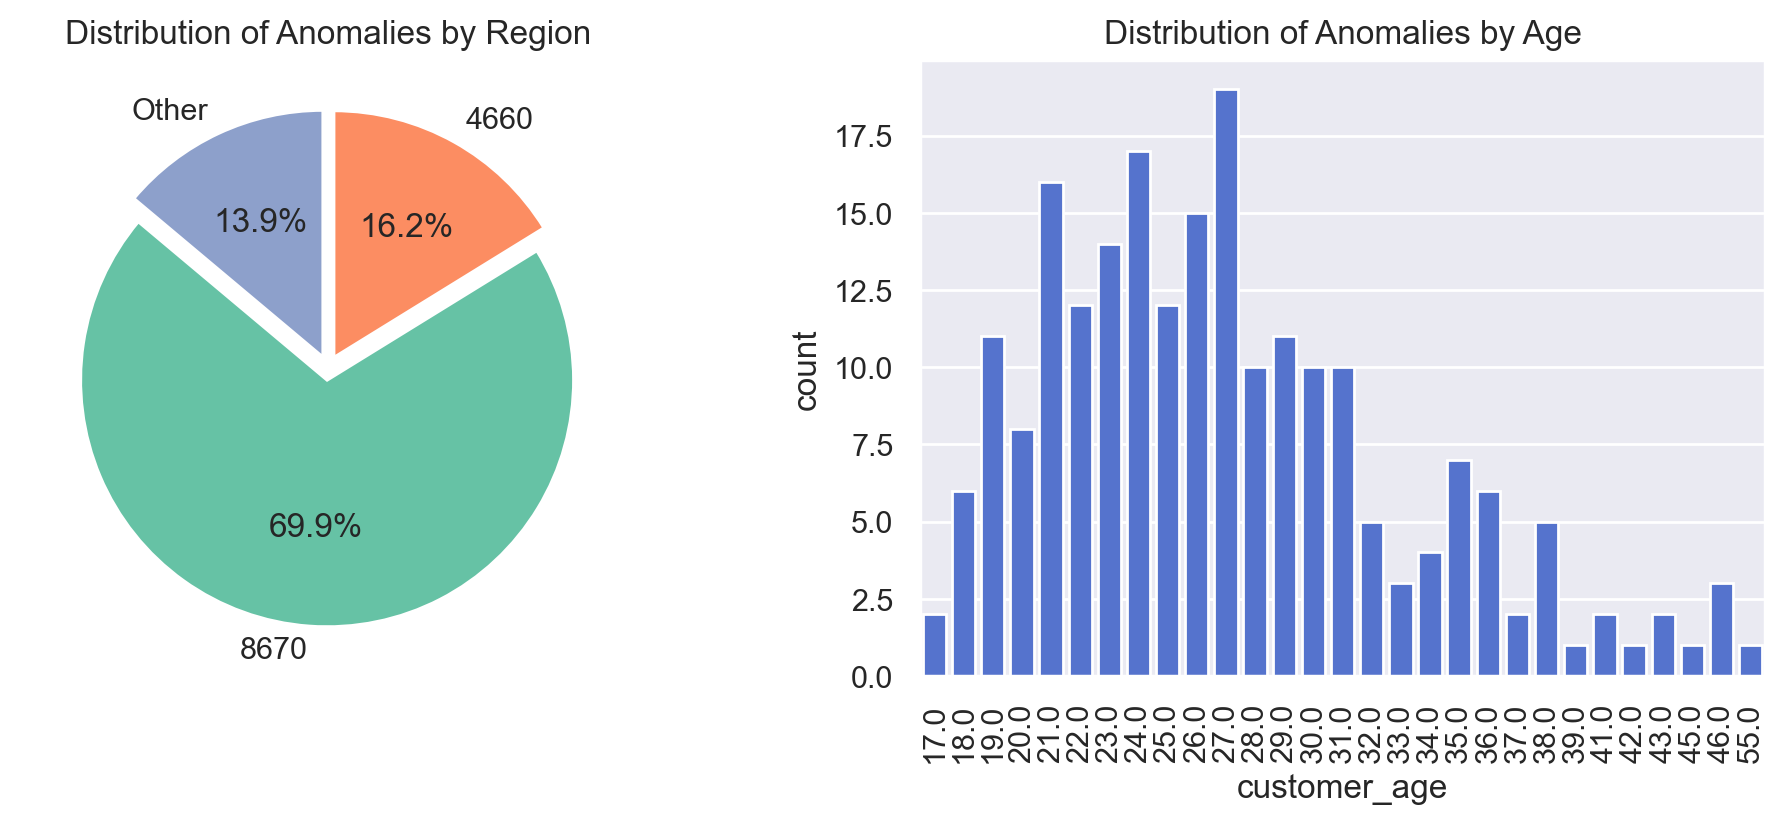

In [18]:
# data frame with the anomalies found
anomalies = df[(df["product_count"] == 0) | (df["vendor_count"] == 0) | (df[cuisine_columns].sum(axis=1) == 0) | (df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1))]

anomalies = pd.concat([anomalies, dup])

# Region counts of the anomalies
region_counts = anomalies['customer_region'].value_counts()

total_anomalies = region_counts.sum()

# Identify regions with less than 10% occurrence
low_occurrence_regions = region_counts[region_counts < 0.10 * total_anomalies]

# Group low occurrence regions into "Other"
region_counts_grouped = region_counts.copy()
region_counts_grouped['Other'] = low_occurrence_regions.sum()
region_counts_grouped = region_counts_grouped[region_counts_grouped >= 0.10 * total_anomalies]

# Defining the color palette
palete_color = sns.color_palette('Set2')

# Creating the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the distribution of anomalies by region
axs[0].pie(region_counts_grouped, labels=region_counts_grouped.index, autopct='%1.1f%%', startangle=140,
           colors=palete_color, explode=[0.05 if label in ['8670', 'Other', '4660'] else 0 for label in region_counts_grouped.index])
axs[0].set_title('Distribution of Anomalies by Region')

# Plotting the distribution of anomalies by age
sns.countplot(data=anomalies, x='customer_age', ax=axs[1], color="royalblue")
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Anomalies by Age')

plt.show()

In [22]:
anomalies_id = anomalies.index.tolist()
print('Percentage of data kept after removing anomalies:', 100*(np.round(df.shape[0] / df.append(anomalies).shape[0], 4)))

AttributeError: 'DataFrame' object has no attribute 'append'

We lose less than 1% of our data, so we conclude it is not troublesome to drop them

<a class="anchor" id="dataexploration">
    
### 1. Data Exploration

</a>

<a class="anchor" id="descriptivestatistics">
    
### 1.1. Descriptive Statistics

</a>

* Numerical Columns, can be studied using descriptive stats:

In [23]:
# Descriptive statistics for numerical columns except for the cuisine, HR and DOW columns
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count      31101.00      31828.00       31828.00  31828.00     31722.00   
mean          27.51          3.10           5.67      2.82        28.46   
std            7.16          2.77           6.96      3.98        24.10   
min           15.00          0.00           0.00      0.00         0.00   
25%           23.00          1.00           2.00      1.00         7.00   
50%           26.00          2.00           3.00      2.00        22.00   
75%           31.00          4.00           7.00      3.00        45.00   
max           80.00         41.00         269.00     83.00        90.00   

       last_order  
count    31828.00  
mean        63.67  
std         23.23  
min          0.00  
25%         49.00  
50%         70.00  
75%         83.00  
max         90.00

In [24]:
# Descriptive statistics for the categorical columns
df.describe(include = "object")

customer_region last_promo payment_method
count            31828      31828          31828
unique               9          4              3
top               8670          -           CARD
freq              9748      16722          20119

* Categorical columns, can be analyzed using frequency counts:

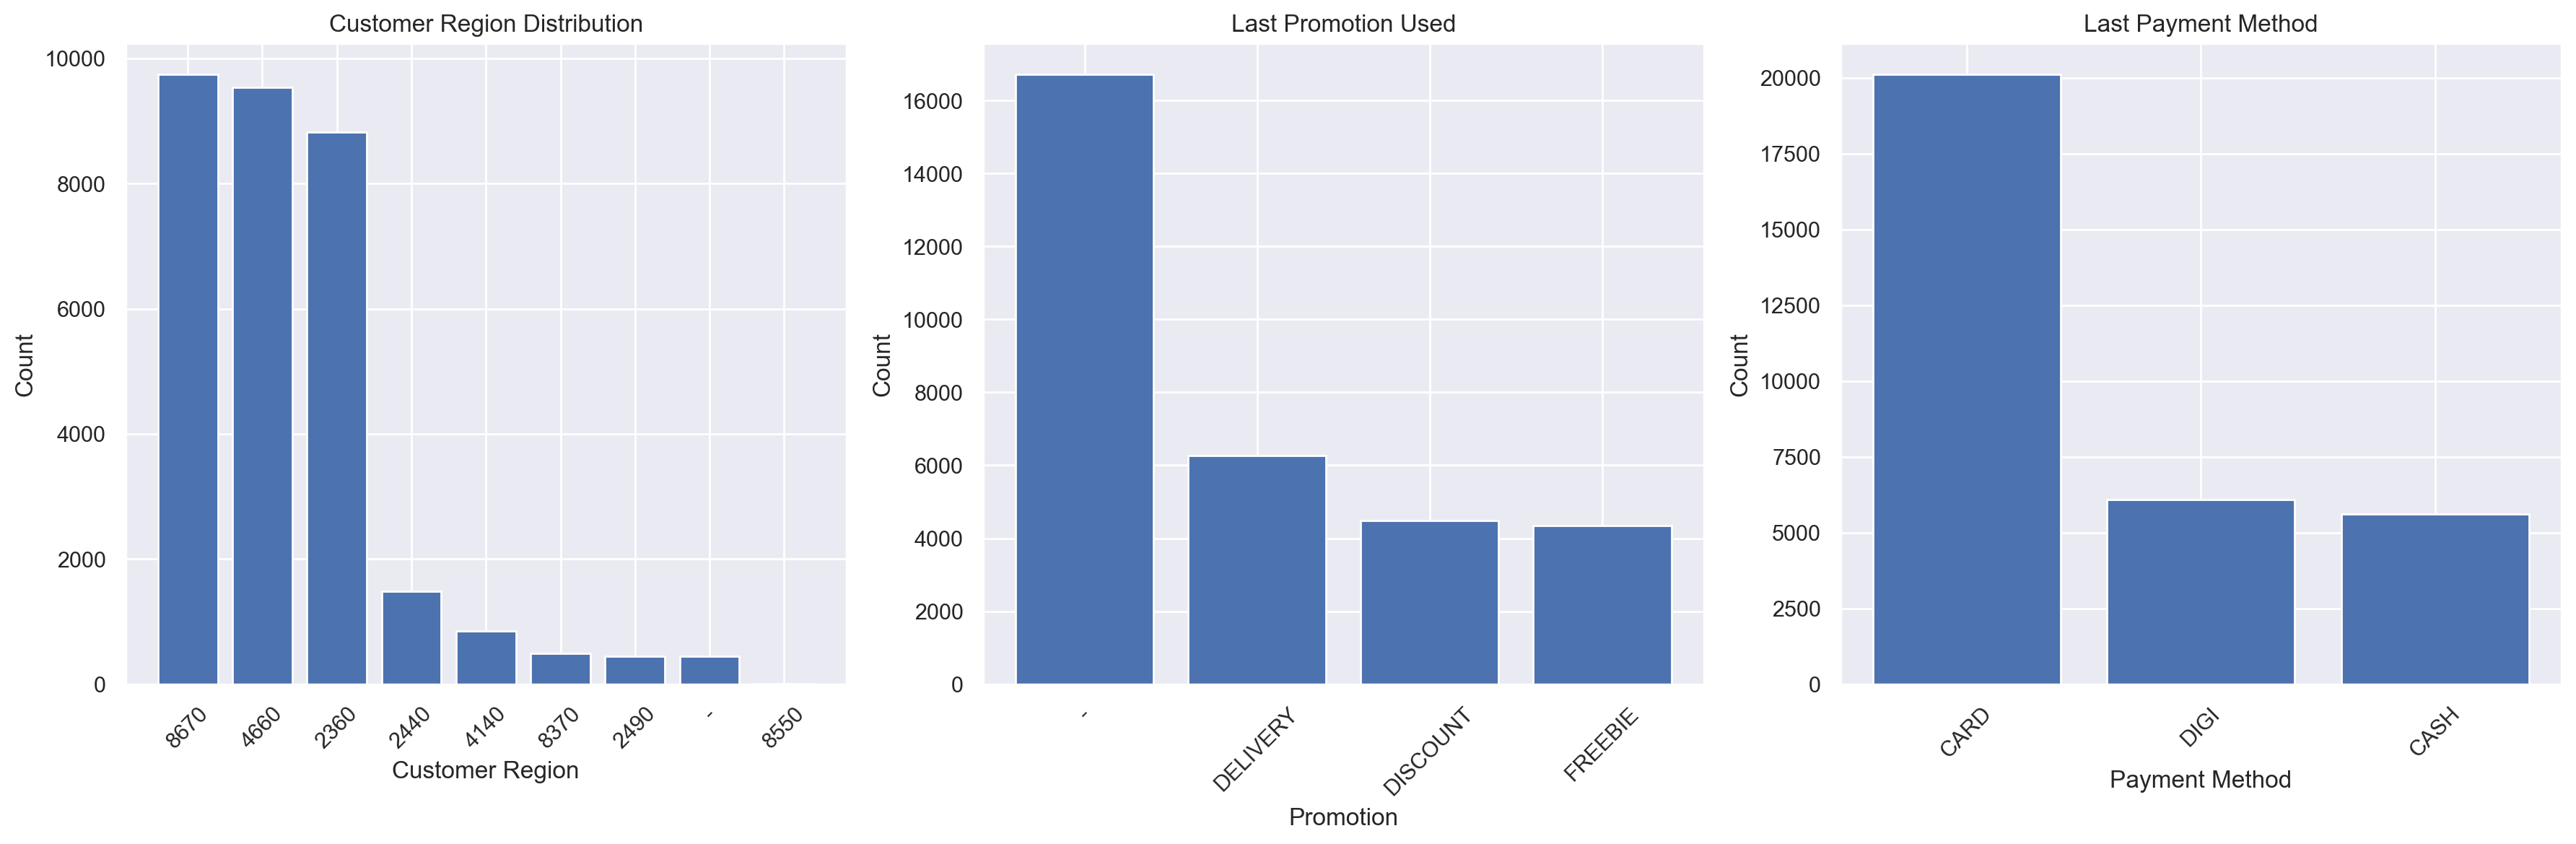

In [25]:
# Creating a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the first bar chart: Customer Region
value_counts1 = df["customer_region"].value_counts()
axes[0].bar(value_counts1.index, value_counts1)
axes[0].set_title('Customer Region Distribution')
axes[0].set_xlabel('Customer Region')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plotting the second bar chart: Last Promotion Used
value_counts2 = df["last_promo"].value_counts()
axes[1].bar(value_counts2.index, value_counts2)
axes[1].set_title('Last Promotion Used')
axes[1].set_xlabel('Promotion')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the third bar chart: Last Payment Method Used
value_counts3 = df["payment_method"].value_counts()
axes[2].bar(value_counts3.index, value_counts3)
axes[2].set_title('Last Payment Method')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


<a class="anchor" id="cuisineanalysis">
    
### 1.2. Cuisine Analysis

</a>

* Statistic summary of the cuisines

In [26]:
# Descriptive statistics for the cuisine columns
df[cuisine_columns].describe().round(2).T

count  mean    std  min  25%  50%    75%     max
CUI_American              31828.0  4.88  11.65  0.0  0.0  0.0   5.66  280.21
CUI_Asian                 31828.0  9.96  23.57  0.0  0.0  0.0  11.83  896.71
CUI_Beverages             31828.0  2.30   8.47  0.0  0.0  0.0   0.00  229.22
CUI_Cafe                  31828.0  0.80   6.43  0.0  0.0  0.0   0.00  326.10
CUI_Chicken Dishes        31828.0  0.77   3.66  0.0  0.0  0.0   0.00  219.66
CUI_Chinese               31828.0  1.43   8.20  0.0  0.0  0.0   0.00  739.73
CUI_Desserts              31828.0  0.88   5.26  0.0  0.0  0.0   0.00  230.07
CUI_Healthy               31828.0  0.95   5.84  0.0  0.0  0.0   0.00  255.81
CUI_Indian                31828.0  1.63   7.44  0.0  0.0  0.0   0.00  309.07
CUI_Italian               31828.0  3.23  11.25  0.0  0.0  0.0   0.00  468.33
CUI_Japanese              31828.0  2.99  10.18  0.0  0.0  0.0   0.00  706.14
CUI_Noodle Dishes         31828.0  0.71   4.54  0.0  0.0  0.0   0.00  275.11
CUI_OTHER                 31828.0  3.00   9.78  0.0  0.0  0.0   0.00  366.08
CUI_Street Food / Snacks  31828.0  3.91  15.52  0.0  0.0  0.0   0.00  454.45
CUI_Thai                  31828.0  0.84   4.44  0.0  0.0  0.0   0.00  136.38

* The 4 main Asian cuisines

Let's compare the popularity of the most well known cuisines in the asian continent: The Japanese, Indian, Chinese and Thai cuisines.

Text(0.5, 0, 'Cuisines')

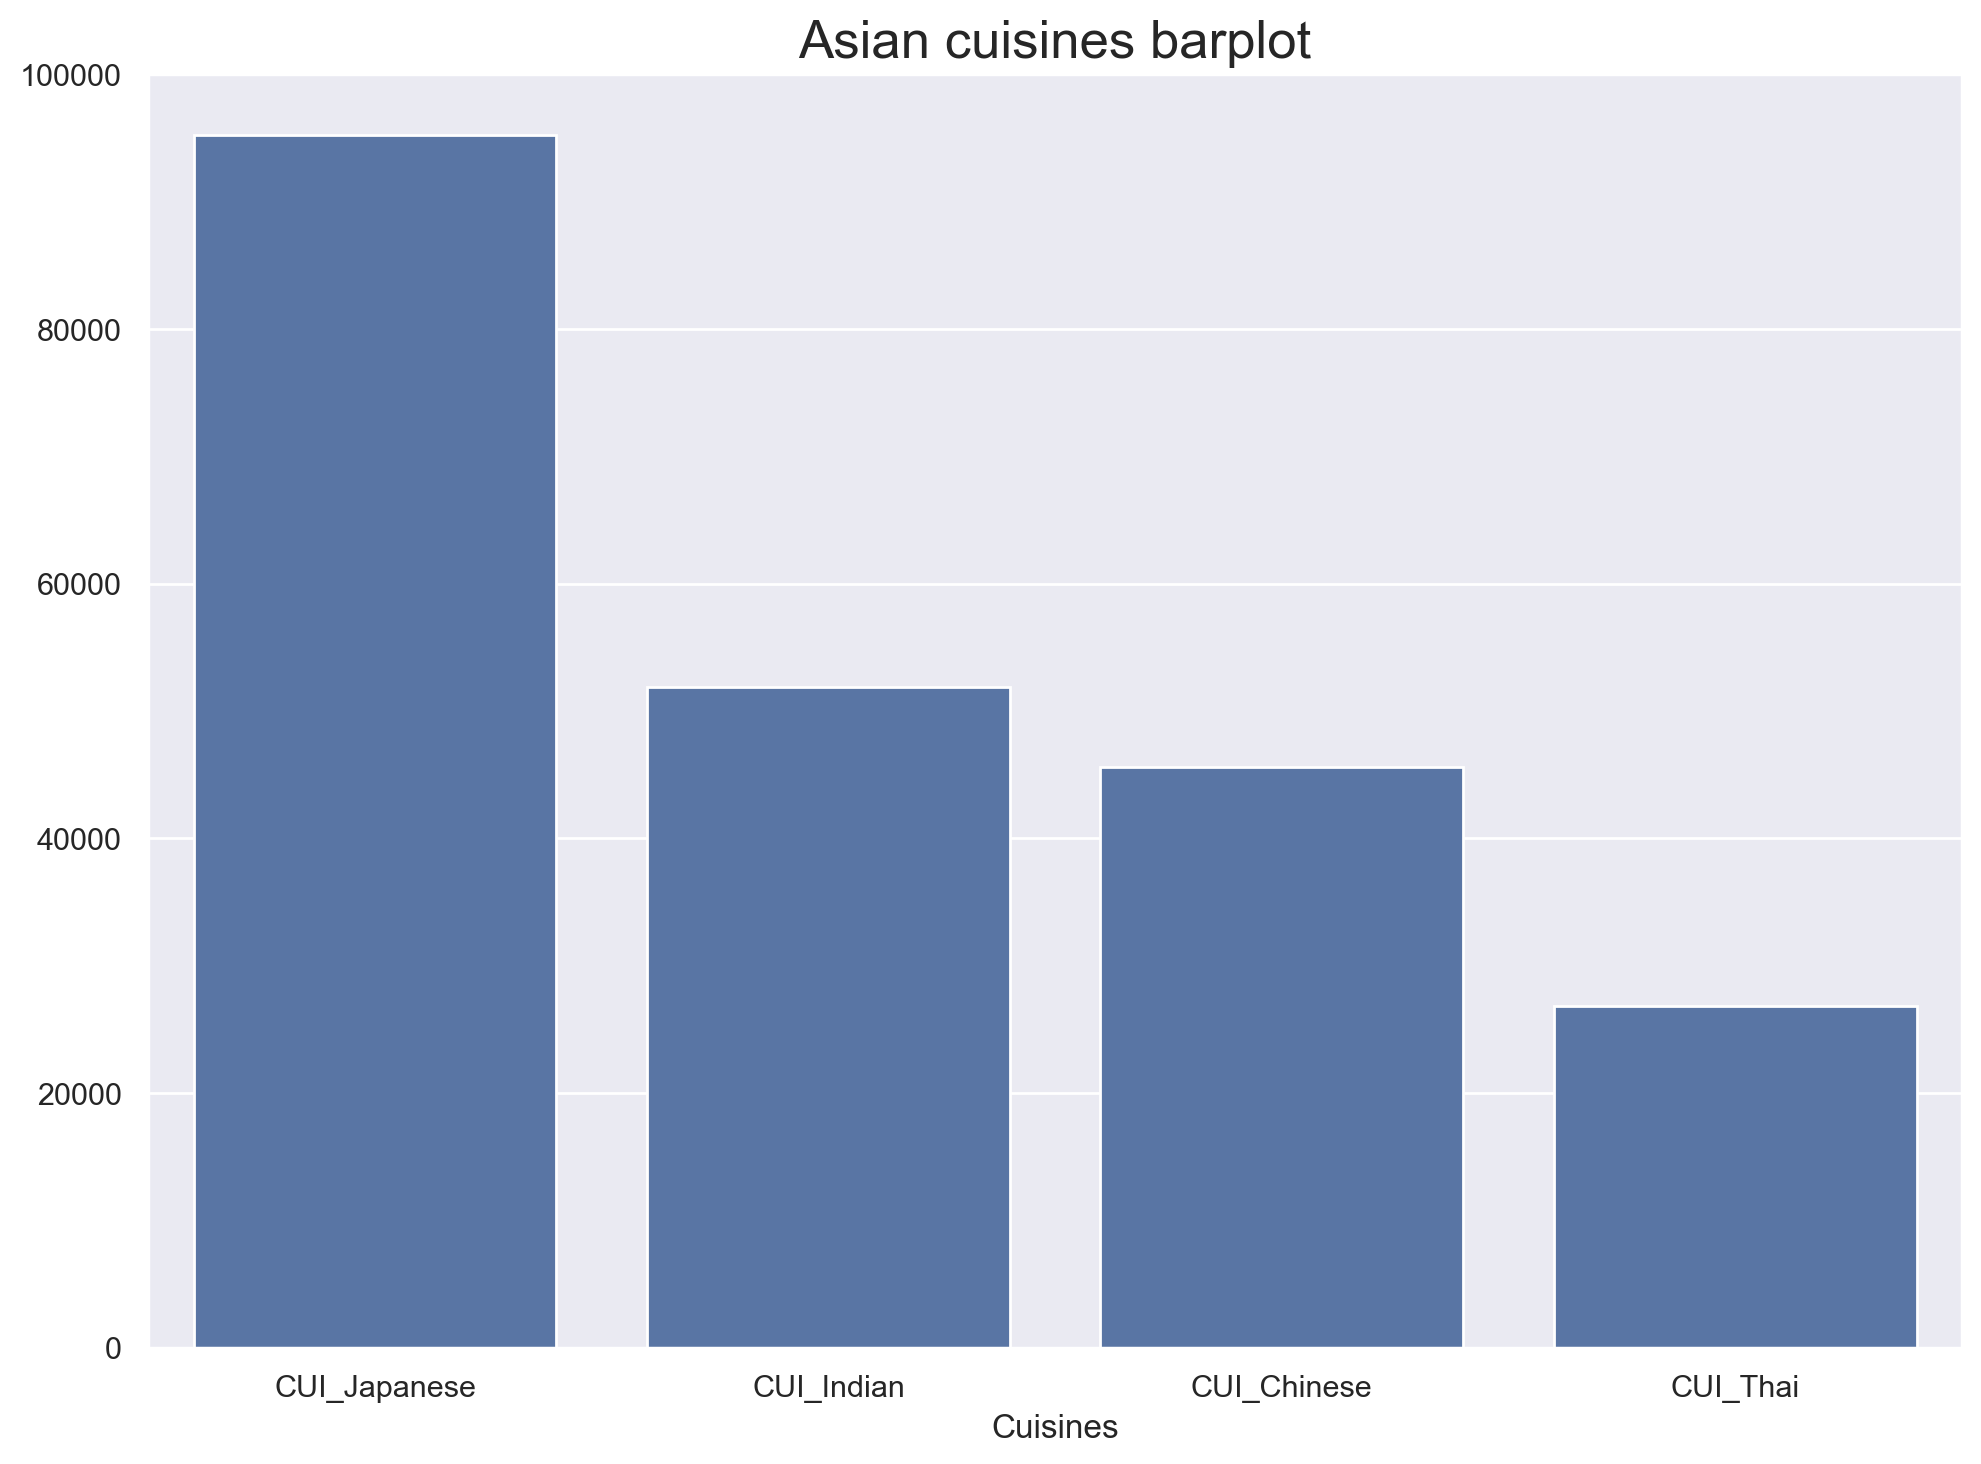

In [28]:
# Sum of the money spent in the 4 main asian cuisines
asian_cuisine_sums = df[['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Thai']].sum()

# Plotting a bar chart for the 4 main asian cuisines
sns.barplot(x=asian_cuisine_sums.index, y=asian_cuisine_sums.values)
plt.title("Asian cuisines barplot", size = 19)
plt.xlabel("Cuisines")

Japanese cuisine has the highest amount of money spent by a huge margin, among the 4 main asian cuisines. It is almost double the money spent in each of the other 3 cuisines. This makes sense given the popularity of japanese food and the higher average cost compared to other asian cuisines.

* Asian cuisine vs the 4 main asian cuisines

Let's compare the total spending in Asian cuisine with the total spending in the 4 main asian cuisines we saw before.

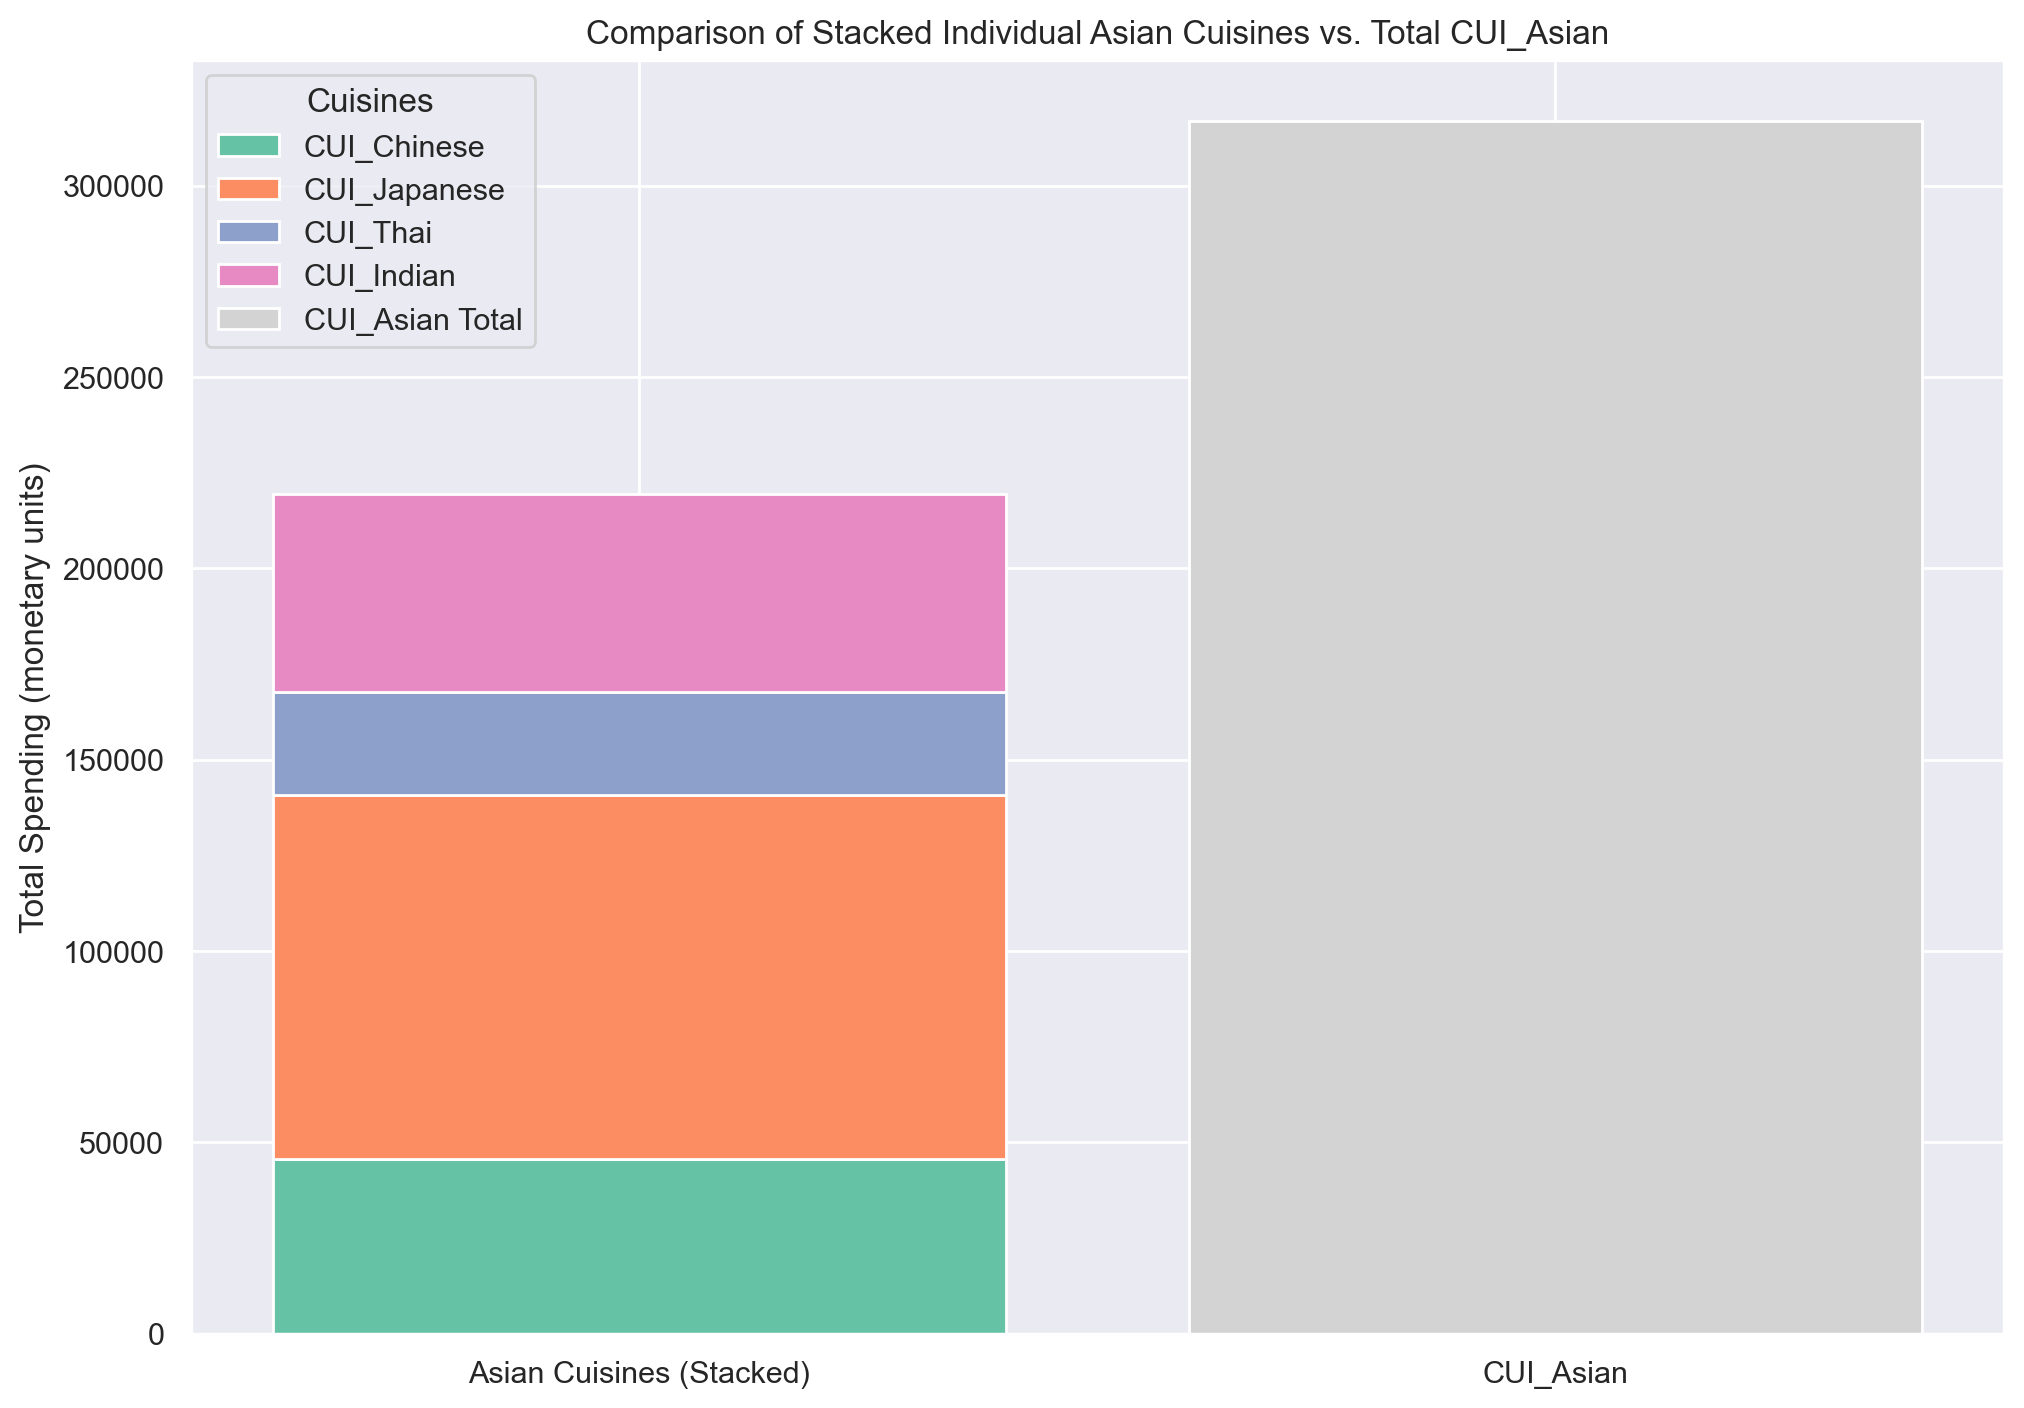

In [29]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ["CUI_Chinese", "CUI_Japanese", "CUI_Thai", "CUI_Indian"]

# Sum of the money spent in the 4 main asian cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Total money spent in CUI_Asian
sum_asian = df["CUI_Asian"].sum()

# Subplot for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("Asian Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("CUI_Asian", sum_asian, color='lightgrey', label="CUI_Asian Total")

# Labelling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked Individual Asian Cuisines vs. Total CUI_Asian")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

In [30]:
print(f'Difference in money spent between generic and popular asian cuisines: {round(df["CUI_Asian"].sum() - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum().sum(), 2)}')

Difference in money spent between generic and popular asian cuisines: 97473.32


If we assume that "CUI_Asian" contains other asian countries cuisines, we can say that around 2/3 of the money spent in Asian cuisines comes from only japanese, indian, chinese and thai cuisines. We can speculate there is only 97473.32 money units spent in the rest of the asian cuisines excluding those 4 main asian cuisines.

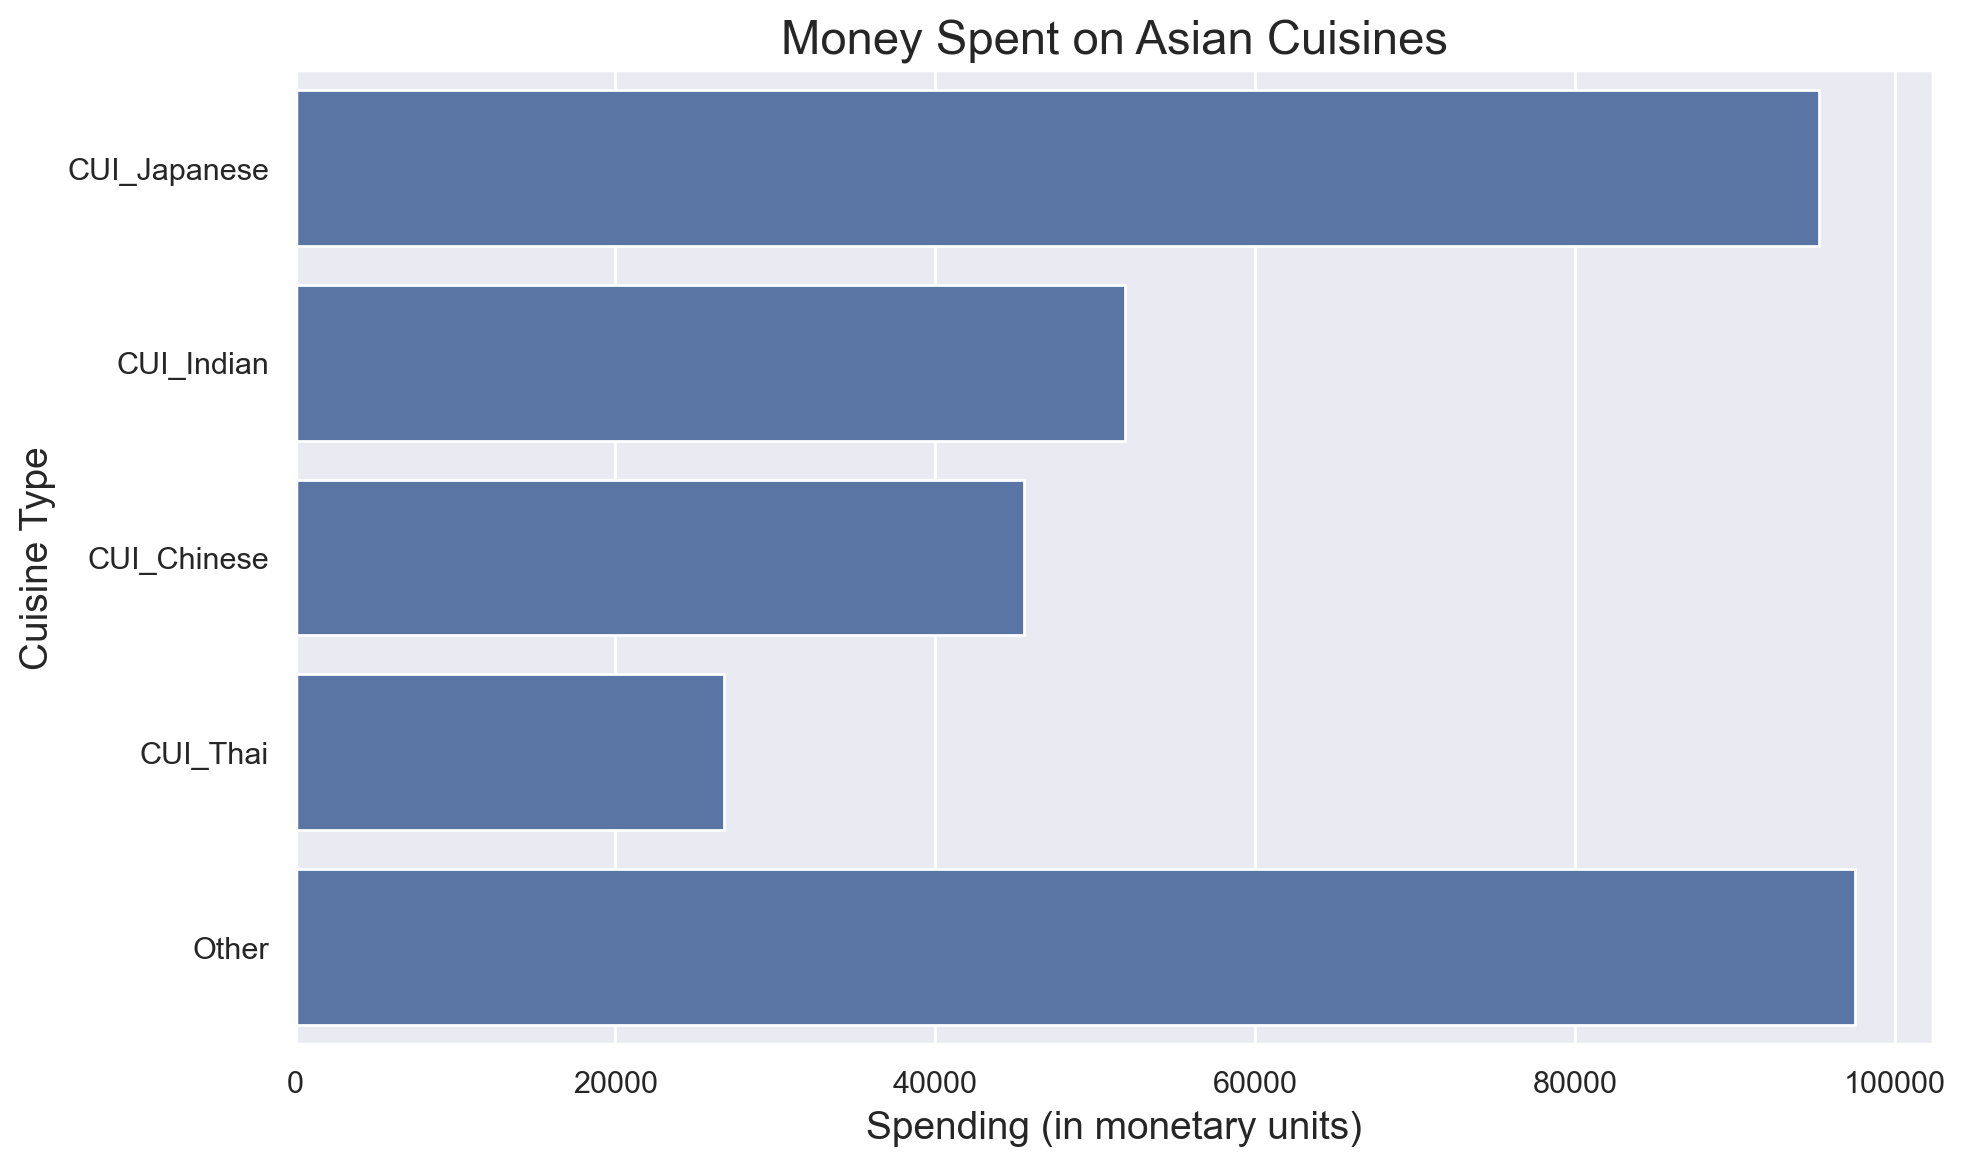

In [35]:
# Difference in money spent between generic and popular asian cuisines
asian_cuisine_sums['Other'] = df['CUI_Asian'].sum() - asian_cuisine_sums.sum()

# Reset the index to turn the data into a format suitable for plotting
asian_cuisine_sums_df = asian_cuisine_sums.reset_index()
asian_cuisine_sums_df.columns = ['Cuisine', 'Spending']

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=asian_cuisine_sums_df, x='Spending', y='Cuisine')

# Adding title and labels
plt.title("Money Spent on Asian Cuisines", size=17)
plt.xlabel("Spending (in monetary units)", size=14)
plt.ylabel("Cuisine Type", size=14)

# Display the barplot
plt.tight_layout()
plt.show()

Japanese cuisine could represent over 30% of the total spending in Asian cuisine.

* European, Asian, American and Other cuisines vs the rest

In [36]:
# Total spending in all continents
total_spend = df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().sum()

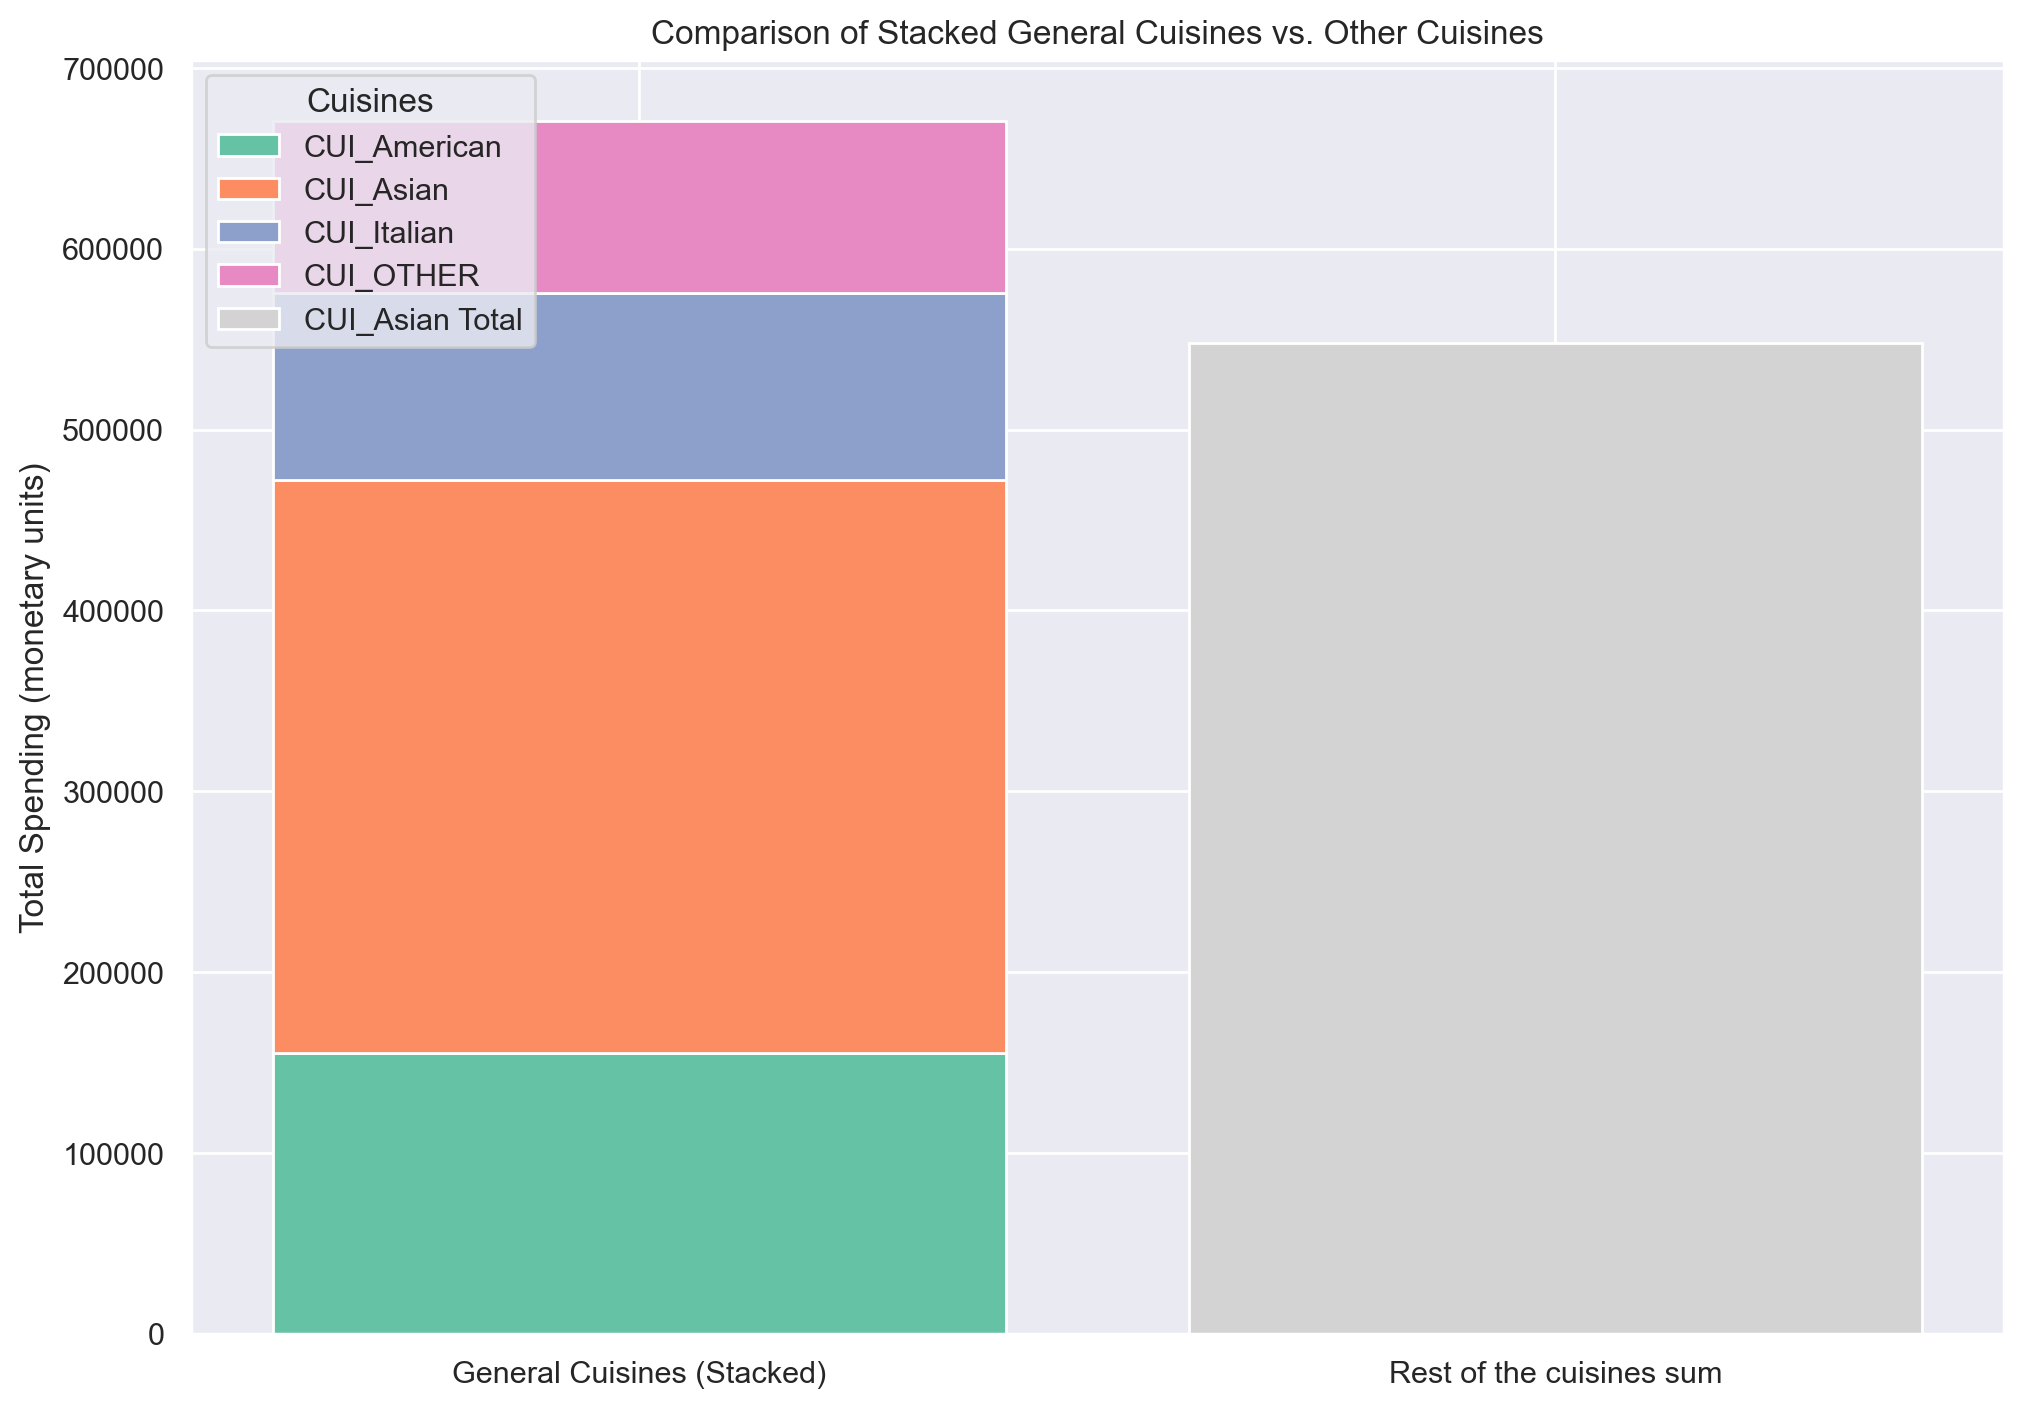

In [37]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']

# Money spent in each of the 4 generic cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Money spent in the rest of the cuisines
rest_cui_sum = df[cuisine_columns].sum().sum() - sum(cuisine_sums)

# Subplots for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("General Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("Rest of the cuisines sum", rest_cui_sum, color='lightgrey', label="CUI_Asian Total")

# Labeling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked General Cuisines vs. Other Cuisines")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

It looks reasonable to think that these 4 cuisines contain the other types of cuisines in the data set because the total spending in these 4 cuisines is greater than the total spending in the other cuisines.

* European vs Asian vs American vs Other cuisines

<Axes: xlabel='None'>

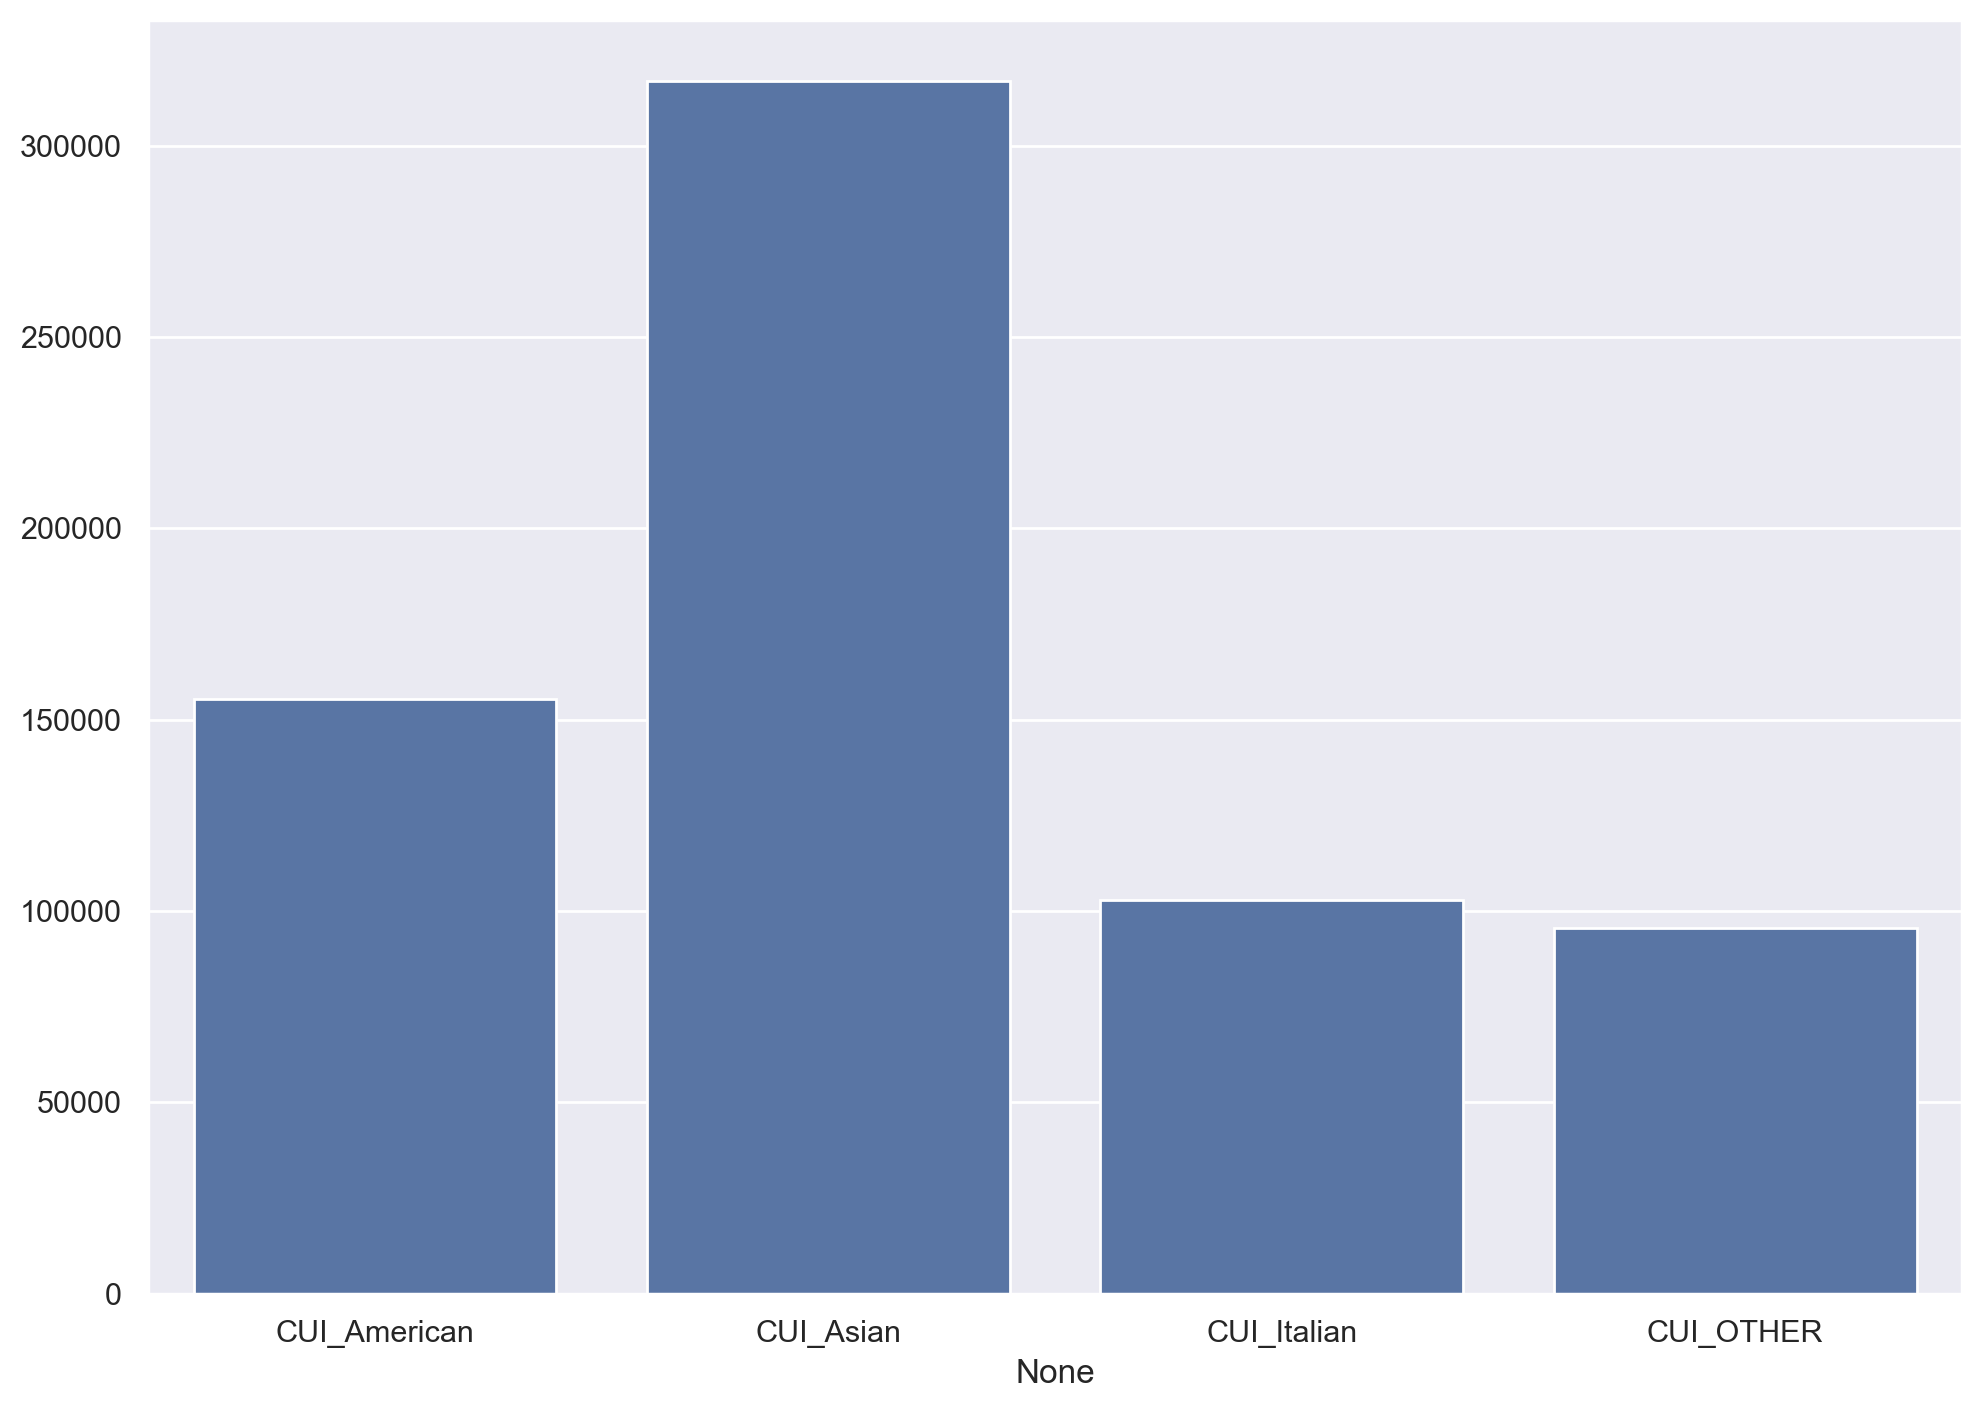

In [43]:
# Barplot with the total spending in the 4 generic cuisines
sns.barplot(x=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().index, y=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().values)

Asian cuisine is leading in total spending by a huge margin, followed by the American and Italian cuisines.

* Other interesting insights

In [44]:
# Healthy food on total spending
print(f"{round(df['CUI_Healthy'].sum()/total_spend*100, 2)}%")

4.52%


In [45]:
# Unhealthy food on total spending
print(f"{round(df[['CUI_Desserts', 'CUI_Street Food / Snacks']].sum().sum()/total_spend*100, 2)}%")

22.73%


In [46]:
# Cafe orders on total spending
print(f"{round(df['CUI_Cafe'].sum()/total_spend*100, 2)}%")

3.81%


In [47]:
# Japanese cuisine significance in total spending
print(f"{round(df['CUI_Japanese'].sum()/total_spend*100, 2)}%")

14.2%


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CUI_Street Food / Snacks'),
  Text(1, 0, 'CUI_Beverages'),
  Text(2, 0, 'CUI_Healthy'),
  Text(3, 0, 'CUI_Desserts'),
  Text(4, 0, 'CUI_Cafe'),
  Text(5, 0, 'CUI_Chicken Dishes'),
  Text(6, 0, 'CUI_Noodle Dishes')])

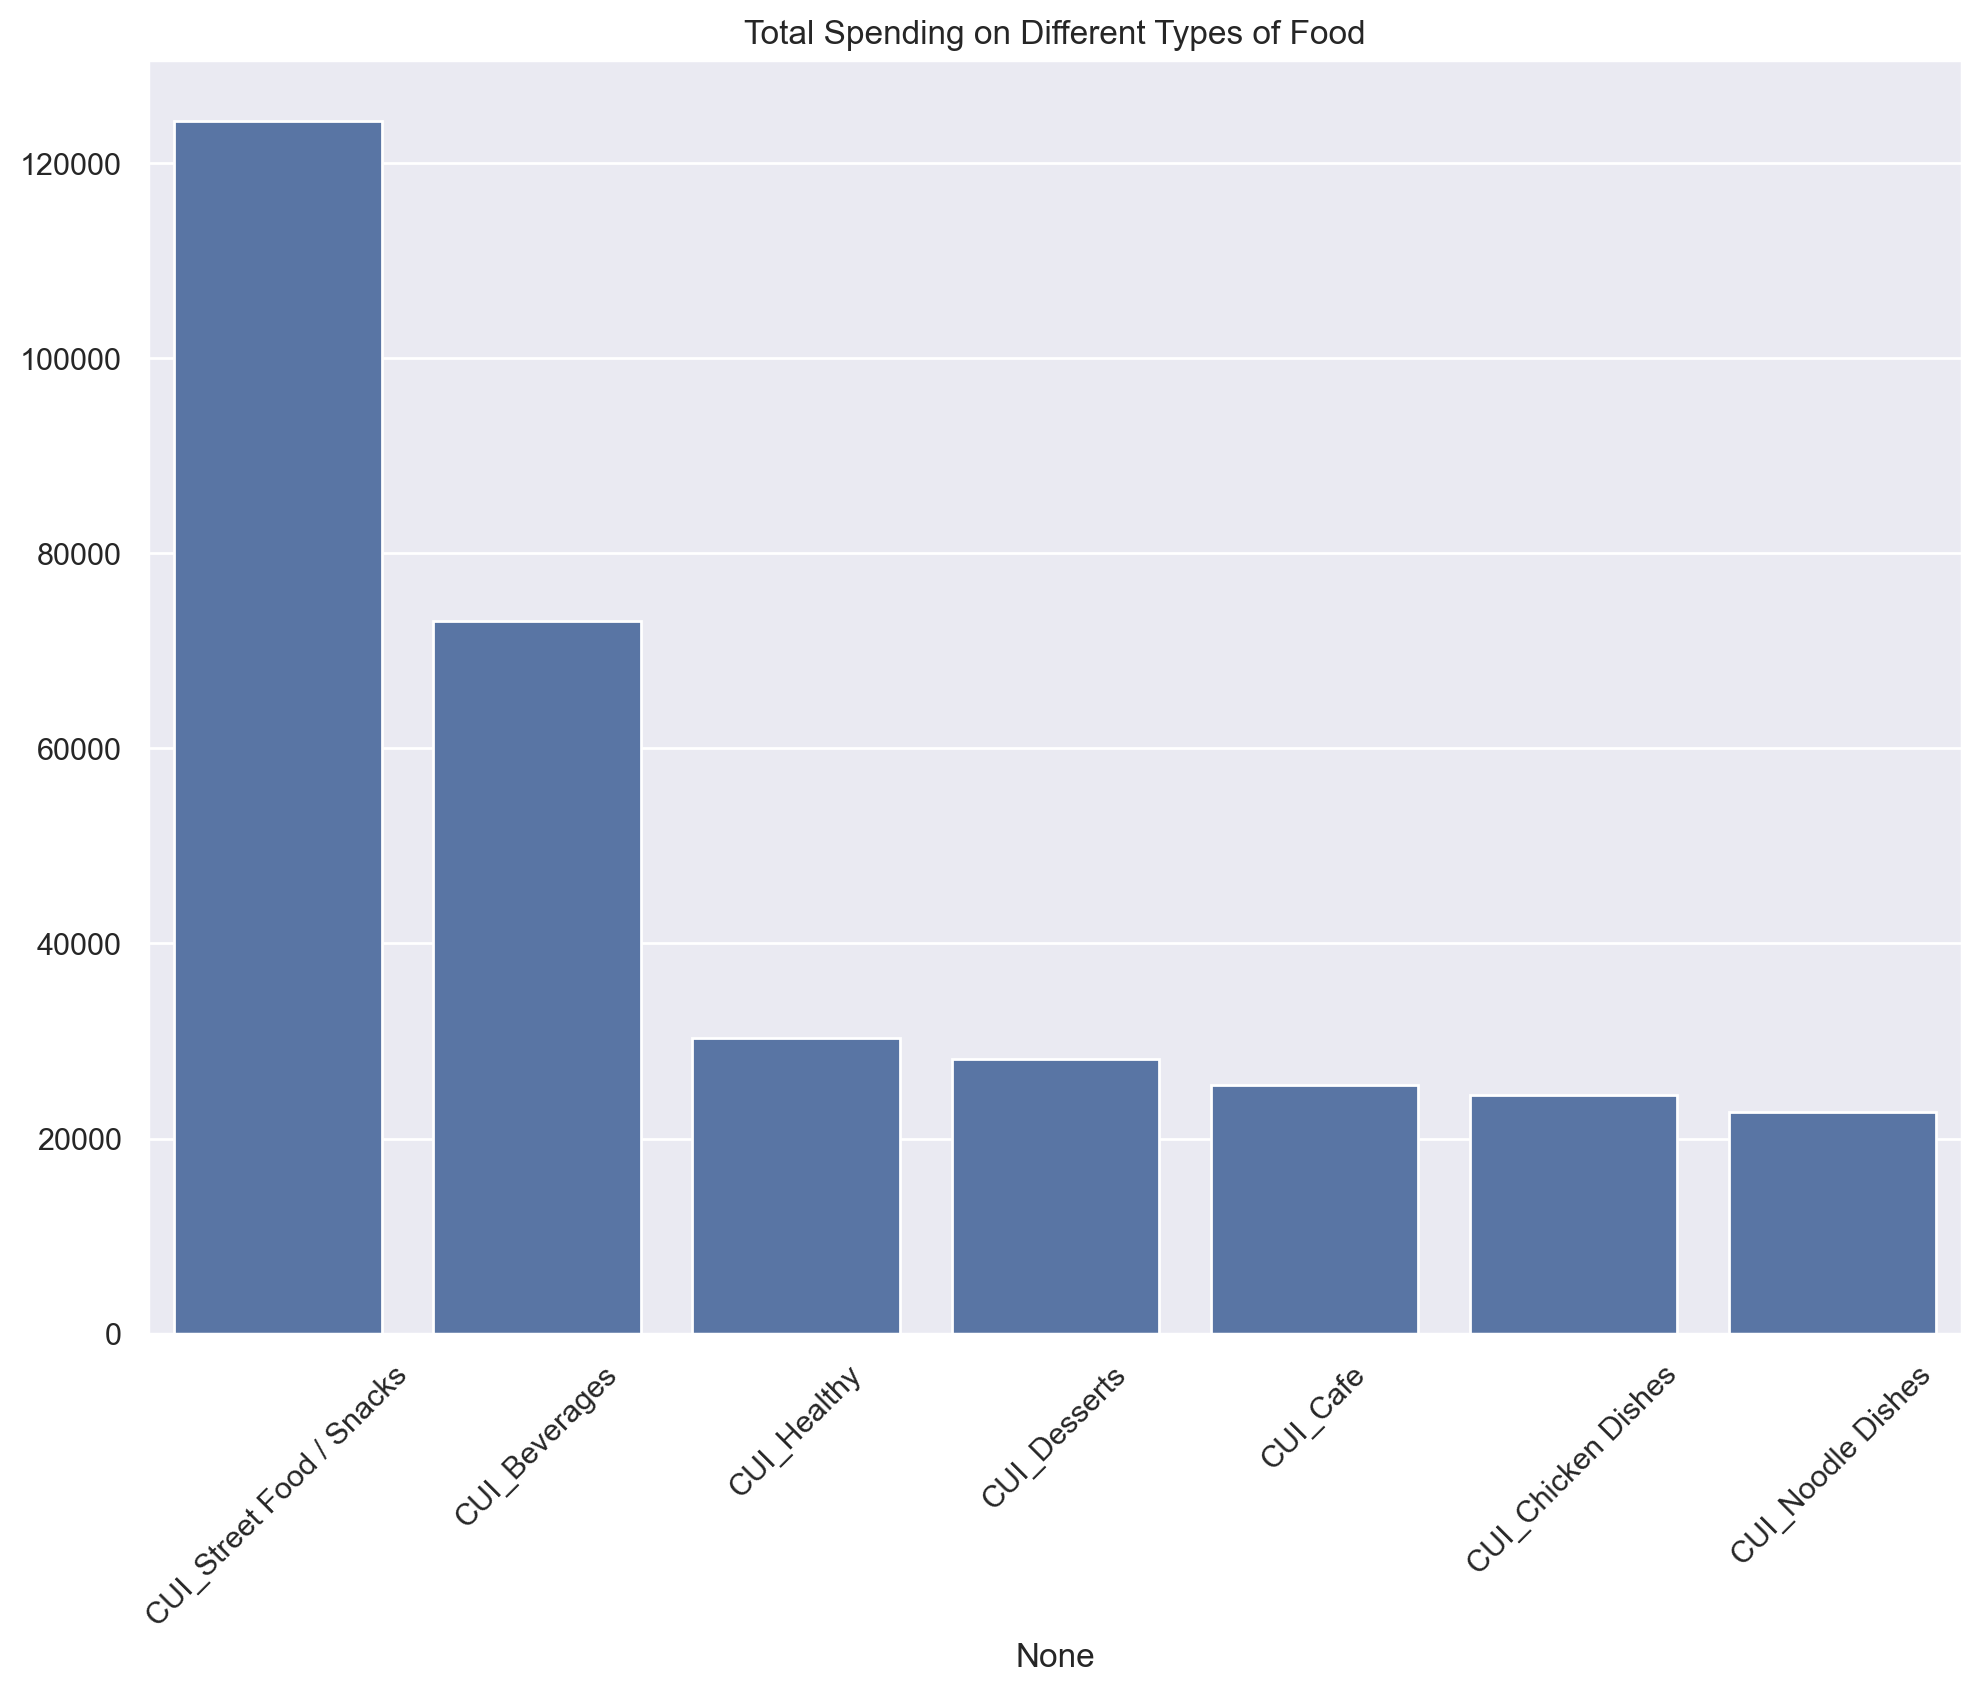

In [48]:
# Cuisines to be analyzed
tf = df[['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Noodle Dishes', 'CUI_Street Food / Snacks']].sum().sort_values(ascending=False)

# Plotting the bar chart for the selected cuisines
sns.barplot(x=tf.index, y=tf.values)

# Formatting the plot
plt.title('Total Spending on Different Types of Food')
plt.xticks(rotation = 45)

<a class="anchor" id="dataanalysis">
    
### 2. Data Analysis

</a>

<a class="anchor" id="newfeatures">
    
### 2.1. New features

</a>

In [49]:
# Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].sum(axis=1)
df['Weekend_days'] = df[['DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
df['Week_days_mean'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].mean(axis=1)
df['Weekend_days_mean'] = df[['DOW_4', 'DOW_5', 'DOW_6']].mean(axis=1)

# Lunch HR (HR_11 to HR_13) and Dinner HR (HR_18 to HR_20)
df["Morning_HR"] = df[["HR_1", 'HR_2', 'HR_3', "HR_4", "HR_5", 'HR_6', 'HR_7', "HR_8", "HR_9", "HR_10"]].mean(axis=1)
df['Lunch_HR'] = df[['HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df["Afternoon"] = df[['HR_13', "HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1) #should we include 17 at dinner time?
df['Dinner_HR'] = df[['HR_18', 'HR_19', 'HR_20']].mean(axis=1)
df['Night_HR'] = df[["HR_21", 'HR_22', 'HR_23', "HR_0"]].mean(axis=1)
df["Afternoon_HR"] = df[['HR_13', "HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1)

# Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_Spend'] = df[cuisine_columns].sum(axis=1)

# Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = df['Total_Spend'] / df['vendor_count']

# Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = df['Total_Spend'] / df['product_count']

# Cuisine Diversity = Number of non-zero CUI_* columns
df['Cuisine_Diversity'] = df[cuisine_columns].gt(0).sum(axis=1)

# Peak HR column for every customer
df['HR_peak'] = df.loc[:, 'HR_0':'HR_23'].idxmax(axis=1)

# Customer Duration = last_order - first_order
df["Customer_Duration"] = df["last_order"] - df["first_order"]

# Product Frequency = Customer Duration / product_count
df["Product_Frequency"] = df["Customer_Duration"] / df["product_count"]

# Favourite Cuisine = Cuisine with the highest spend
df['Fav_Cuisine'] = df[cuisine_columns].idxmax(axis=1)

# Favourite Cuisine Concentration = Max Cuisine Spend / Total Spend
df['Fav_Cuisine_Concentration'] = df[cuisine_columns].max(axis=1) / df['Total_Spend']

# Total Orders = Sum of all DOW_* columns
df['Total_Orders'] = df[dow_columns].sum(axis=1).astype(int)

# CUI_OTHER_Asian = CUI_Asian - Sum of the 4 main cuisines
df["CUI_OTHER_Asian"] = df["CUI_Asian"] - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum(axis=1)

# Chain preference = is_chain / Total_Orders
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders']

# Average money spent per order = Total Spend / Total Orders
df['Avg_Spend_per_Order'] = df['Total_Spend'] / df['Total_Orders']

# Order Frequency = Total Orders / Customer Duration
df['Order_Frequency'] = df['Total_Orders'] / df['Customer_Duration']

# Peak Order Day = Day of the week with the most orders
df['Peak_Order_Day'] = df[dow_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

# Product Intensity = product_count / Customer Duration
df['Product_Intensity'] = df['product_count'] / df['Customer_Duration']
df['Product_Intensity'].fillna(0, inplace=True)  # Handling potential division by zero

# Repeat Customer: 1 if Customer Duration > 1, else 0
X = 1  # If more than 1 day then it's considered a repeat customer
df['Repeat_Customer'] = df['Customer_Duration'].apply(lambda x: 1 if x > X else 0)

# Churn Risk: 1 if days since last order > Threshold, else 0
threshold_days = 30 # Considering the max days is 90 then we decided 30 days would make sense as a threshold

df['Days_Since_Last_Order'] = df['last_order'].max() - df['last_order'] # Days since last order until the end of the dataset
df['Churn_Risk'] = df['Days_Since_Last_Order'].apply(lambda x: 1 if x > threshold_days else 0)

In [50]:
df['last_order'].max()

90

This result is consistent with the project guidelines which indicated a period of 3 months (90 days).

<a class="anchor" id="visuals">
    
### 2.2. Visual Exploration

</a>

Separating metric and non-metric features:

In [51]:
non_metric_features = ["customer_region", "last_promo", "payment_method", "Fav_Cuisine"] #nominal
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

<a class="anchor" id="numerichistograms">
    
### 2.2.1 Numerical Variables Histogram

</a>

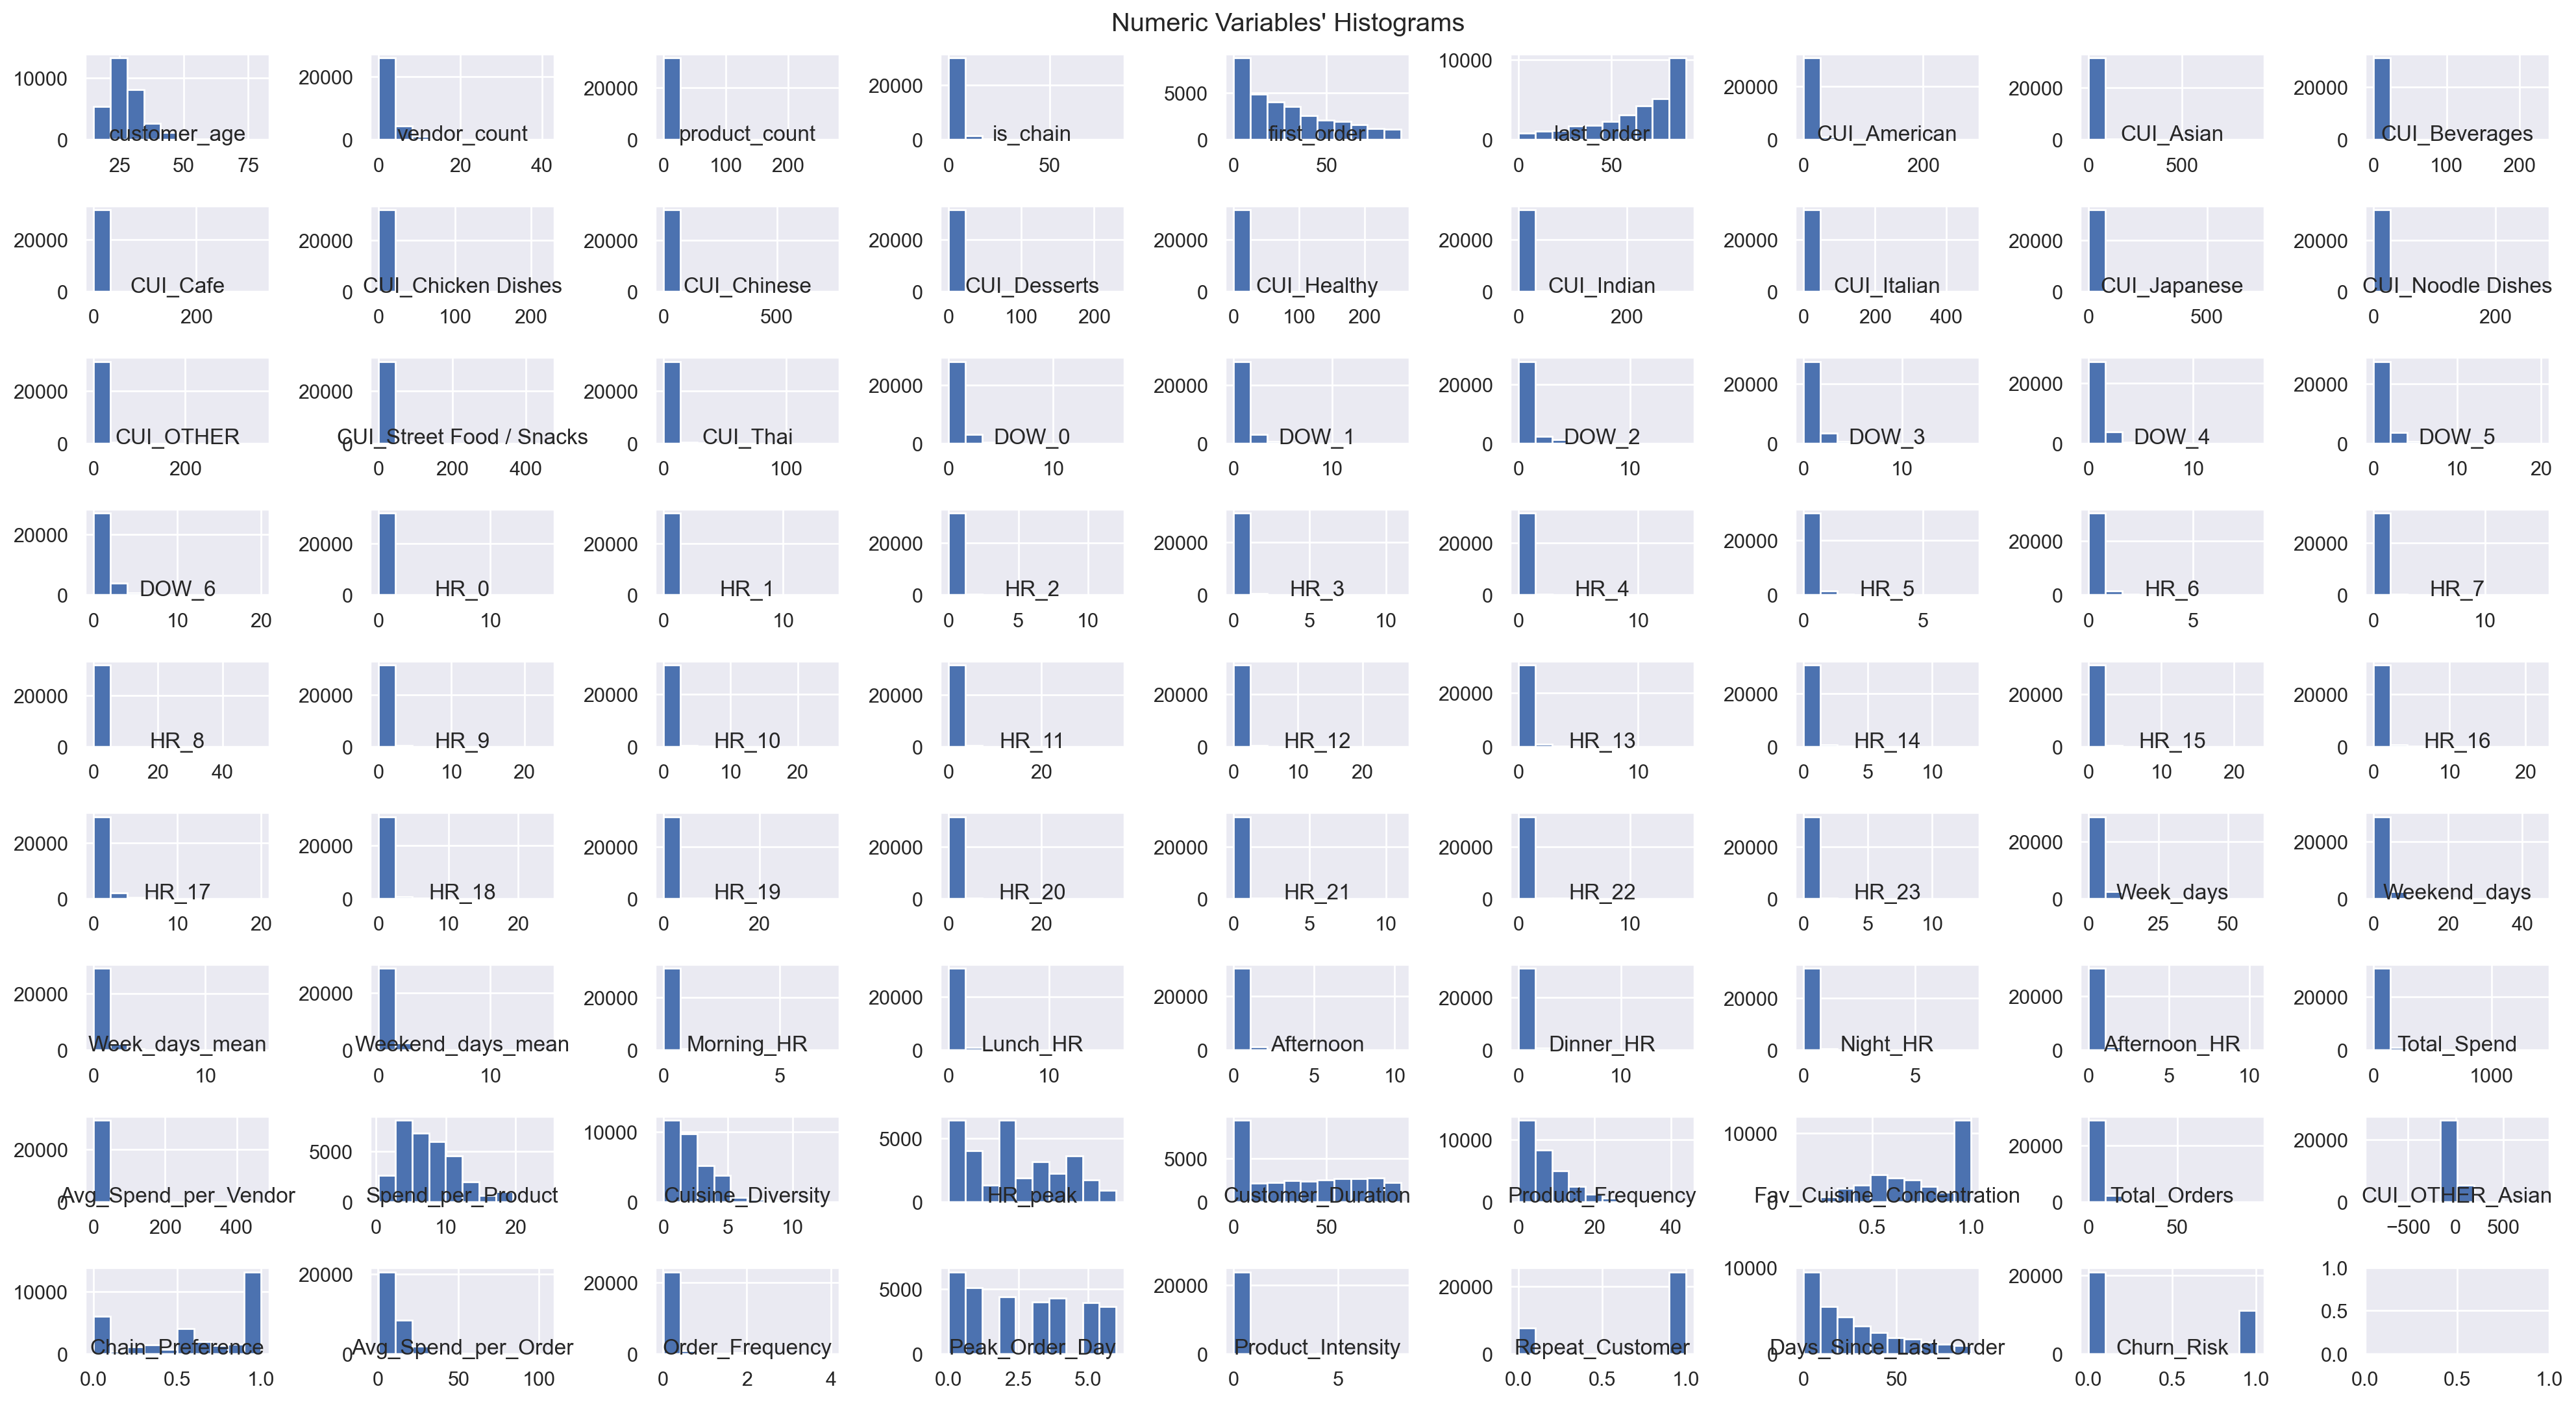

In [52]:
# Creating a 9x9 grid of subplots
fig, axes = plt.subplots(9, 9, figsize=(20, 11), tight_layout=True)

# Iterating through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plotting the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Setting the title for the subplot, slightly below the axis
        
        # Remove x-axis for HR_peak ---> the x-axis was composed of HR_'s, so it was unreadable
        if feat == 'HR_peak':
            ax.set_xticks([])  # Hiding x-axis ticks

    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Adding a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Checking if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Displaying the figure
plt.show()

<a class="anchor" id="numericboxplots">
    
### 2.2.2 Numerical Variables Box Plots

</a>

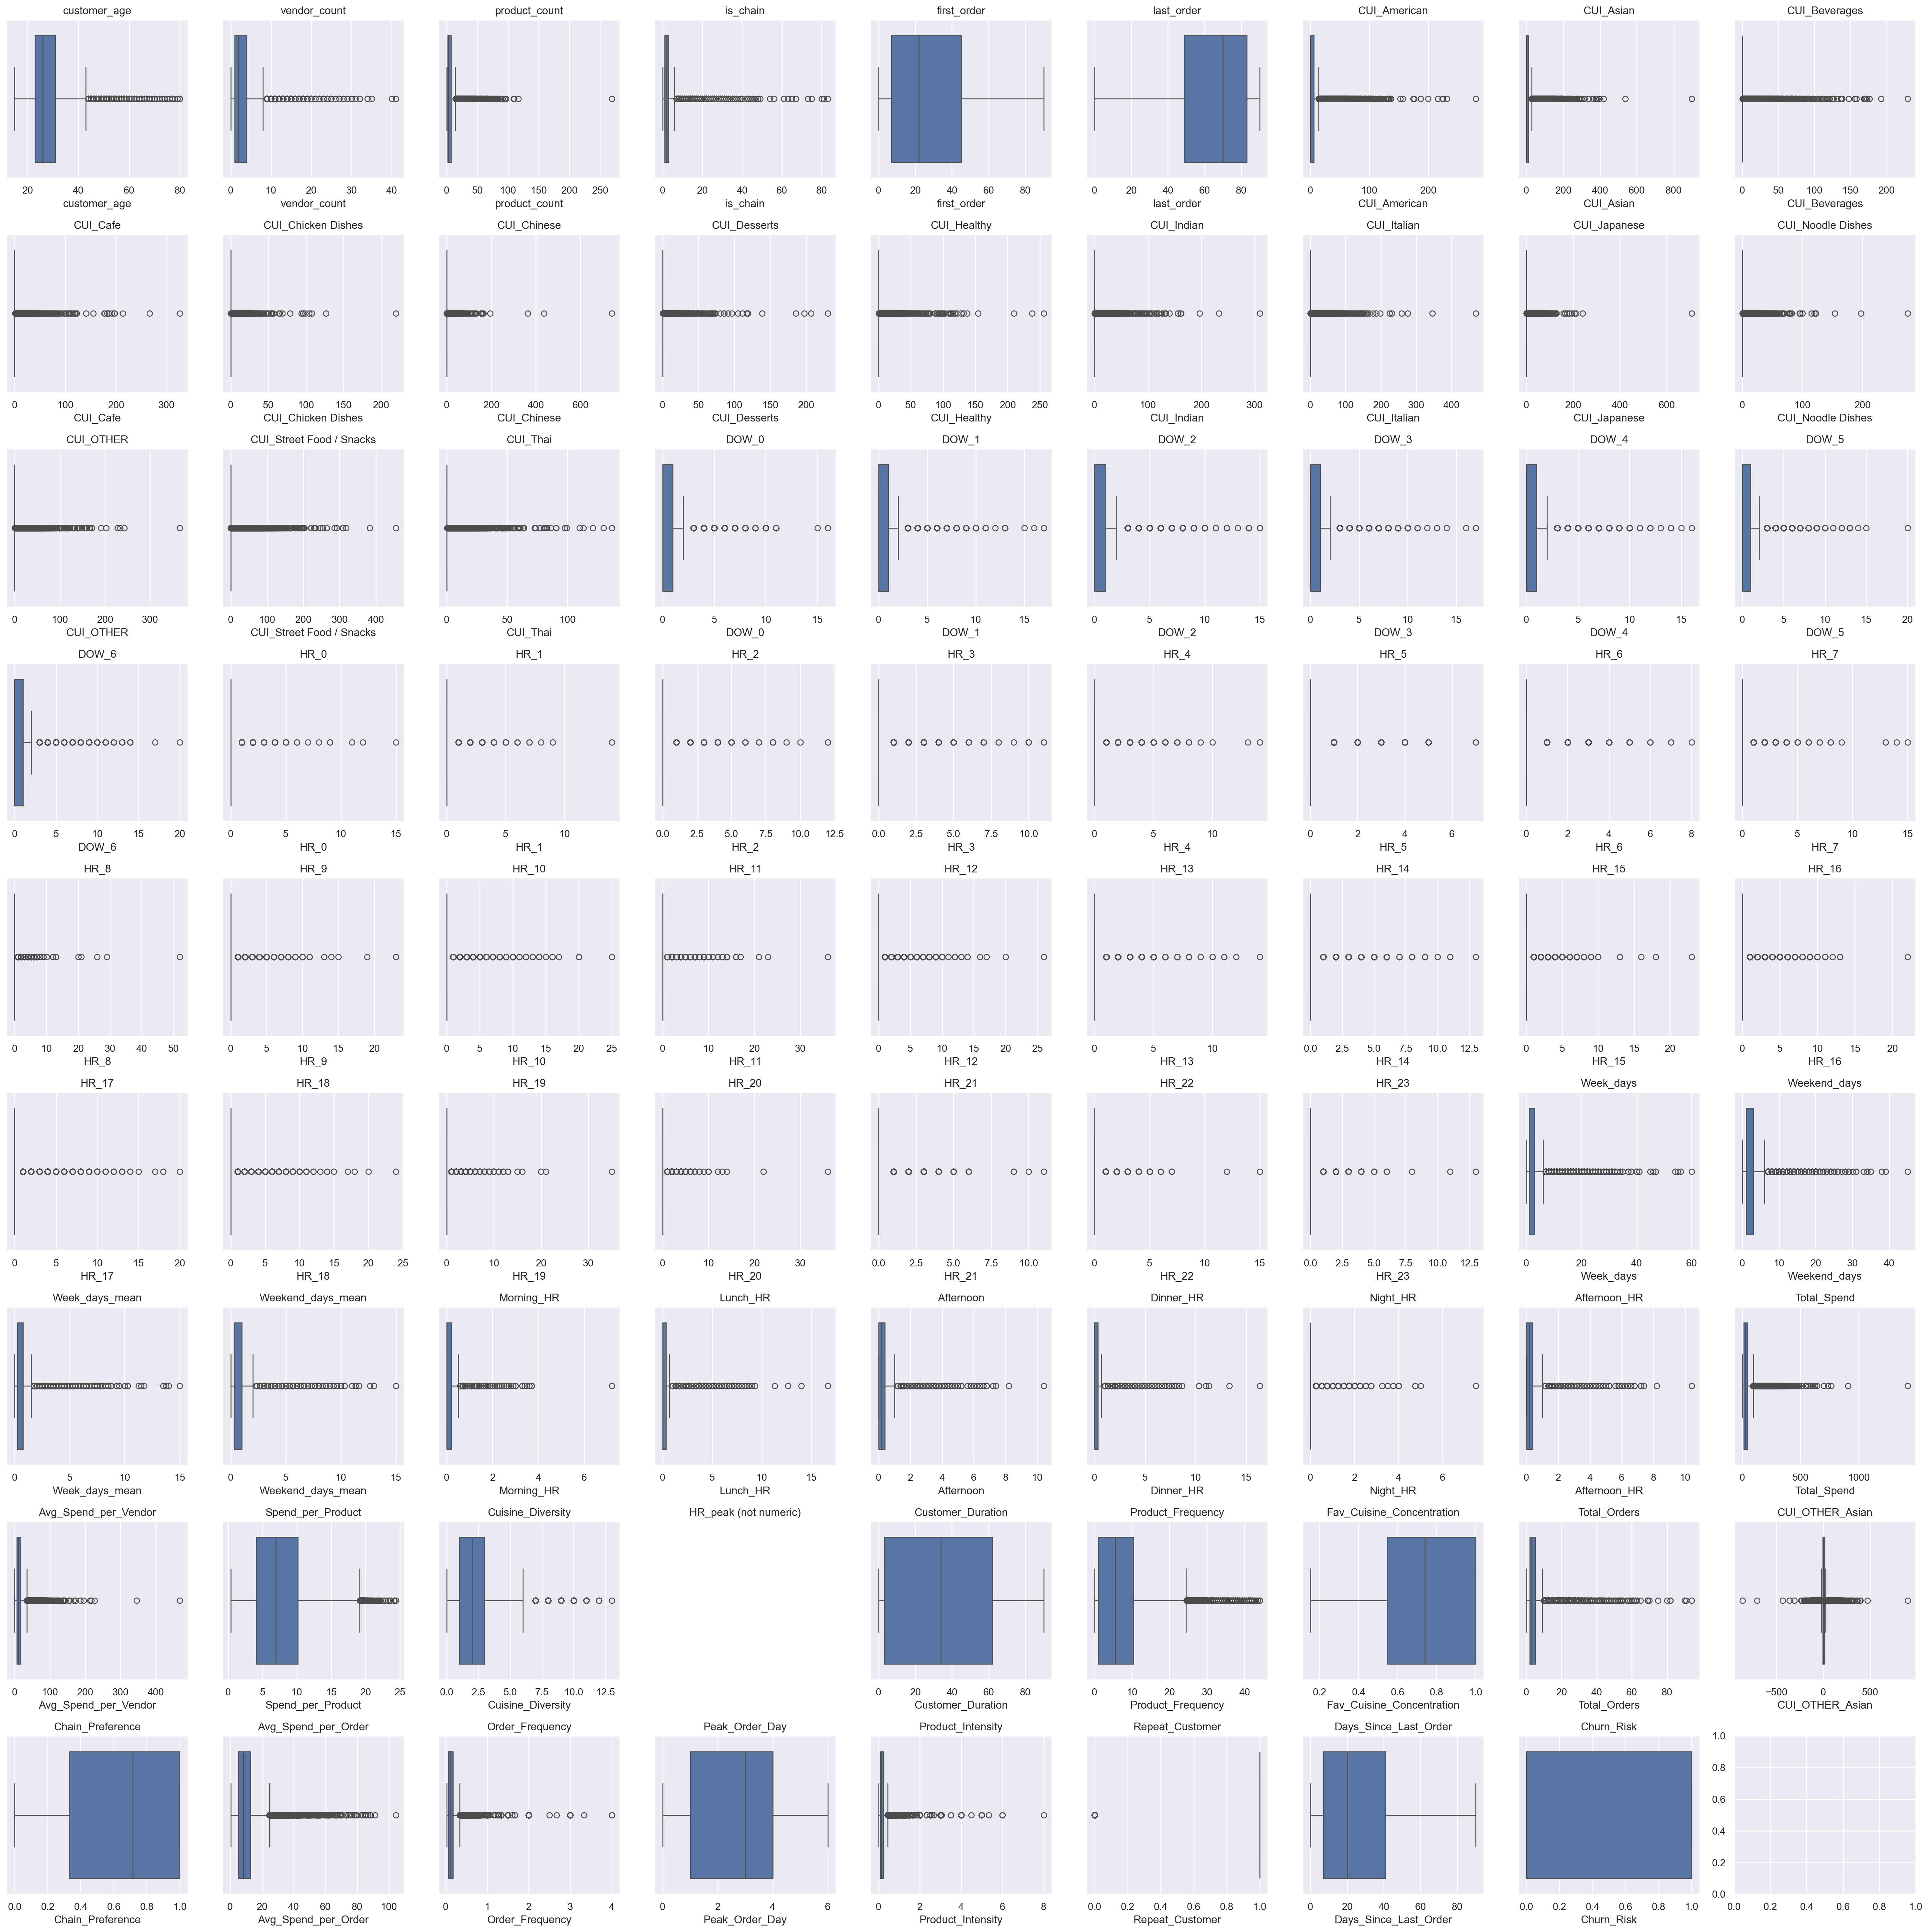

In [53]:
# Creating a 9x9 grid of subplots
fig, axes = plt.subplots(9, 9, figsize=(30, 30), tight_layout=True)

# Iterating across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    # Ensuring the column exists and is numeric
    if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat]):
        sns.boxplot(x=df[feat], ax=ax)
        ax.set_title(feat)
    else:
        ax.set_title(f"{feat} (not numeric)")  
        ax.axis('off')  # Turning off the axis if it's not numeric

# Showing the plot
plt.show()

<a class="anchor" id="features">
    
### 2.2.3 Analysis of old and new features

</a>

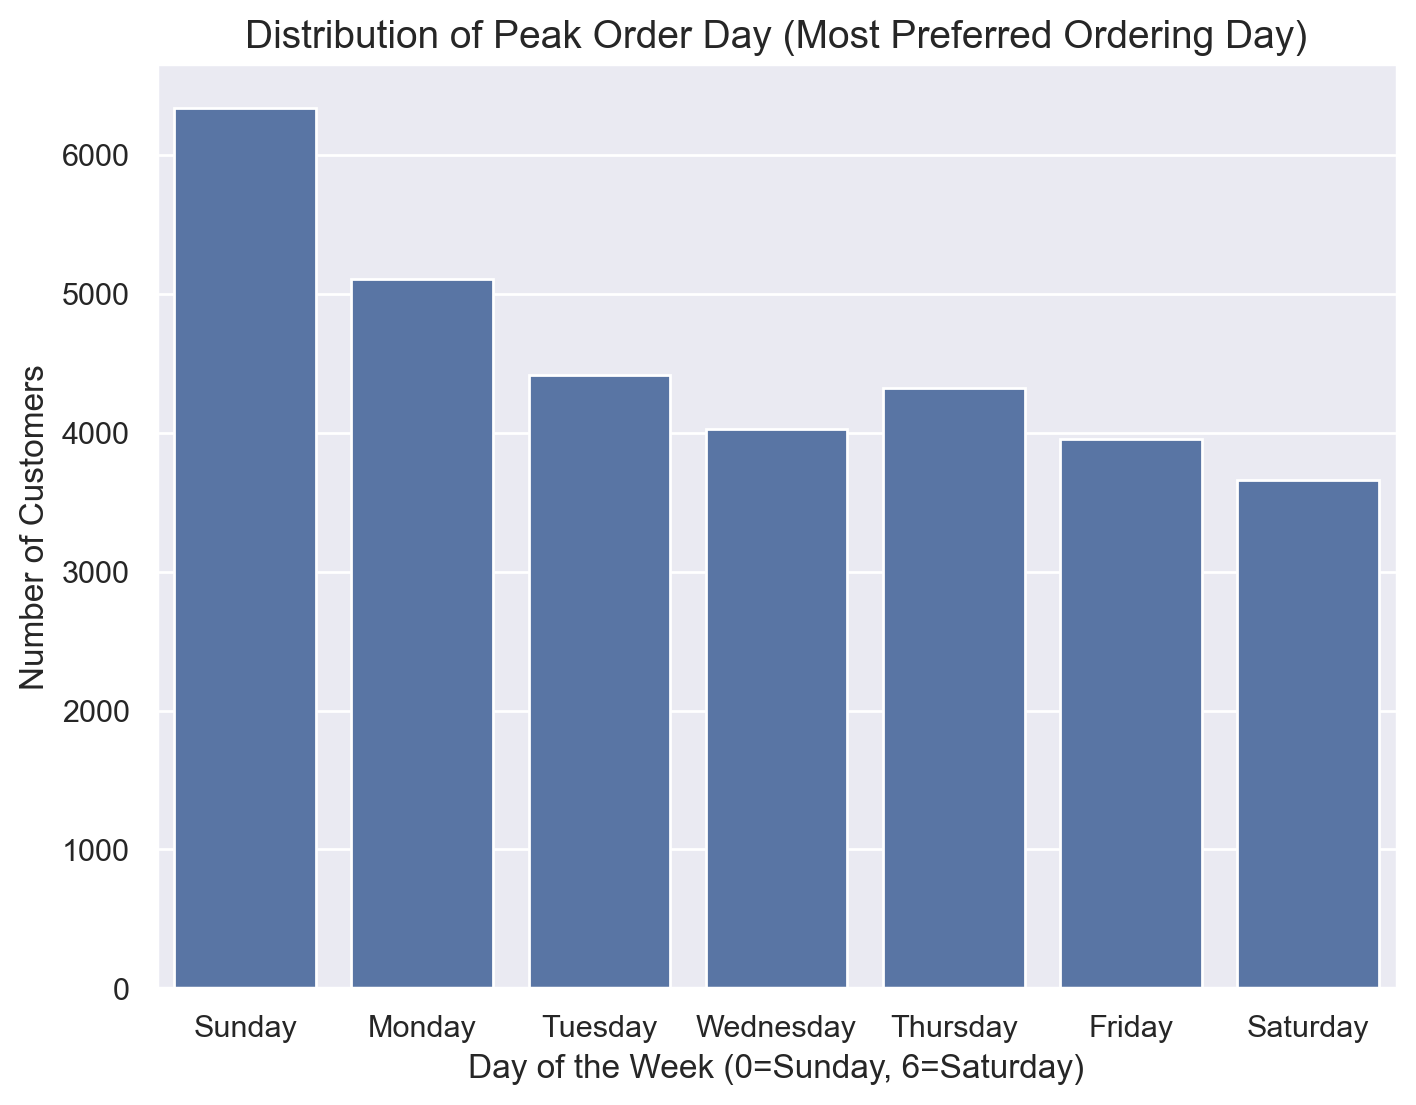

In [54]:
# Setting the figure size
plt.figure(figsize=(8,6))

# Plotting a bar chart for the most preferred ordering week days
sns.countplot(x='Peak_Order_Day', data=df)

# Adding labels and title
plt.title('Distribution of Peak Order Day (Most Preferred Ordering Day)', fontsize=14)
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.show()

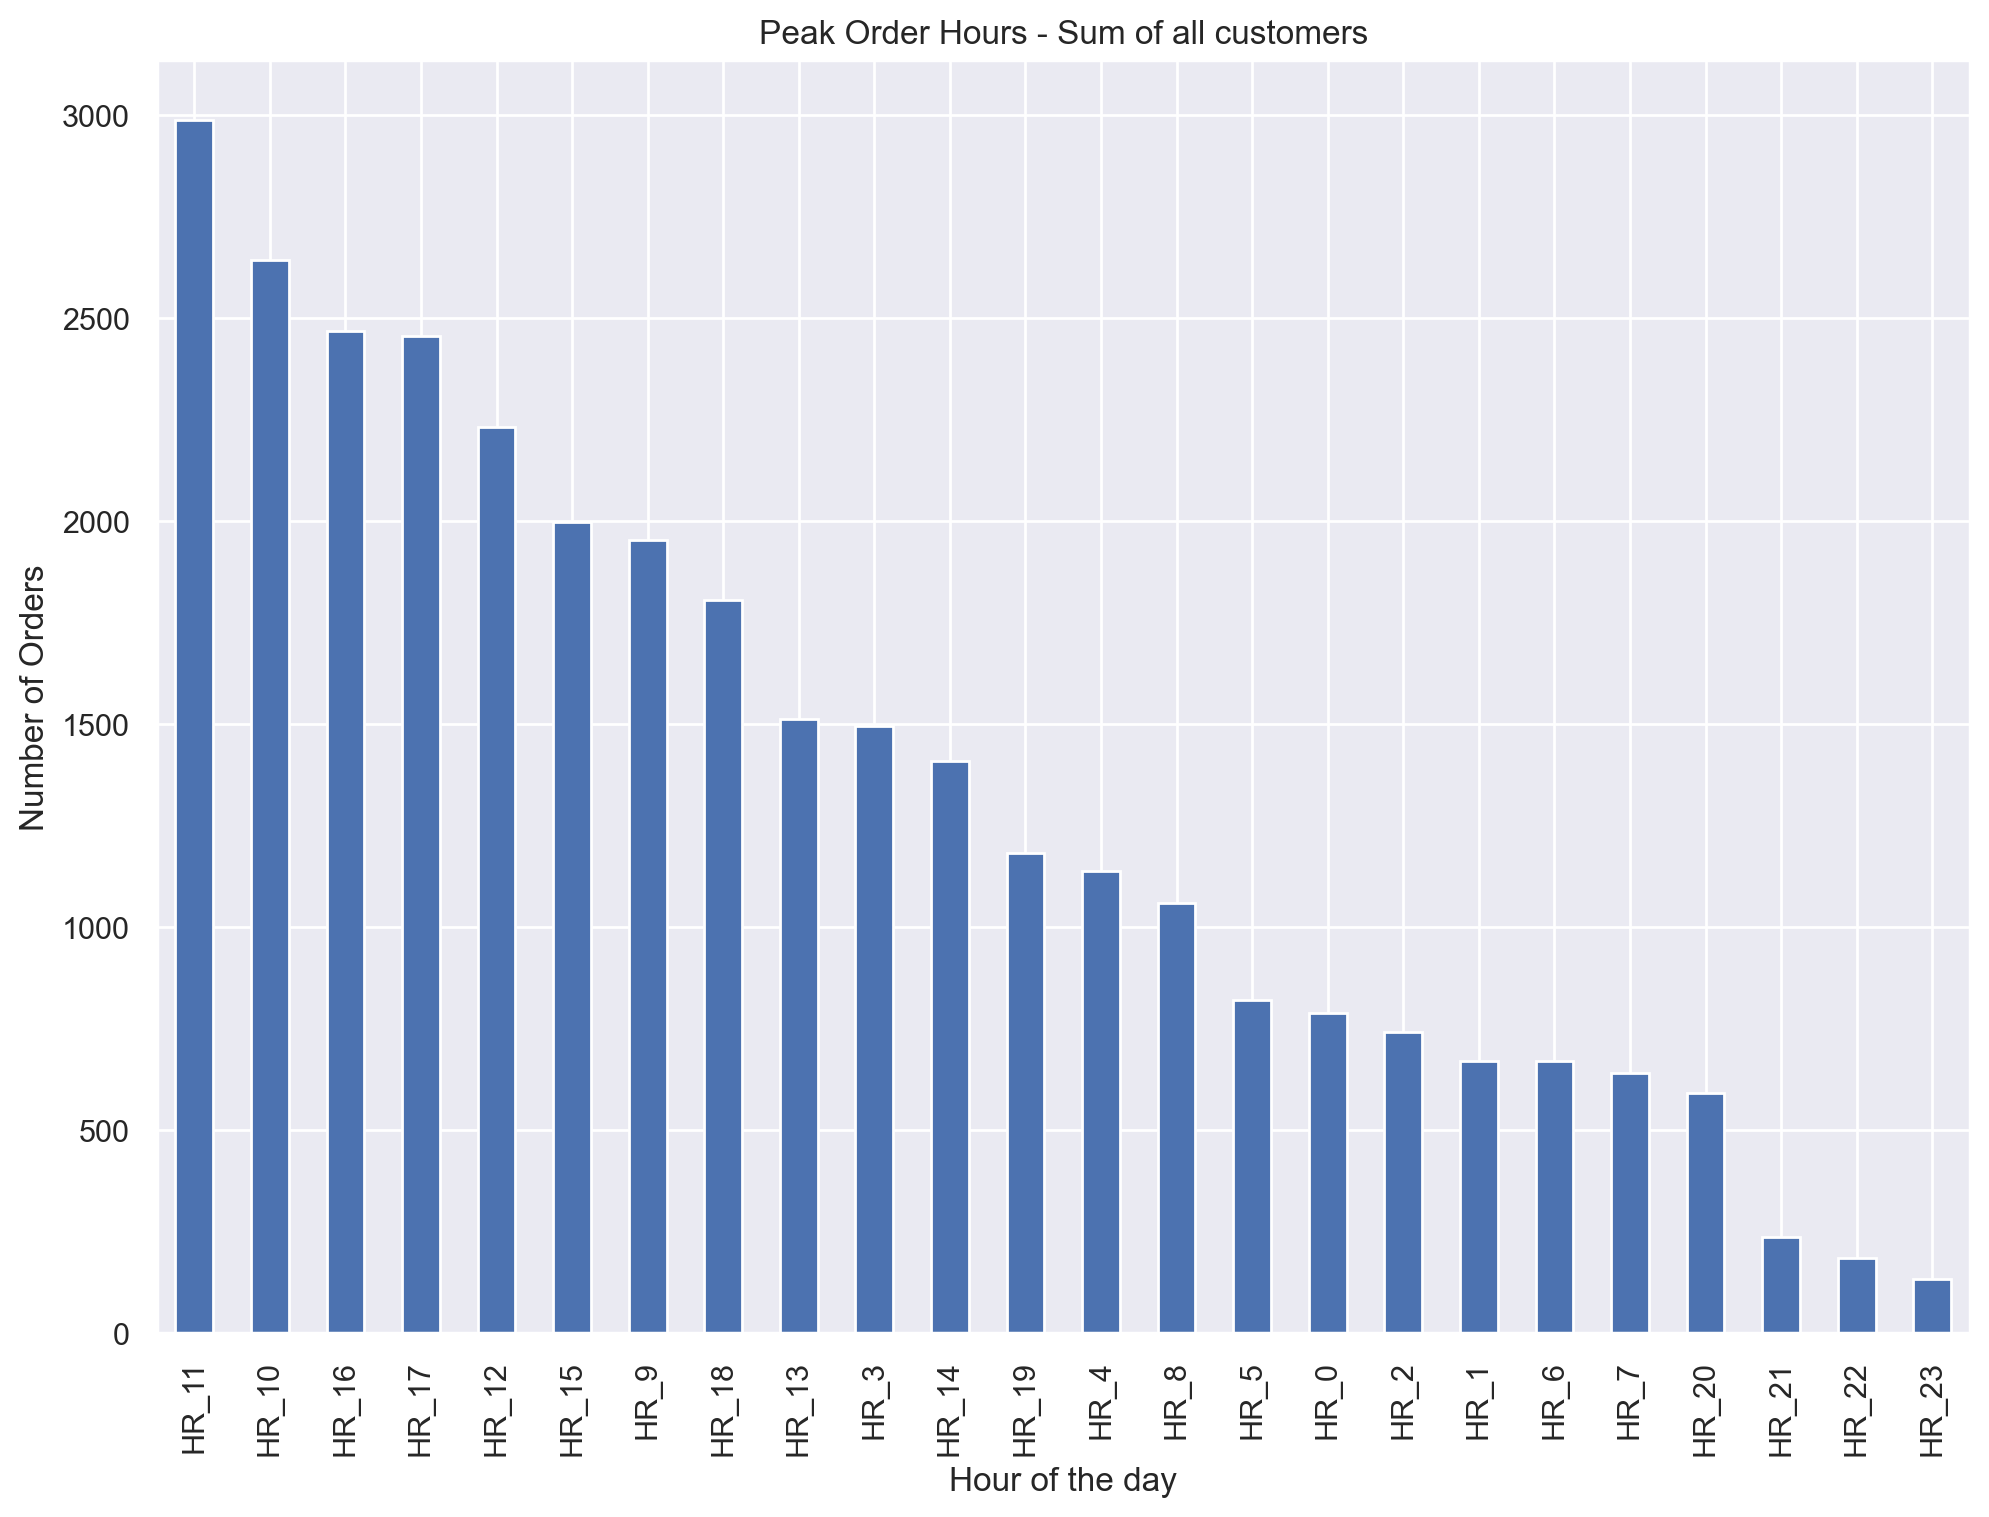

In [55]:
# Saving the counts of each peak hour
hr_peak_counts = df["HR_peak"].value_counts()

# Plotting the bar chart with the most preferred ordering hours
df["HR_peak"].value_counts().plot(kind="bar", title="Peak Order Hours - Sum of all customers")

# Adding labels and title
plt.xlabel('Hour of the day') 
plt.ylabel('Number of Orders') 

plt.show()

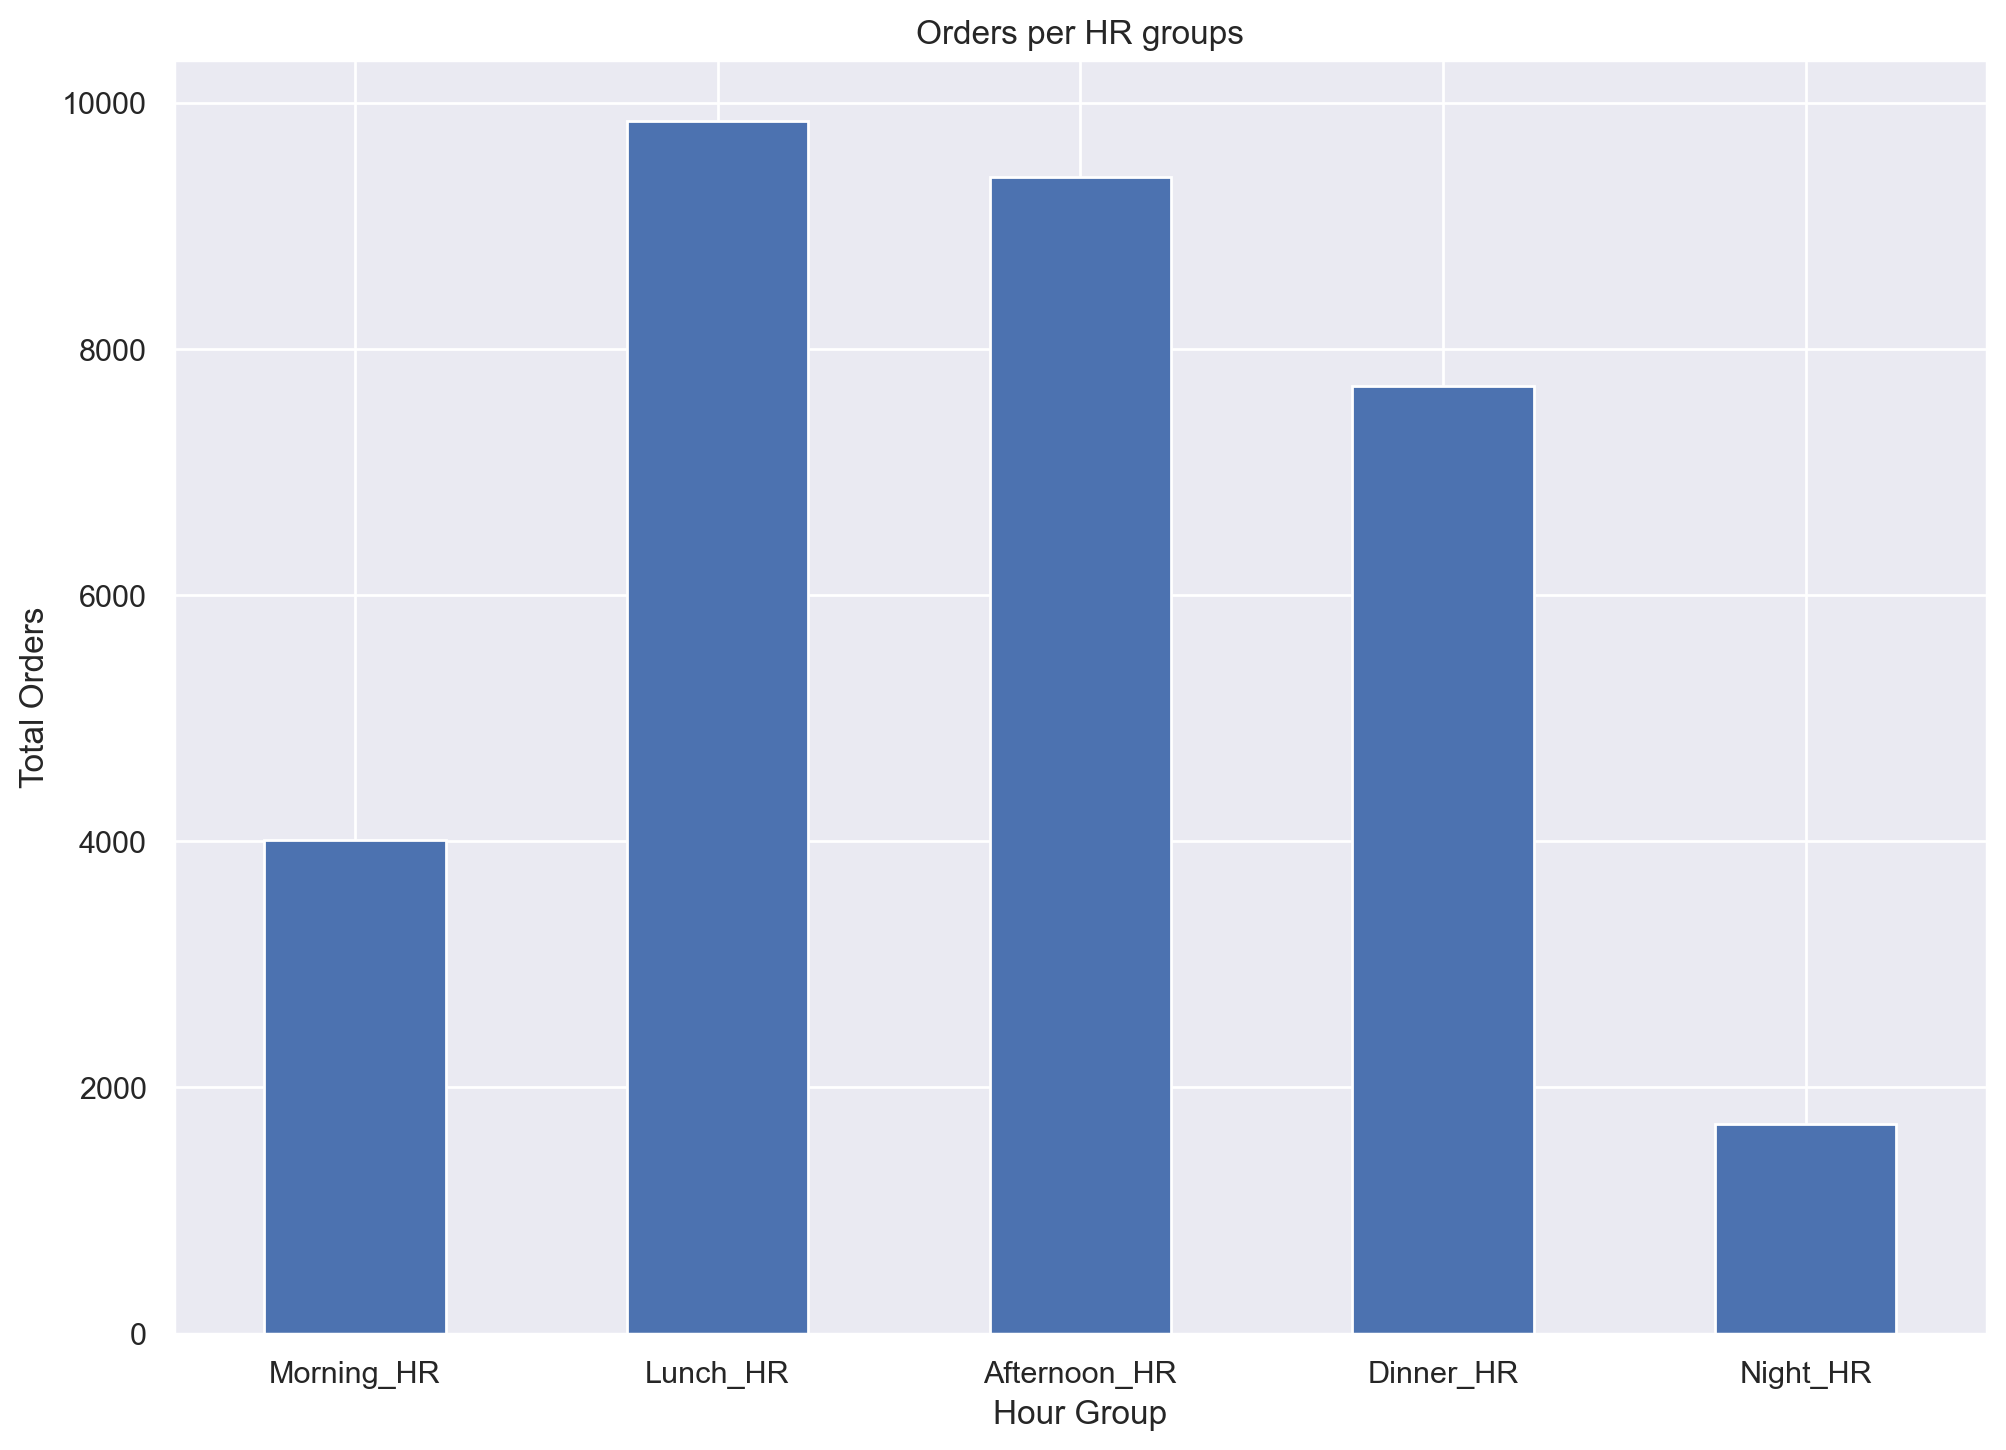

In [56]:
# Setting the HR groups
HR_groups = ["Morning_HR", "Lunch_HR", "Afternoon_HR", "Dinner_HR", "Night_HR"]


# Plotting the bar chart for the HR groups
df[HR_groups].sum().plot(kind="bar", title="Orders per HR groups")

# Adding labels and title
plt.xlabel('Hour Group')  
plt.ylabel('Total Orders')
plt.xticks(rotation=0)

plt.show()

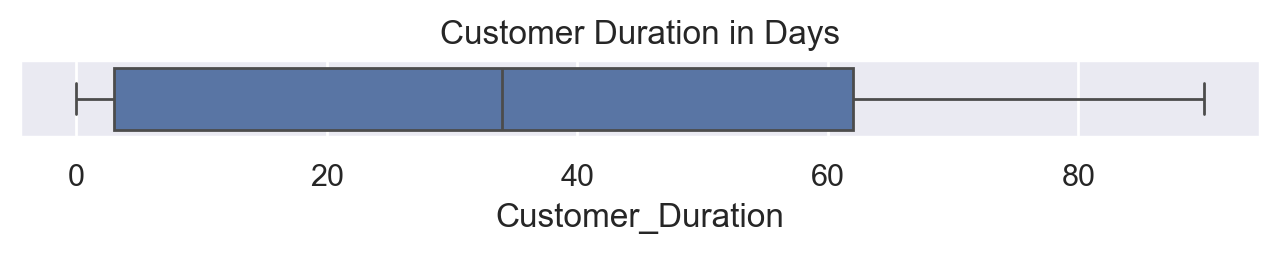

In [57]:
# Setting the figure size
plt.figure(figsize=(8, 0.5))

# Plotting the boxplot for Customer Duration
sns.boxplot(x="Customer_Duration", data=df).set(title="Customer Duration in Days")
plt.show()

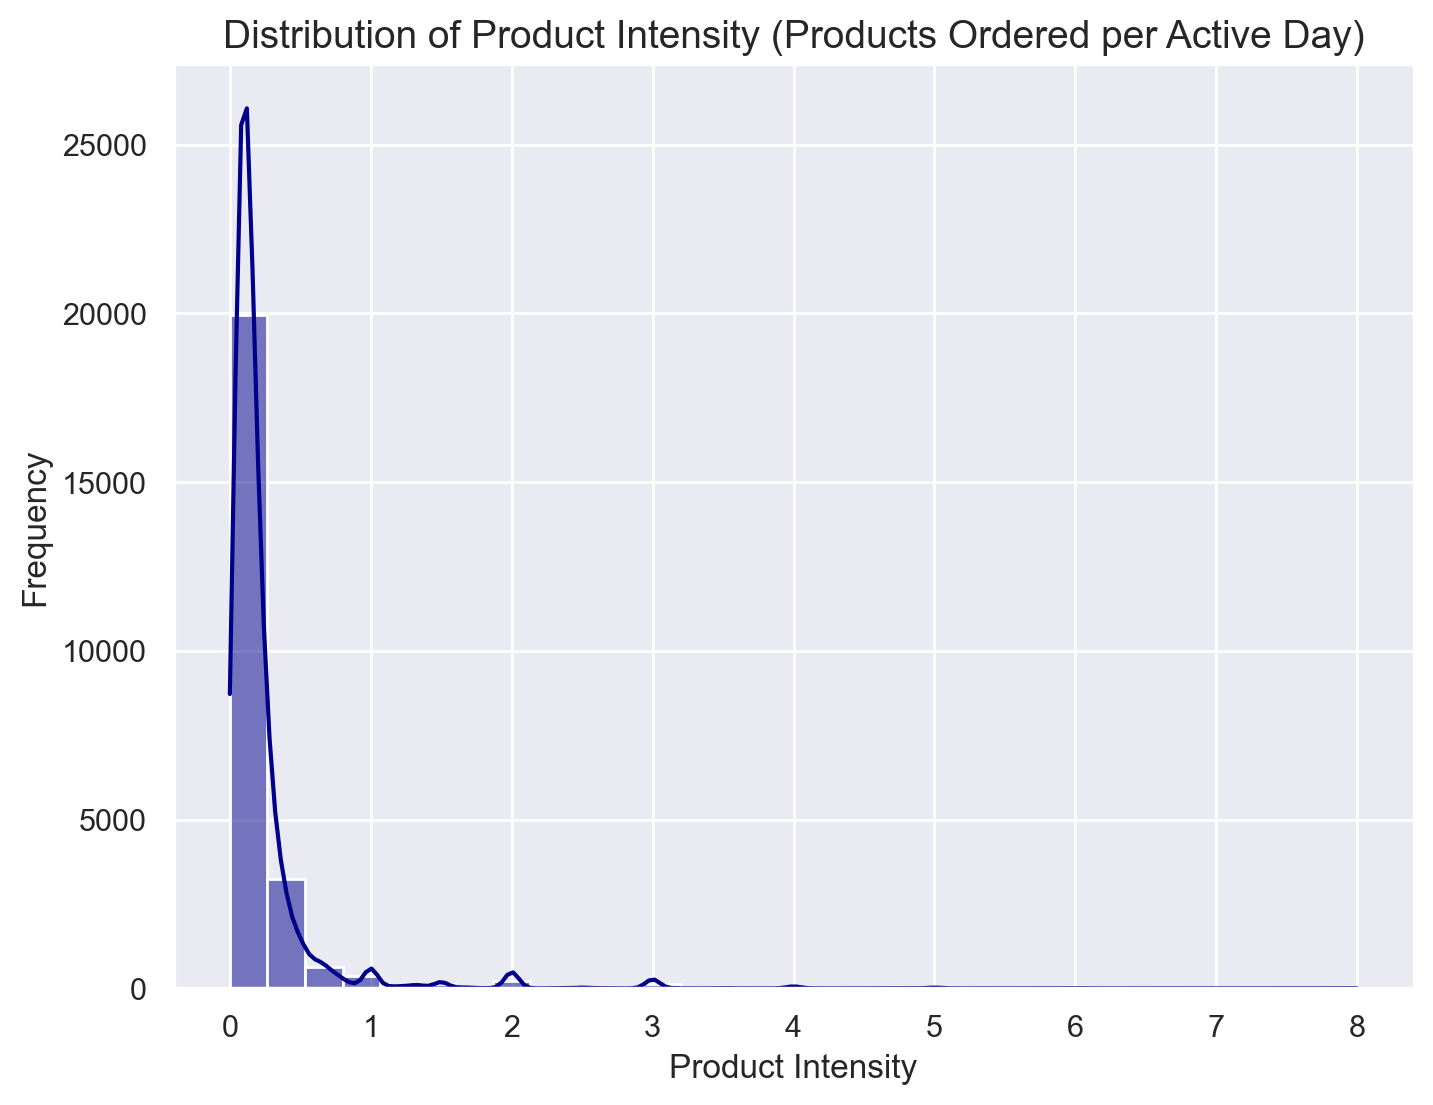

In [58]:
# Setting the figure size
plt.figure(figsize=(8,6))

# Plotting histogram for Product Intensity
sns.histplot(df['Product_Intensity'], kde=True, color='darkblue', bins=30)

# Adding labels and title
plt.title('Distribution of Product Intensity (Products Ordered per Active Day)', fontsize=14)
plt.xlabel('Product Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

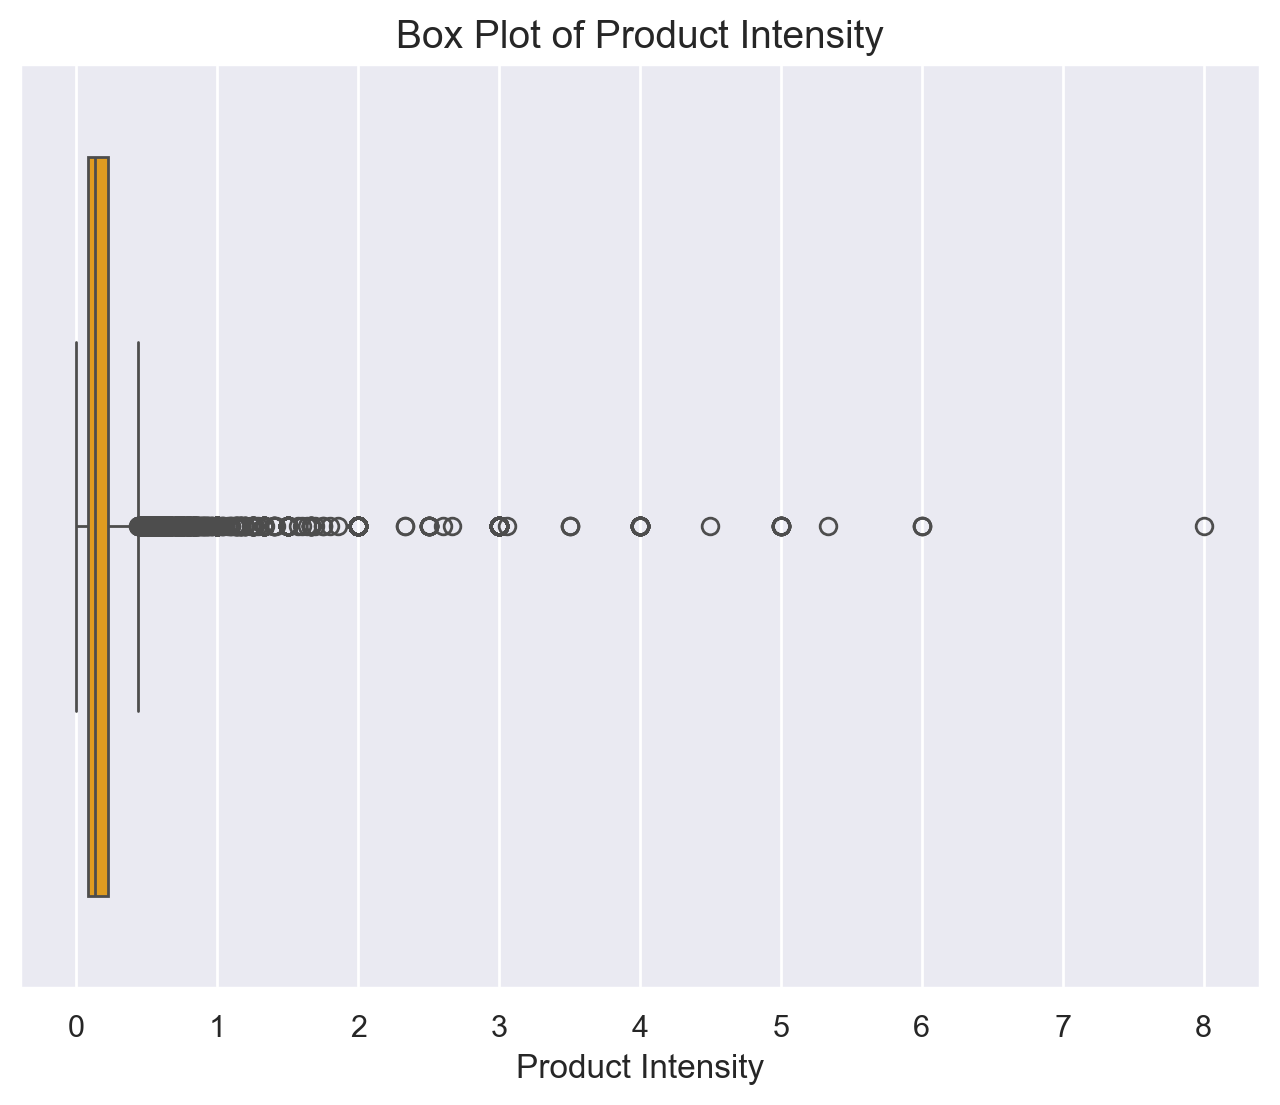

In [59]:
# Setting the figure size
plt.figure(figsize=(8,6))

# Box plot for Product_Intensity
sns.boxplot(x=df['Product_Intensity'], color='orange')

# Adding labels and title
plt.title('Box Plot of Product Intensity', fontsize=14)
plt.xlabel('Product Intensity', fontsize=12)

plt.show()

Key Observations:
* **Concentration of Low Values**: The majority of the data points are concentrated near the lower end (close to zero), indicating that most customers have a very low product intensity (i.e., they order a small number of products per active day).
* There is a long tail extending to the right, showing that a small number of customers have much higher product intensities. These customers order significantly more products per day, but they are rare compared to those with very low order intensity.
* **Outliers**: The long tail suggests the presence of outliers — customers who order more than 1 product per day are not common. These outliers might warrant further investigation to see if they represent a specific customer segment or behavior that differs from the norm.

Interpretation:
* **Behavioral Implications**: This distribution implies that most customers do not order products on a daily basis. The few customers who do have higher order intensity might represent more valuable or high-frequency shoppers.
* **Business Strategy**: Understanding this skewed distribution could help in segmenting customers based on their order intensity. Businesses could target high-intensity customers with loyalty programs or promotions, while encouraging low-intensity customers to increase their order frequency through personalized offers.

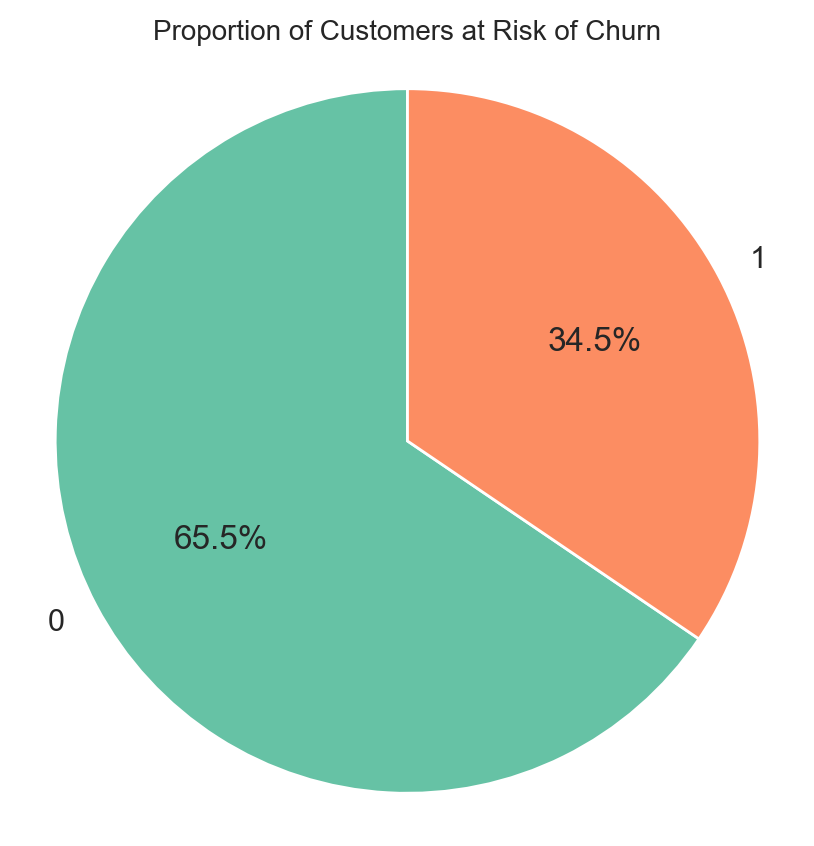

In [60]:
# Setting the figure size
plt.figure(figsize=(5, 5))

churn_counts = df['Churn_Risk'].value_counts()
colors = sns.color_palette("Set2", n_colors=len(churn_counts)) 

# Pie chart for Churn Risk Proportion
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Customers at Risk of Churn', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

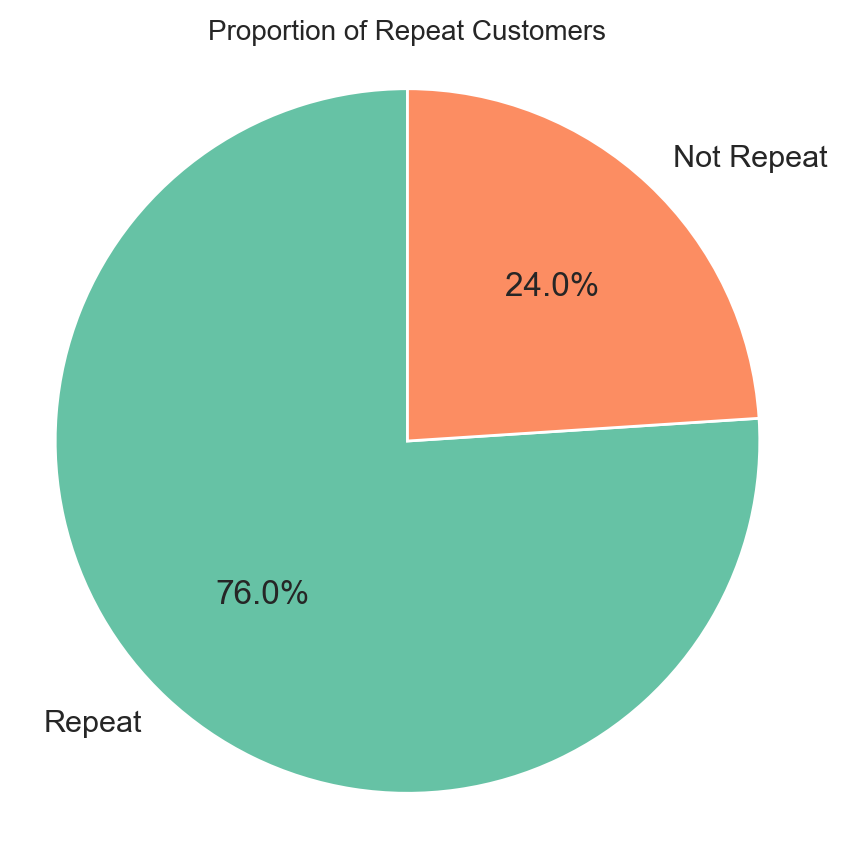

In [61]:
# Setting the figure size
plt.figure(figsize=(5, 5))

repeat_counts = df['Repeat_Customer'].value_counts()
colors = sns.color_palette("Set2", n_colors=len(repeat_counts))

# Pie chart for Repeat Customers vs One-Time Customers
plt.pie(repeat_counts, labels=['Repeat', 'Not Repeat'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Repeat Customers', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### Region distribution per numeric feature

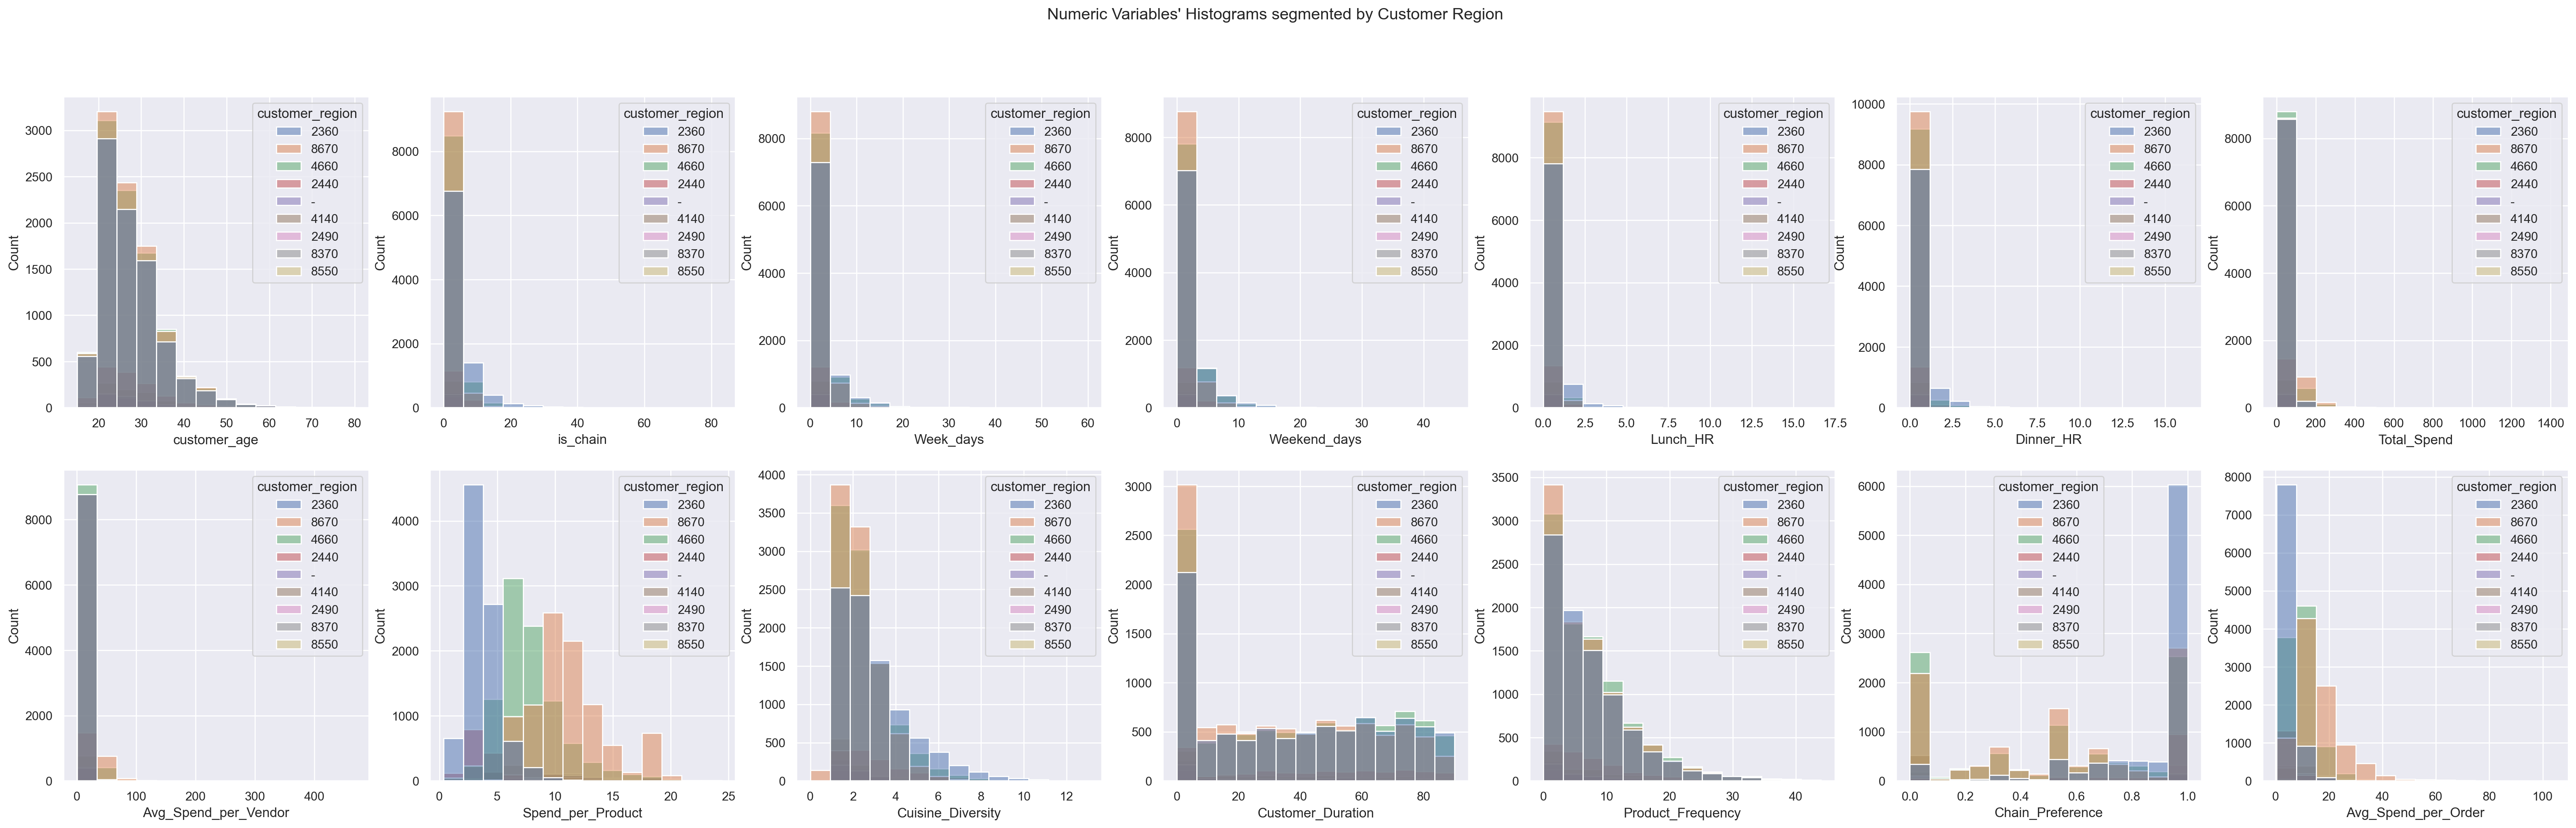

In [62]:
# Most relevant features to analyze
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Product_Frequency','Chain_Preference', 'Avg_Spend_per_Order']

# Number of rows and columns for the subplots
sp_rows = 2
sp_cols = 7


# Preparing the figure. Creating individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(40, 11))

# Plotting the histograms for each feature with the customer_region as hue
for ax, feat in zip(axes.flatten(), variables): 
    sns.histplot(df, x=feat, ax=ax, bins=14, hue='customer_region')

# Adding a subtitle to the figure
plt.suptitle("Numeric Variables' Histograms segmented by Customer Region")

plt.show()

On the figure above, it's specially interesting to analyse the 1st (age) and the 9th (spend per product) graphs. A majority of our customer base is from the same region and the amount of money people spend per product also depends a lot on their region

### Favorite Cuisine per numeric feature

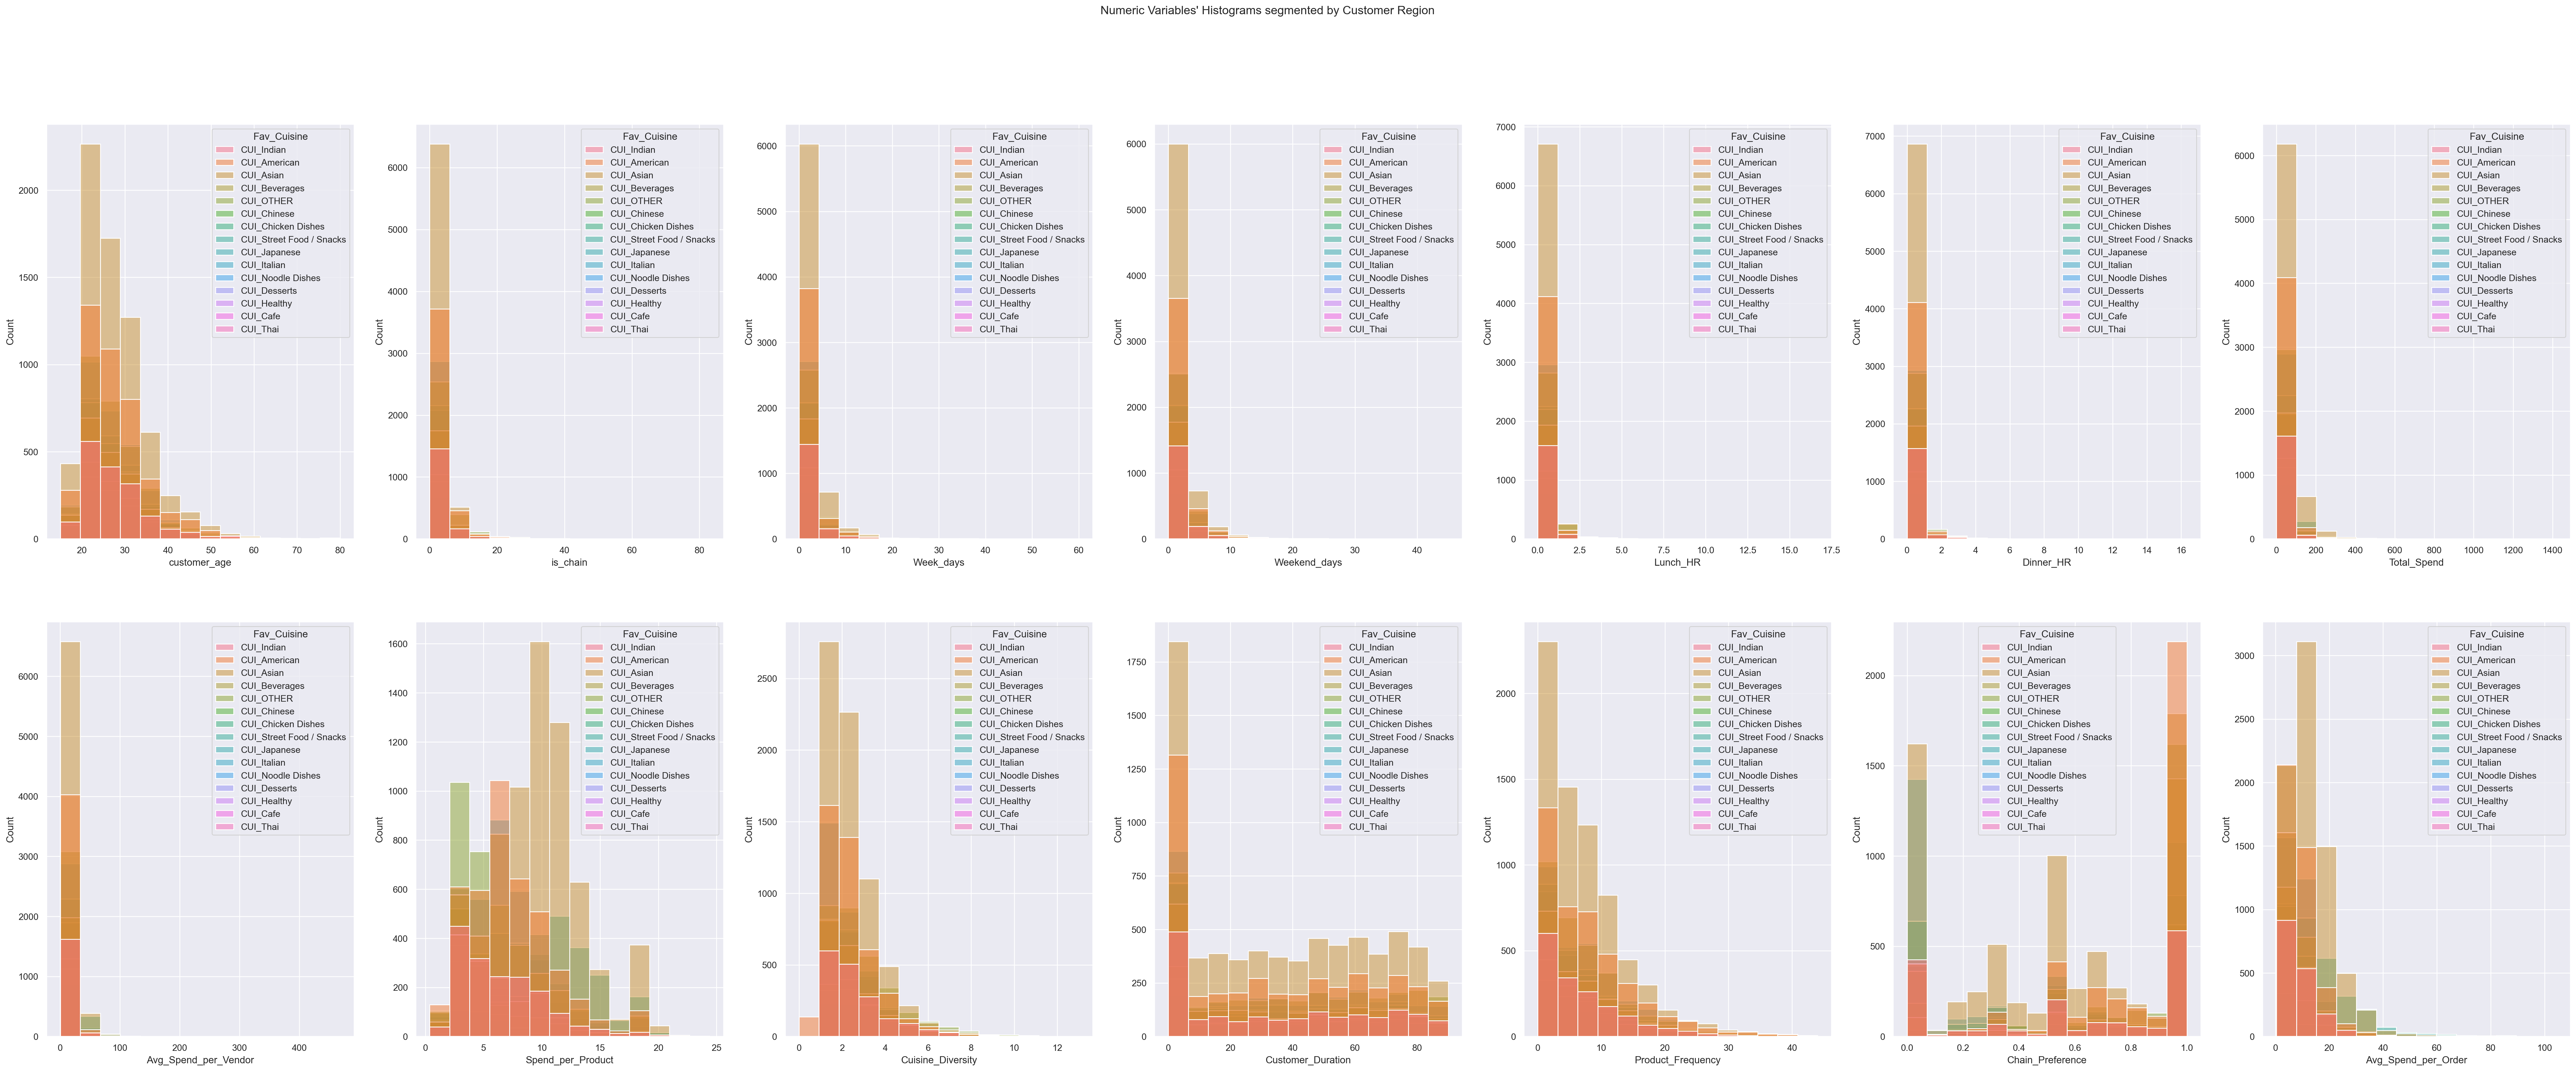

In [63]:
# Most relevant features to analyze
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Product_Frequency','Chain_Preference', 'Avg_Spend_per_Order']

# Number of rows and columns for the subplots
sp_rows = 2
sp_cols = 7


# Preparing the figure. Creating individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(55, 20))

# Plotting the histograms for each feature with the customer_region as hue
for ax, feat in zip(axes.flatten(), variables): 
    sns.histplot(df, x=feat, ax=ax, bins=14, hue='Fav_Cuisine')

# Adding a subtitle to the figure
plt.suptitle("Numeric Variables' Histograms segmented by Customer Region")

plt.show()



* **Dominance of certain Cuisines:** Cuisines like CUI_Indian, CUI_Chinese, and even CUI_American are clearly dominant across all variables, indicating a solid customer preference.
* **Low Spending is Common:** Most customers fall into low spending categories (fact that is presented by variables such as Total_Spend and Avg_Spend_per_Order.), suggesting the dataset may primarily reflect casual or budget-conscious diners.
* **Average customer:** The "average" customer base is young-adult (20–35 years old), prefers a low variety of cuisines and makes low expenditures. Repeat customers appear to be linked to specific cuisine-types or chains.

### Payment Method influence on Total Spend

(0.0, 500.0)

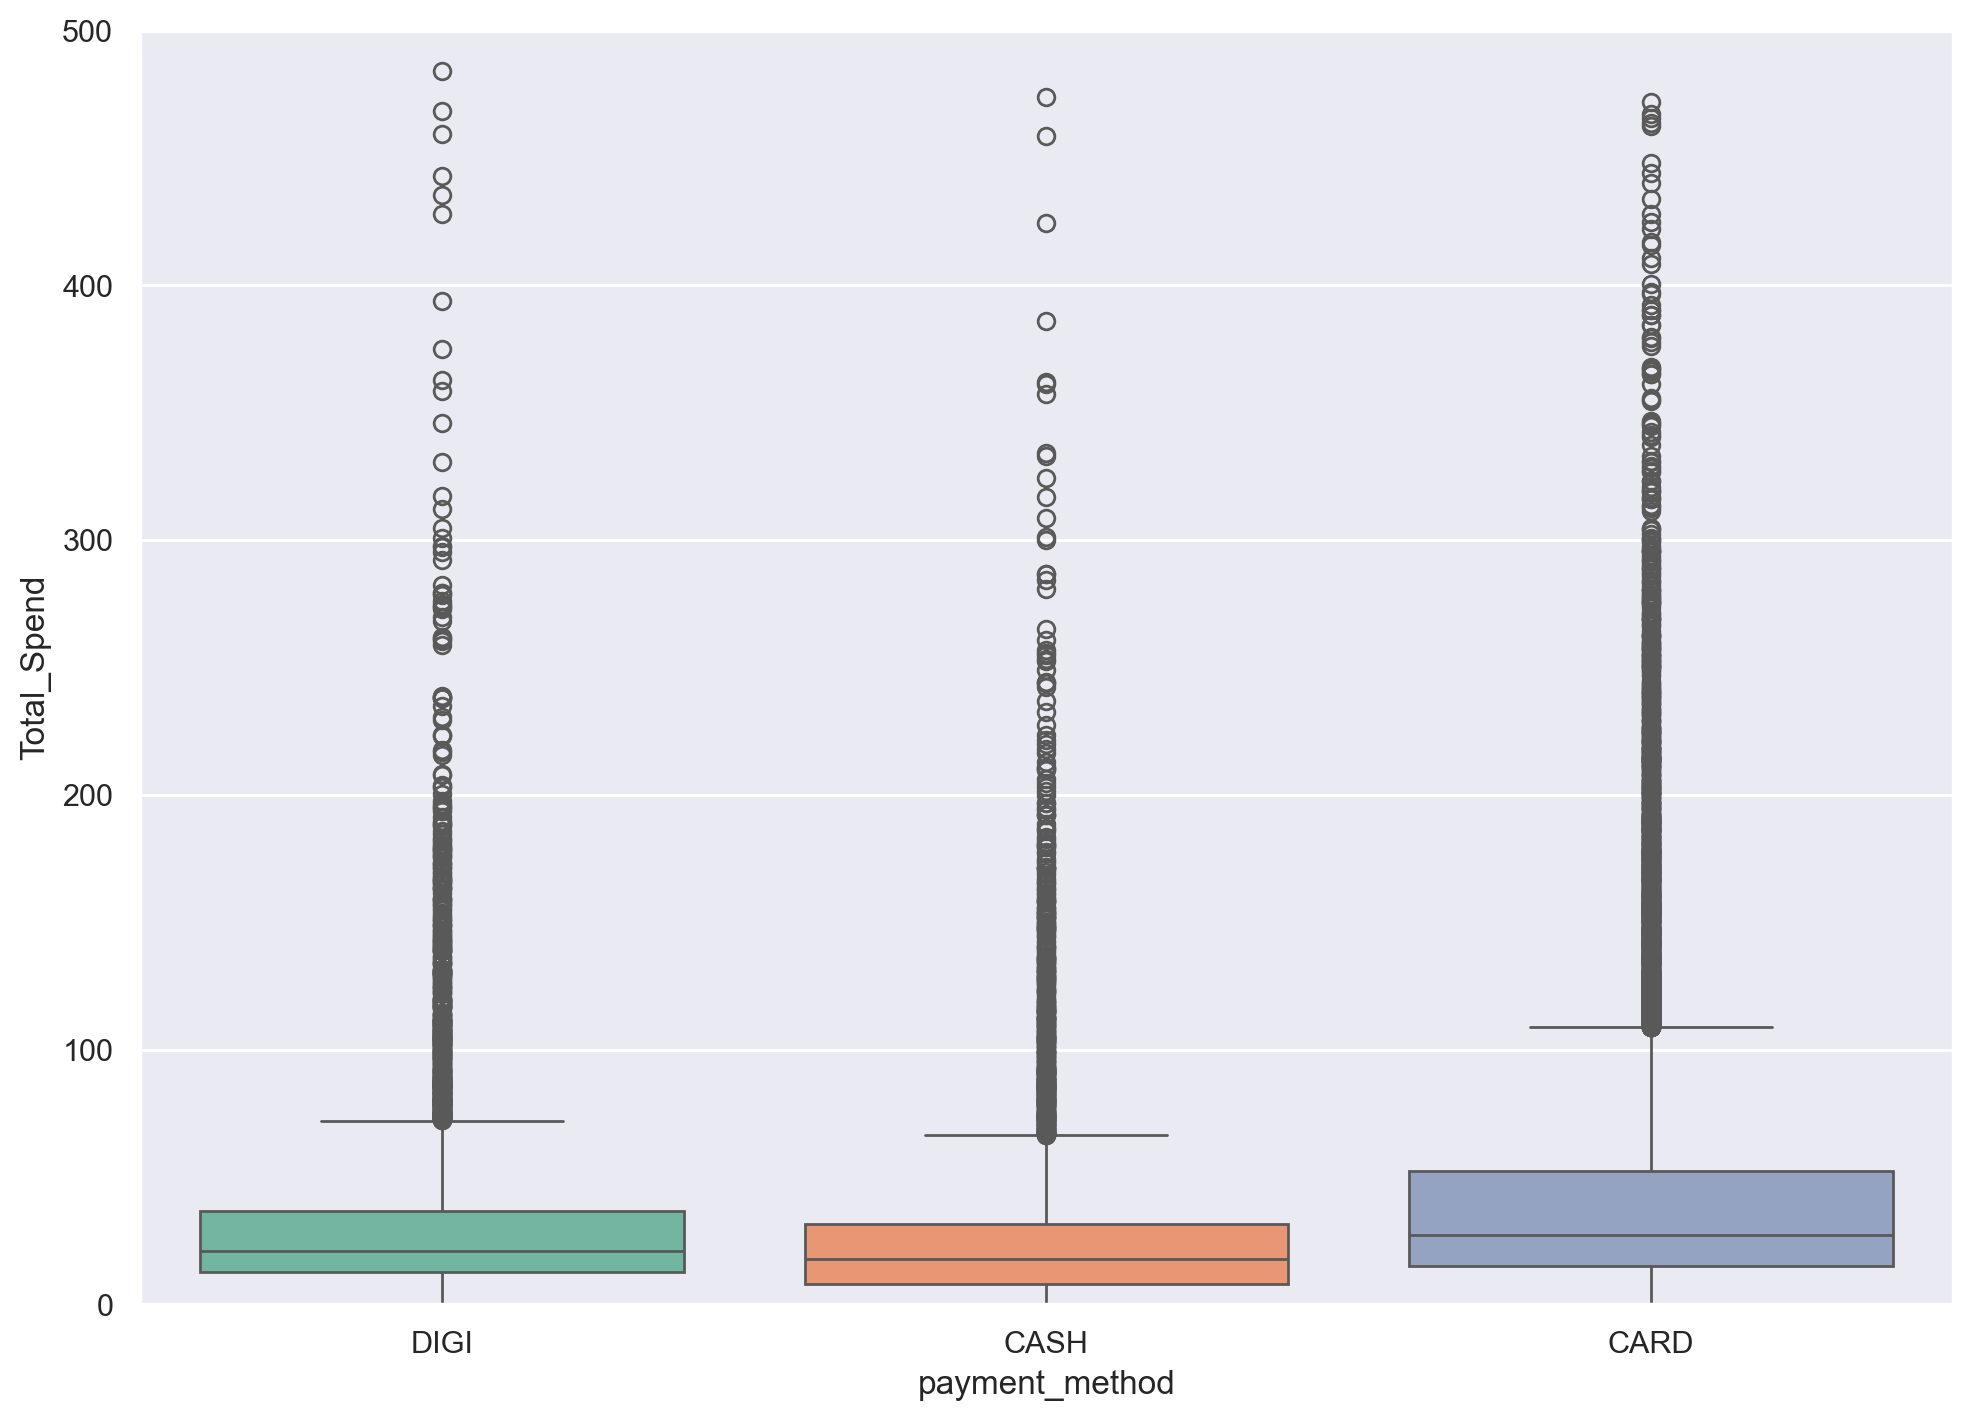

In [64]:
# Boxplot for Payment Method vs Total Spend
sns.boxplot(x='payment_method', y='Total_Spend', data=df, palette='Set2')

# Adjusting for outliers
plt.ylim(0, 500)

### Exploring Age Patterns

* Favorite Cuisine by Age

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CUI_Indian'),
  Text(1, 0, 'CUI_American'),
  Text(2, 0, 'CUI_Asian'),
  Text(3, 0, 'CUI_Beverages'),
  Text(4, 0, 'CUI_OTHER'),
  Text(5, 0, 'CUI_Chinese'),
  Text(6, 0, 'CUI_Chicken Dishes'),
  Text(7, 0, 'CUI_Street Food / Snacks'),
  Text(8, 0, 'CUI_Japanese'),
  Text(9, 0, 'CUI_Italian'),
  Text(10, 0, 'CUI_Noodle Dishes'),
  Text(11, 0, 'CUI_Desserts'),
  Text(12, 0, 'CUI_Healthy'),
  Text(13, 0, 'CUI_Cafe'),
  Text(14, 0, 'CUI_Thai')])

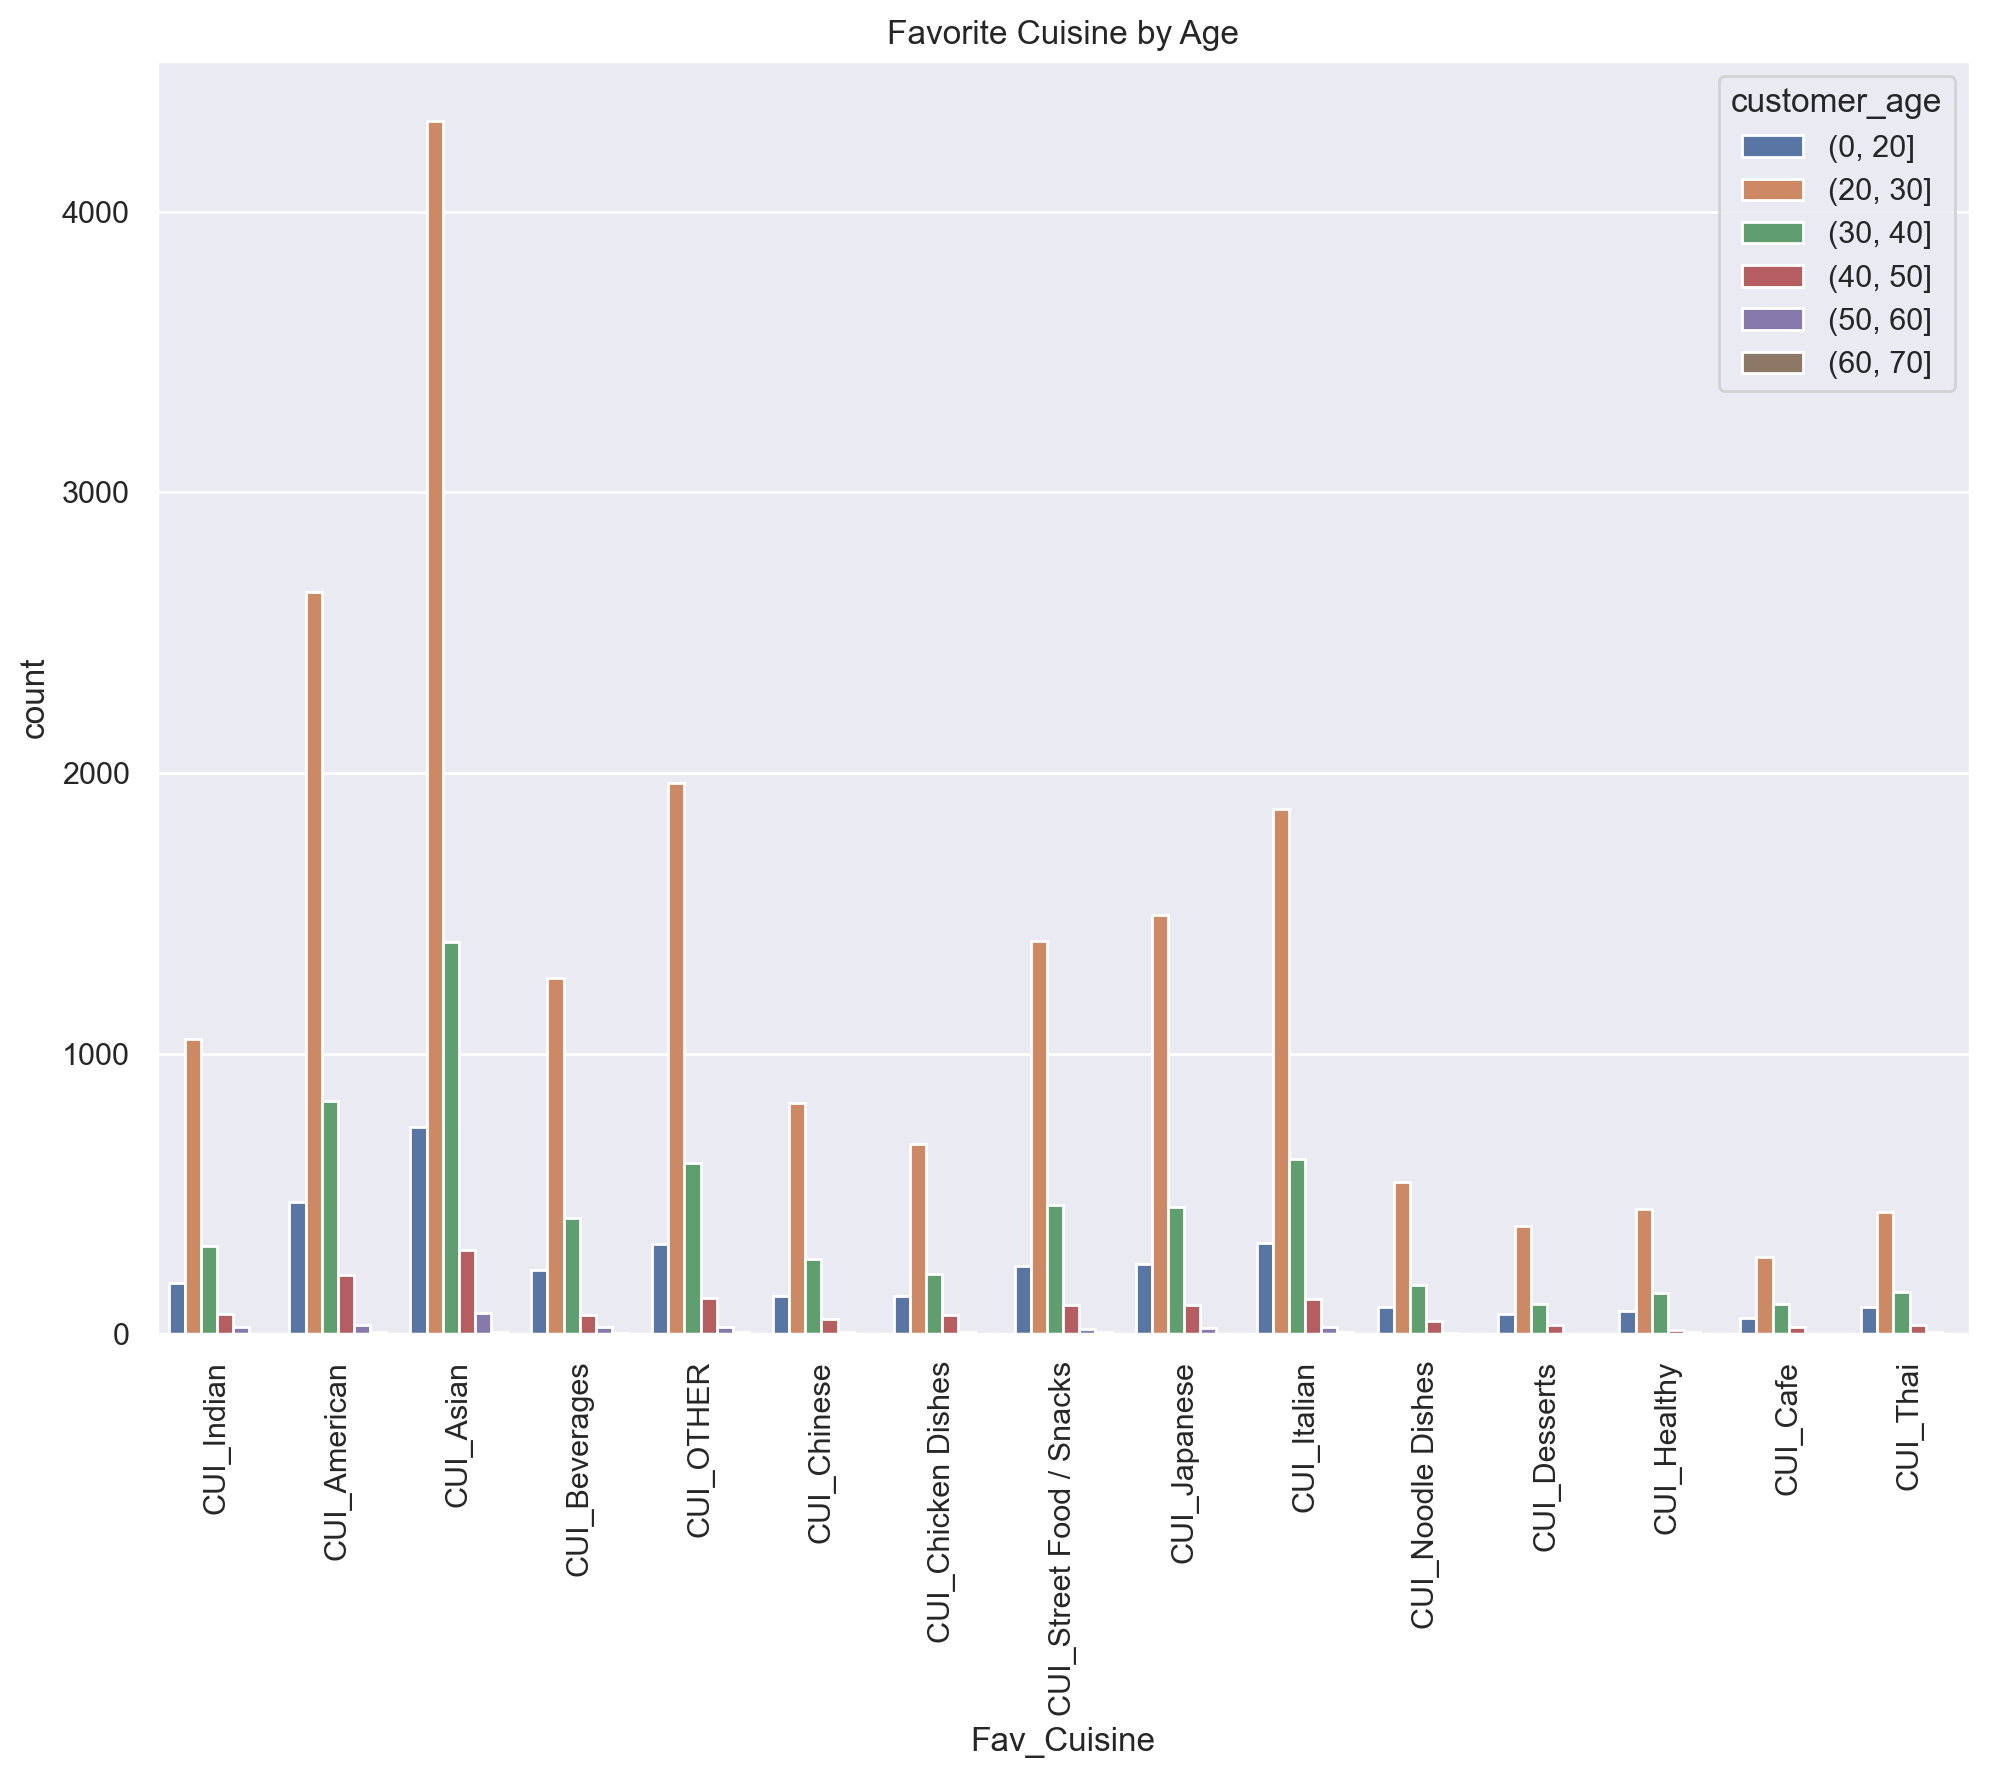

In [65]:
sns.countplot(data=df, x='Fav_Cuisine', hue=pd.cut(df['customer_age'], bins=[0, 20, 30, 40, 50, 60, 70]))
plt.title("Favorite Cuisine by Age")
plt.xticks(rotation = 90)

It's evident that younger customers show a preference for CUI_Indian, CUI_American, CUI_Asian, and CUI_Beverages. Oh the contrary, older customers tend to prefer more traditional and/or healthier options such as CUI_Healthy and CUI_Italian. There's a supremecy of CUI_Asian as stated previously, now being also noticeable the hard preference of 20-30 years-old

<Axes: xlabel='Customer_Duration', ylabel='Count'>

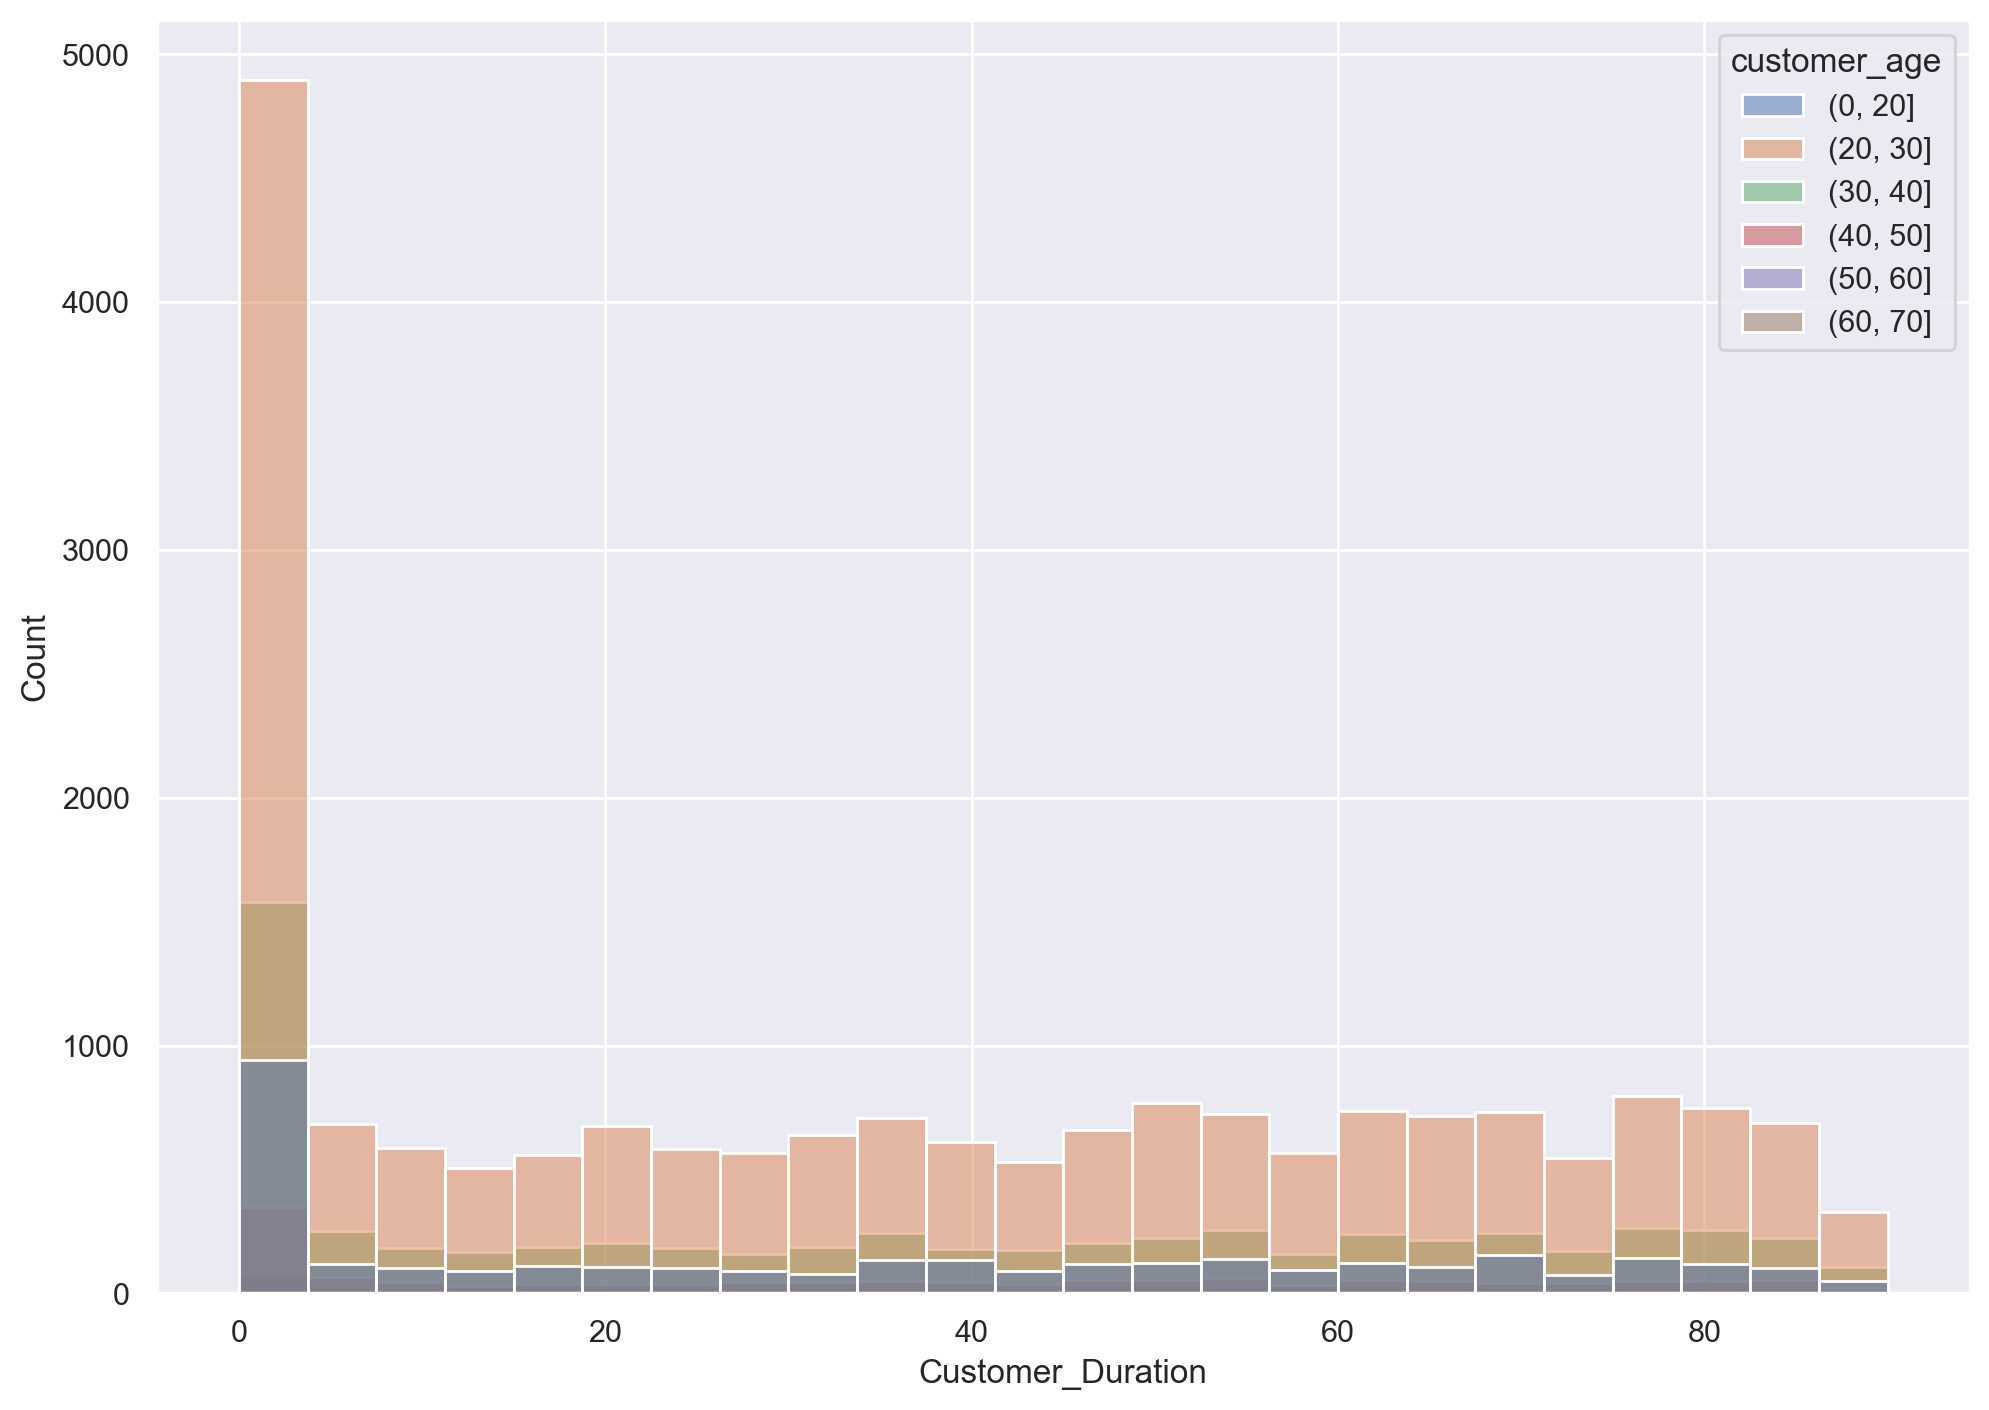

In [66]:
sns.histplot(data=df, x='Customer_Duration', hue=pd.cut(df['customer_age'], bins=[0, 20, 30, 40, 50, 60, 70]))

Most non-durable customers are between the ages of 20-30 years, though it's important to notice that's also our dominant age-class in the other durations. There seems to be an issue with retaining customers since the first bin (duration = 0) has a significantly higher count compared to other durations, which indicates a large number of customers with very short (or possibly none) orders made.
For longer durations, the distribution of customers appears to be much more uniform.

<Axes: xlabel='Days_Since_Last_Order', ylabel='customer_age'>

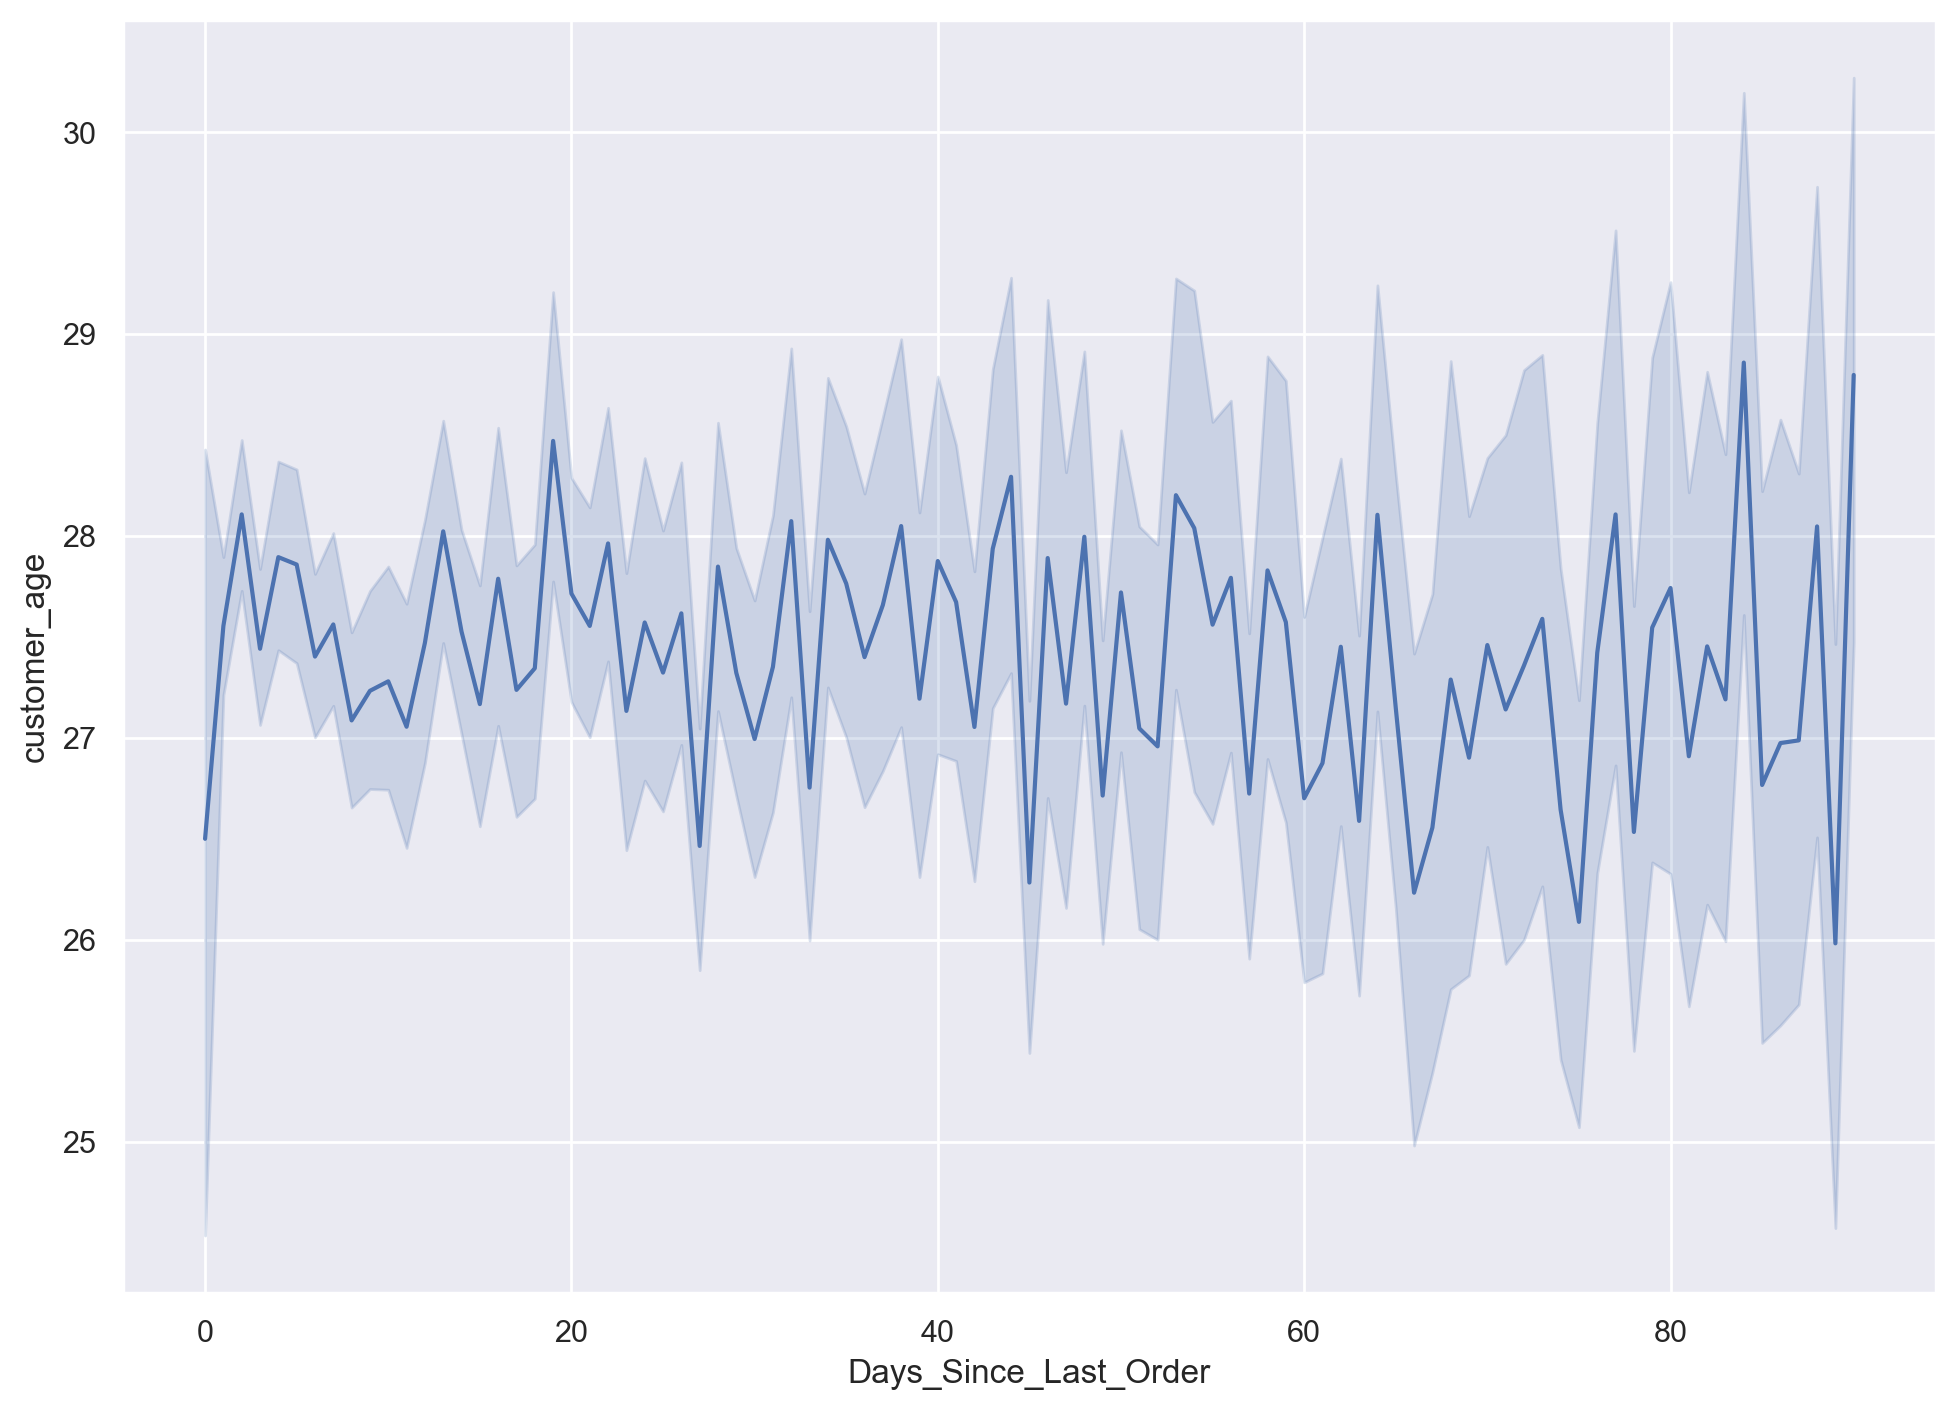

In [67]:
sns.lineplot(data=df, x='Days_Since_Last_Order', y='customer_age')

The average fluctuates around 27-28 years. In general, it doesn't appear to be a particular increasing or decreasing trend in customer age over the sequence.

### Exploring Day / Hour Order Patterns
* Day of The Week (number of orders per day of the week):

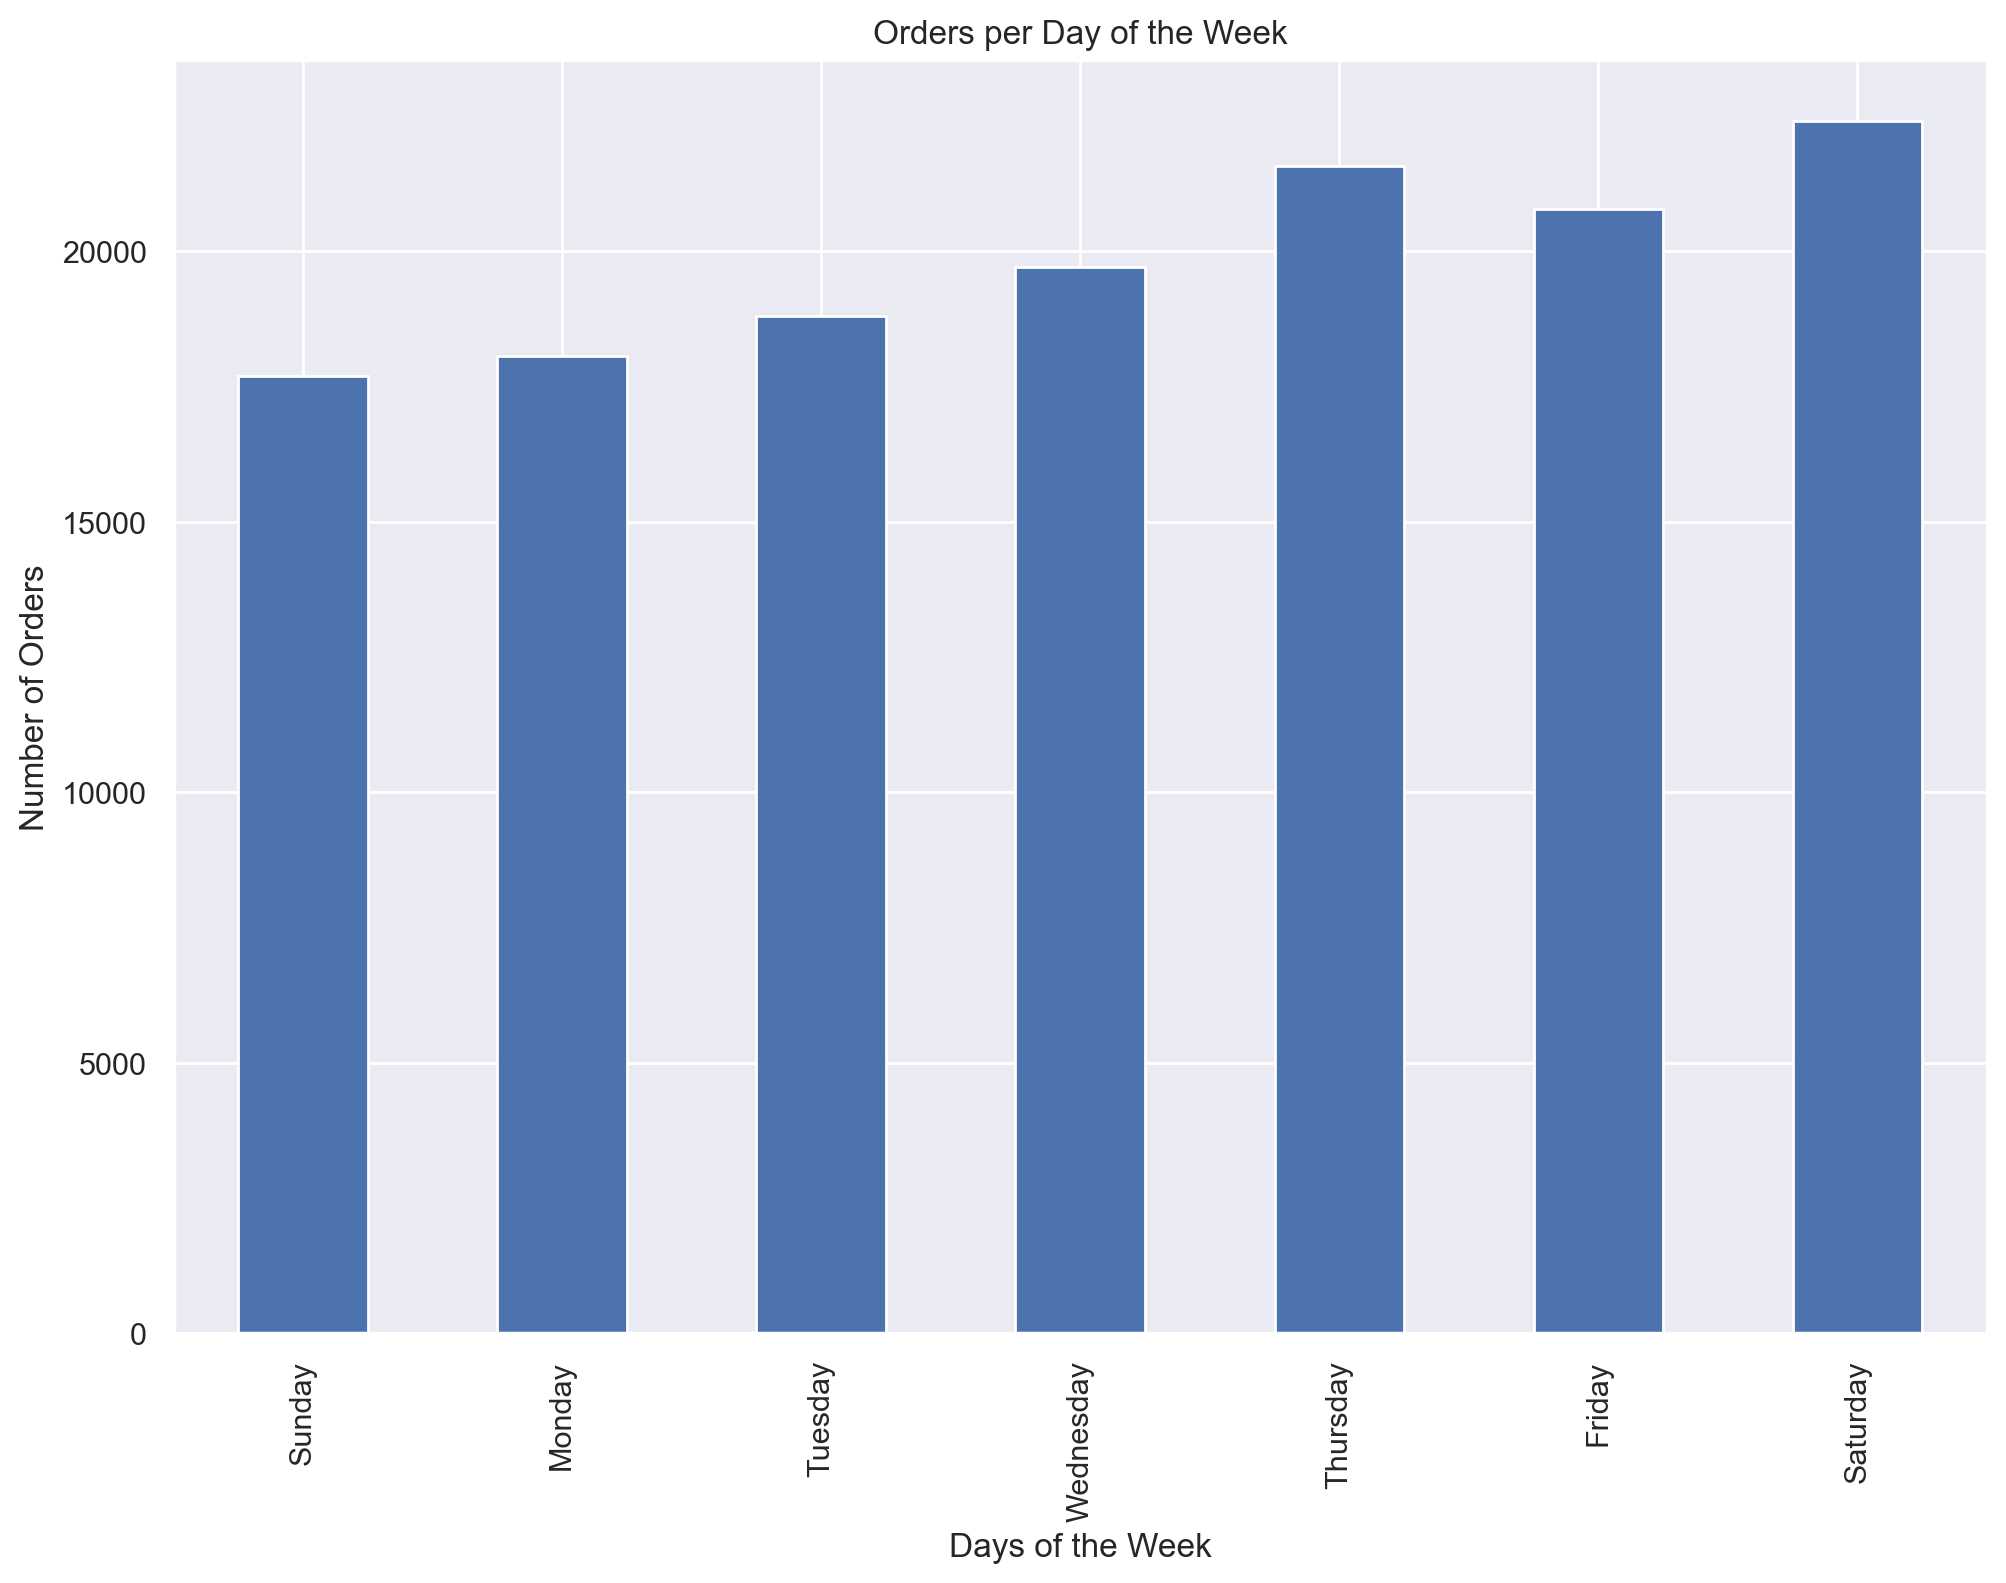

In [68]:
# Plotting the bar chart for the number of orders per day of the week
df[dow_columns].sum().plot(kind='bar', title='Orders per Day of the Week')

# Adding labels and title
plt.xlabel('Days of the Week')  
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.show()

* Hour of The Day Analysis:

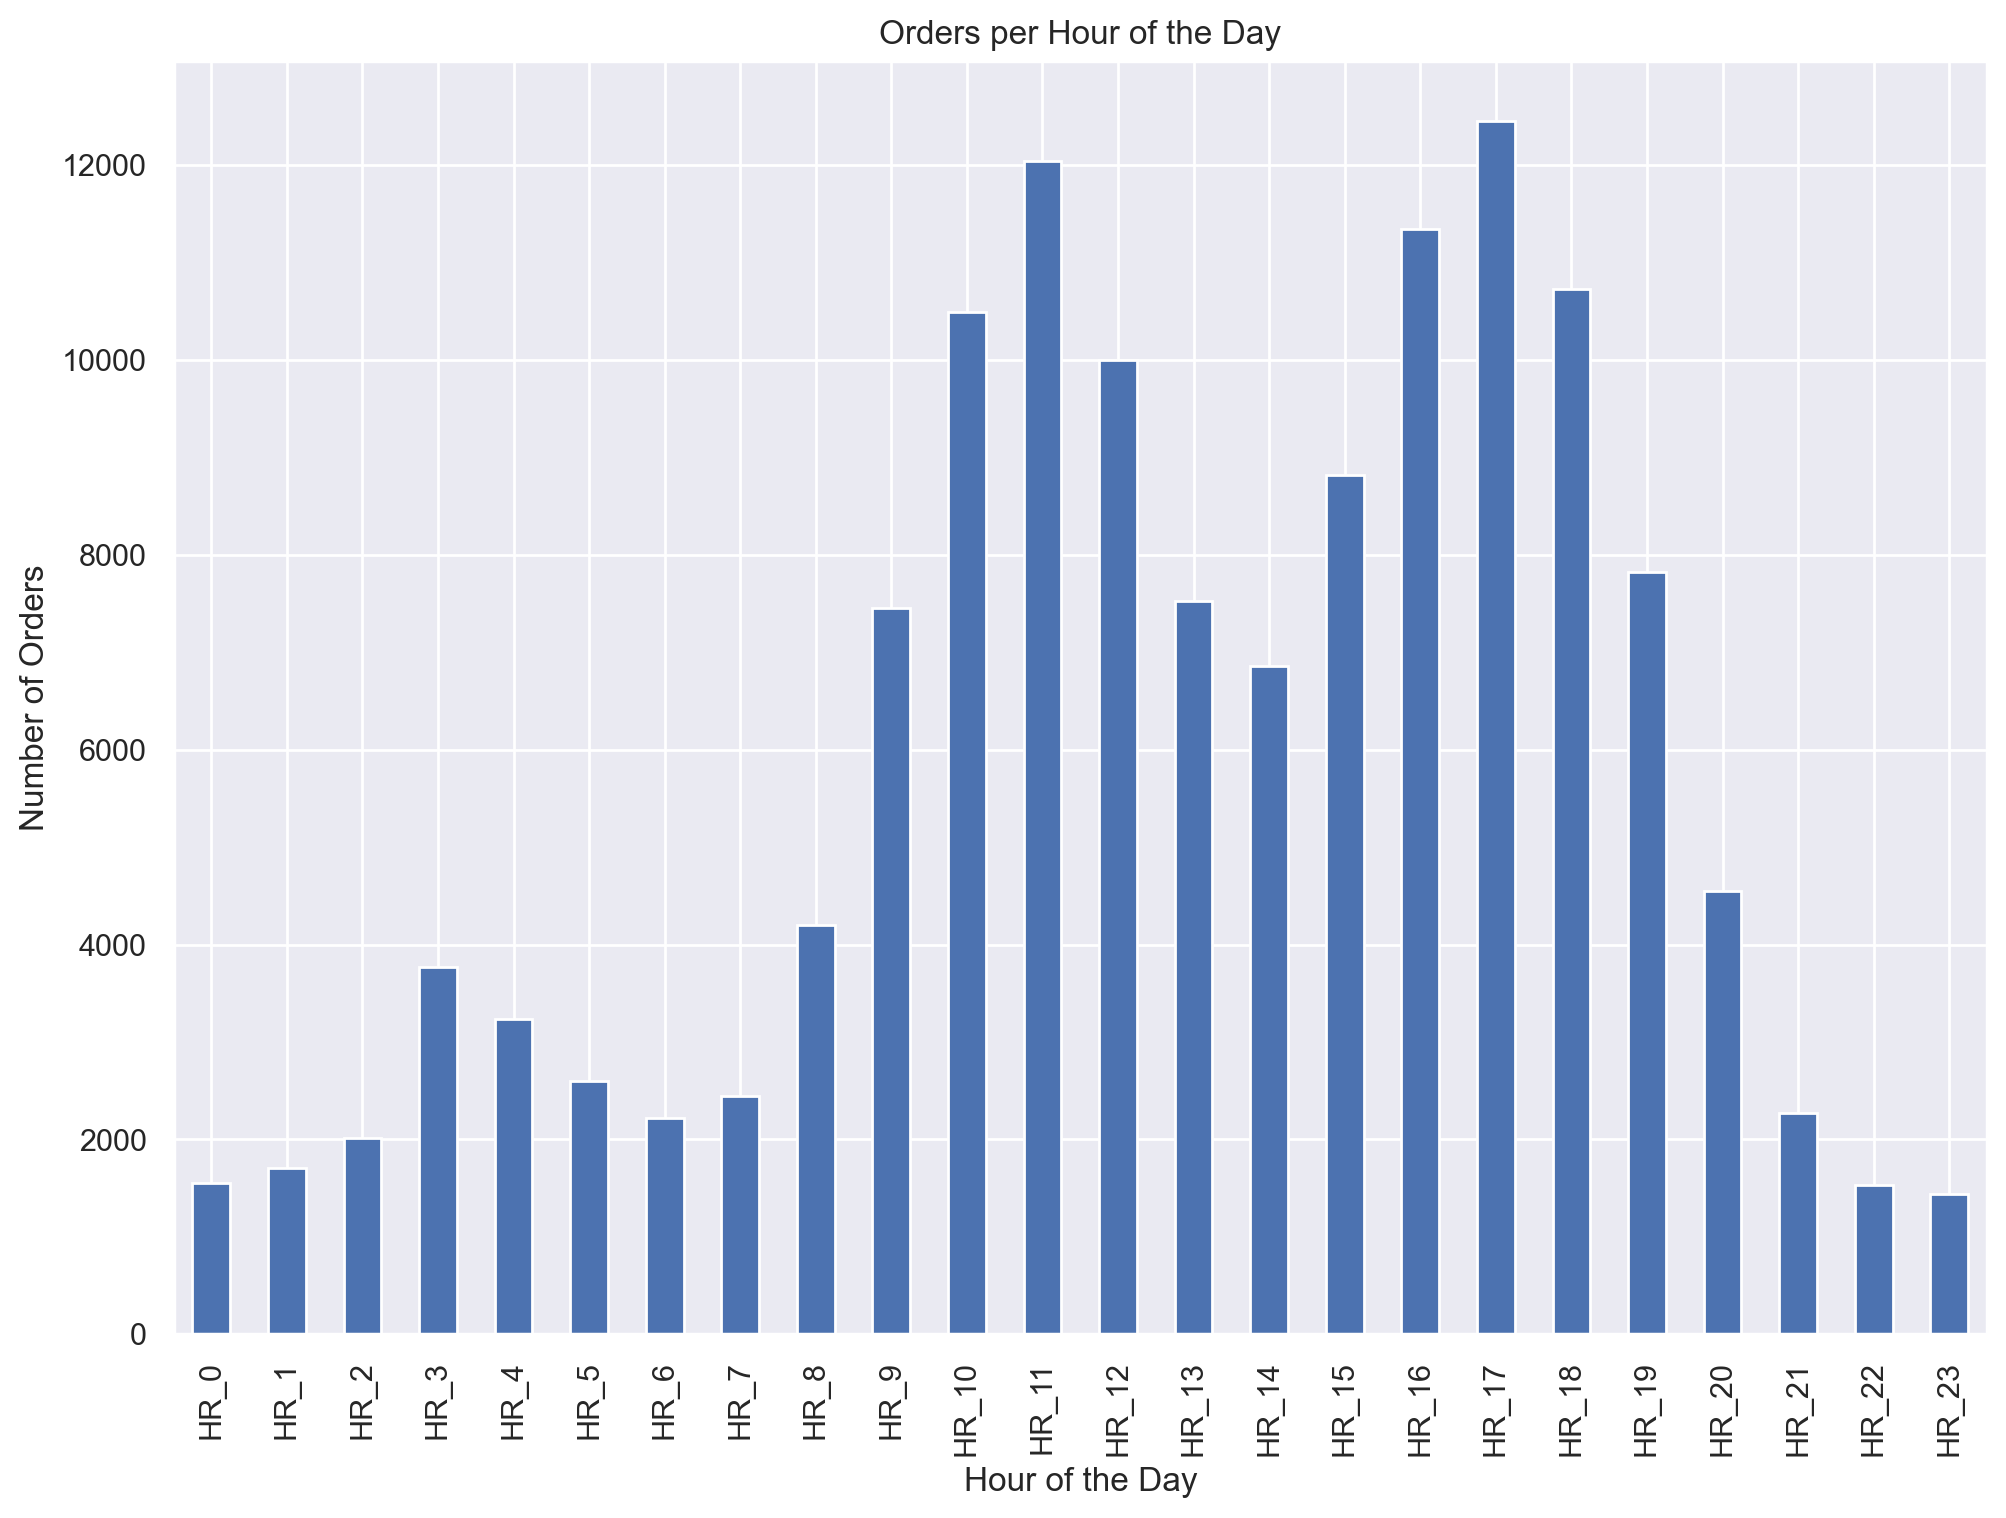

In [69]:
# Plotting the bar chart for the number of orders per hour of the day
df[hr_columns].sum().plot(kind='bar', title='Orders per Hour of the Day')

# Adding labels
plt.xlabel('Hour of the Day')  
plt.ylabel('Number of Orders')

plt.show()

* Cuisine-related columns, can be analyzed by calculating total spending per cuisine to determine preferences:

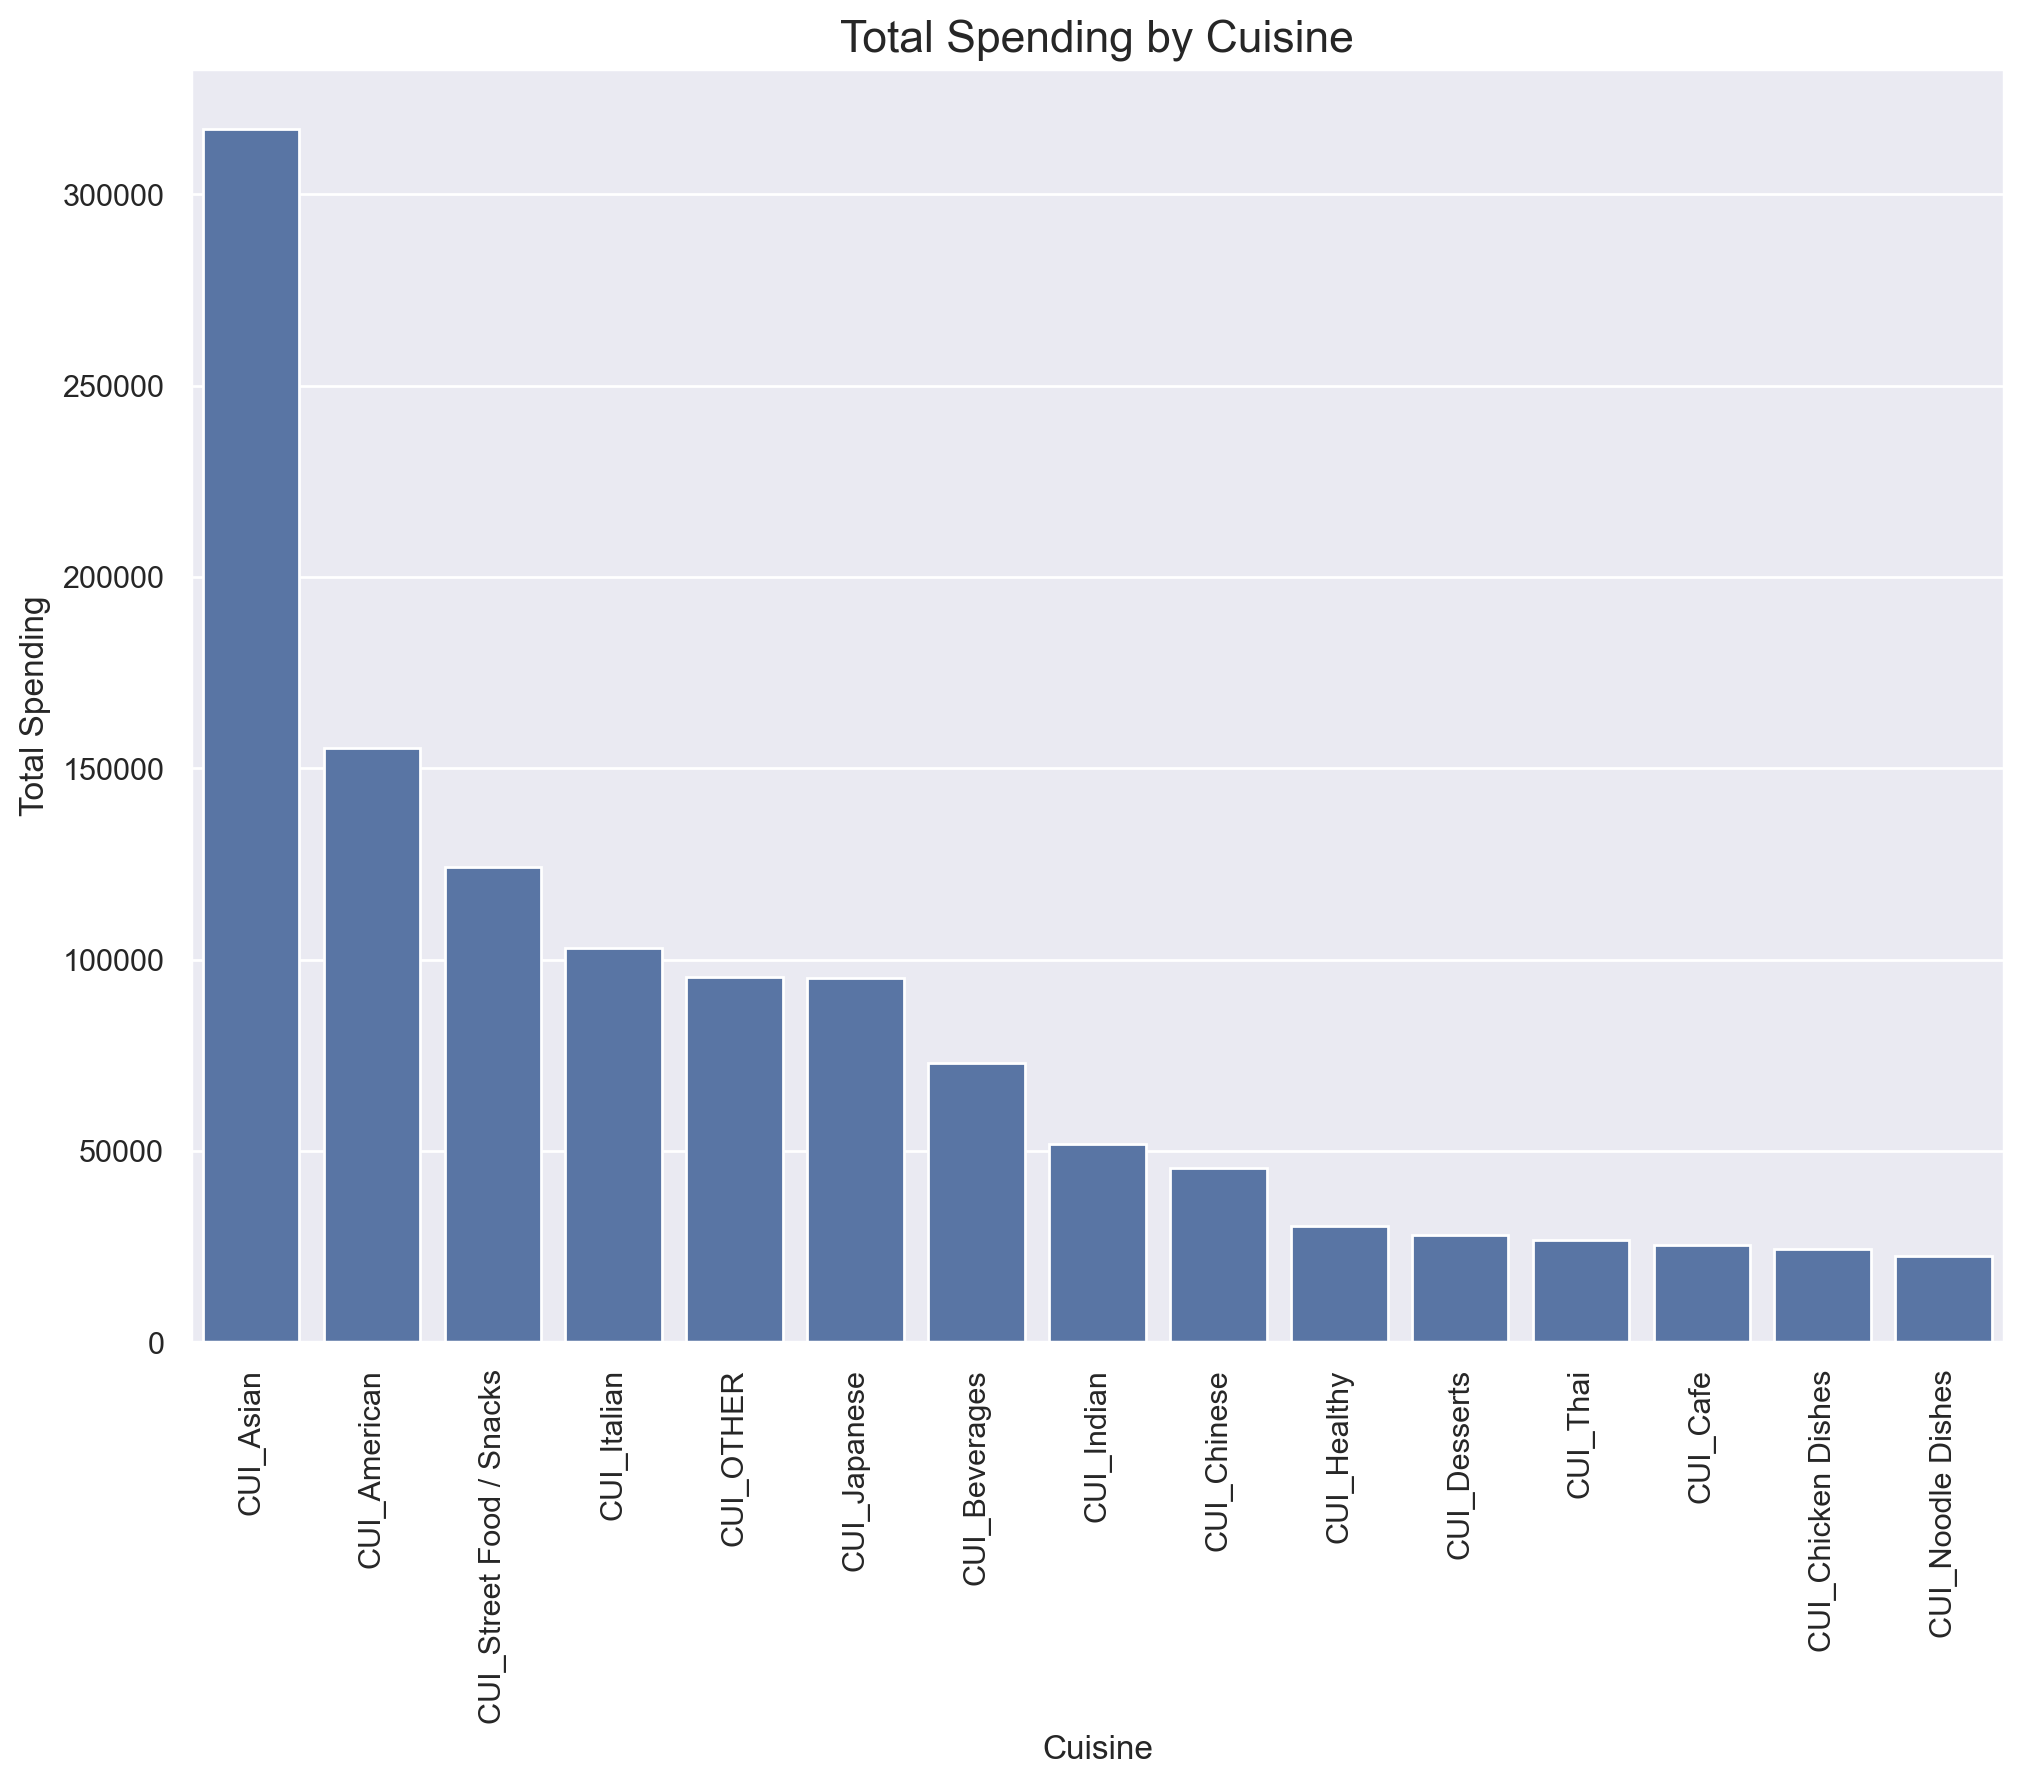

In [70]:
# Plotting the bar chart for the total spending by cuisine
sns.barplot(x=df[cuisine_columns].sum().sort_values(ascending=False).index, y=df[cuisine_columns].sum().sort_values(ascending=False).values)

# Adding labels and title
plt.xticks(rotation=90)
plt.title("Total Spending by Cuisine", size = 16)
plt.ylabel('Total Spending')
plt.xlabel('Cuisine')

plt.show()

<a class="anchor" id="bivariate">
    
### 2.3 Bivariate Analysis - Pairwise Relationship of Numerical Variables

</a>

#### Correlation Matrix
* Exploring relationship between numerical features:

In [71]:
# Relevant variables for the correlation matrix
variables = ['Week_days', 'Weekend_days', 'Morning_HR', 'Lunch_HR', 'Afternoon_HR', 'Dinner_HR', 'Night_HR', 'Avg_Spend_per_Vendor', 'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Fav_Cuisine_Concentration', 'Chain_Preference', 'Order_Frequency', 'Peak_Order_Day', 'Product_Intensity', 'Repeat_Customer', 'Churn_Risk']

cmatrix = df[variables].corr()
cmatrix

Week_days  Weekend_days  Morning_HR  Lunch_HR  \
Week_days                   1.000000      0.585930    0.540960  0.620434   
Weekend_days                0.585930      1.000000    0.441115  0.561615   
Morning_HR                  0.540960      0.441115    1.000000  0.174950   
Lunch_HR                    0.620434      0.561615    0.174950  1.000000   
Afternoon_HR                0.623031      0.633328    0.090999  0.401979   
Dinner_HR                   0.509811      0.529103   -0.009013  0.320605   
Night_HR                    0.282284      0.267741    0.085908  0.112323   
Avg_Spend_per_Vendor        0.105075      0.081273    0.193643  0.007329   
Spend_per_Product          -0.200647     -0.210484    0.100885 -0.217680   
Cuisine_Diversity           0.650635      0.633076    0.338508  0.507059   
Customer_Duration           0.535350      0.524209    0.349021  0.377363   
Fav_Cuisine_Concentration  -0.407838     -0.411895   -0.222991 -0.313335   
Chain_Preference            0.038060      0.031960   -0.058094  0.094773   
Order_Frequency             0.066667      0.046279    0.033368  0.048538   
Peak_Order_Day             -0.234939      0.288311   -0.050524 -0.008550   
Product_Intensity           0.076863      0.060142    0.044509  0.056933   
Repeat_Customer             0.323779      0.325769    0.226116  0.226113   
Churn_Risk                 -0.269304     -0.272071   -0.195066 -0.183855   

                           Afternoon_HR  Dinner_HR  Night_HR  \
Week_days                      0.623031   0.509811  0.282284   
Weekend_days                   0.633328   0.529103  0.267741   
Morning_HR                     0.090999  -0.009013  0.085908   
Lunch_HR                       0.401979   0.320605  0.112323   
Afternoon_HR                   1.000000   0.307220  0.064476   
Dinner_HR                      0.307220   1.000000  0.182354   
Night_HR                       0.064476   0.182354  1.000000   
Avg_Spend_per_Vendor           0.109564  -0.091515 -0.022940   
Spend_per_Product             -0.203120  -0.313167 -0.128857   
Cuisine_Diversity              0.500203   0.481963  0.245636   
Customer_Duration              0.433569   0.316983  0.184793   
Fav_Cuisine_Concentration     -0.327775  -0.296010 -0.149921   
Chain_Preference              -0.008974   0.120229  0.031903   
Order_Frequency                0.034993   0.042231  0.022996   
Peak_Order_Day                 0.024124   0.031158 -0.005052   
Product_Intensity              0.042613   0.045581  0.029630   
Repeat_Customer                0.260064   0.187734  0.118809   
Churn_Risk                    -0.225945  -0.140527 -0.088308   

                           Avg_Spend_per_Vendor  Spend_per_Product  \
Week_days                              0.105075          -0.200647   
Weekend_days                           0.081273          -0.210484   
Morning_HR                             0.193643           0.100885   
Lunch_HR                               0.007329          -0.217680   
Afternoon_HR                           0.109564          -0.203120   
Dinner_HR                             -0.091515          -0.313167   
Night_HR                              -0.022940          -0.128857   
Avg_Spend_per_Vendor                   1.000000           0.547045   
Spend_per_Product                      0.547045           1.000000   
Cuisine_Diversity                     -0.168399          -0.307984   
Customer_Duration                      0.031010          -0.271659   
Fav_Cuisine_Concentration              0.234827           0.303903   
Chain_Preference                      -0.255537          -0.329138   
Order_Frequency                        0.007335           0.016720   
Peak_Order_Day                         0.013457           0.032298   
Product_Intensity                      0.087078           0.062341   
Repeat_Customer                       -0.027391          -0.295719   
Churn_Risk                            -0.038001           0.107405   

                           Cuisine

In [72]:
# Maximum correlation value for each feature
cmatrix.apply(lambda x: x.abs().sort_values(ascending=False)[1]).sort_values(ascending=False)

Product_Intensity            0.948647
Order_Frequency              0.948647
Cuisine_Diversity            0.809761
Fav_Cuisine_Concentration    0.809761
Repeat_Customer              0.801321
Customer_Duration            0.670513
Week_days                    0.650635
Weekend_days                 0.633328
Afternoon_HR                 0.633328
Lunch_HR                     0.620434
Avg_Spend_per_Vendor         0.547045
Spend_per_Product            0.547045
Morning_HR                   0.540960
Dinner_HR                    0.529103
Churn_Risk                   0.523143
Chain_Preference             0.329138
Peak_Order_Day               0.288311
Night_HR                     0.282284
dtype: float64

<a class="anchor" id="scatterplots">
    
### 2.3.1 Scatterplots

</a>

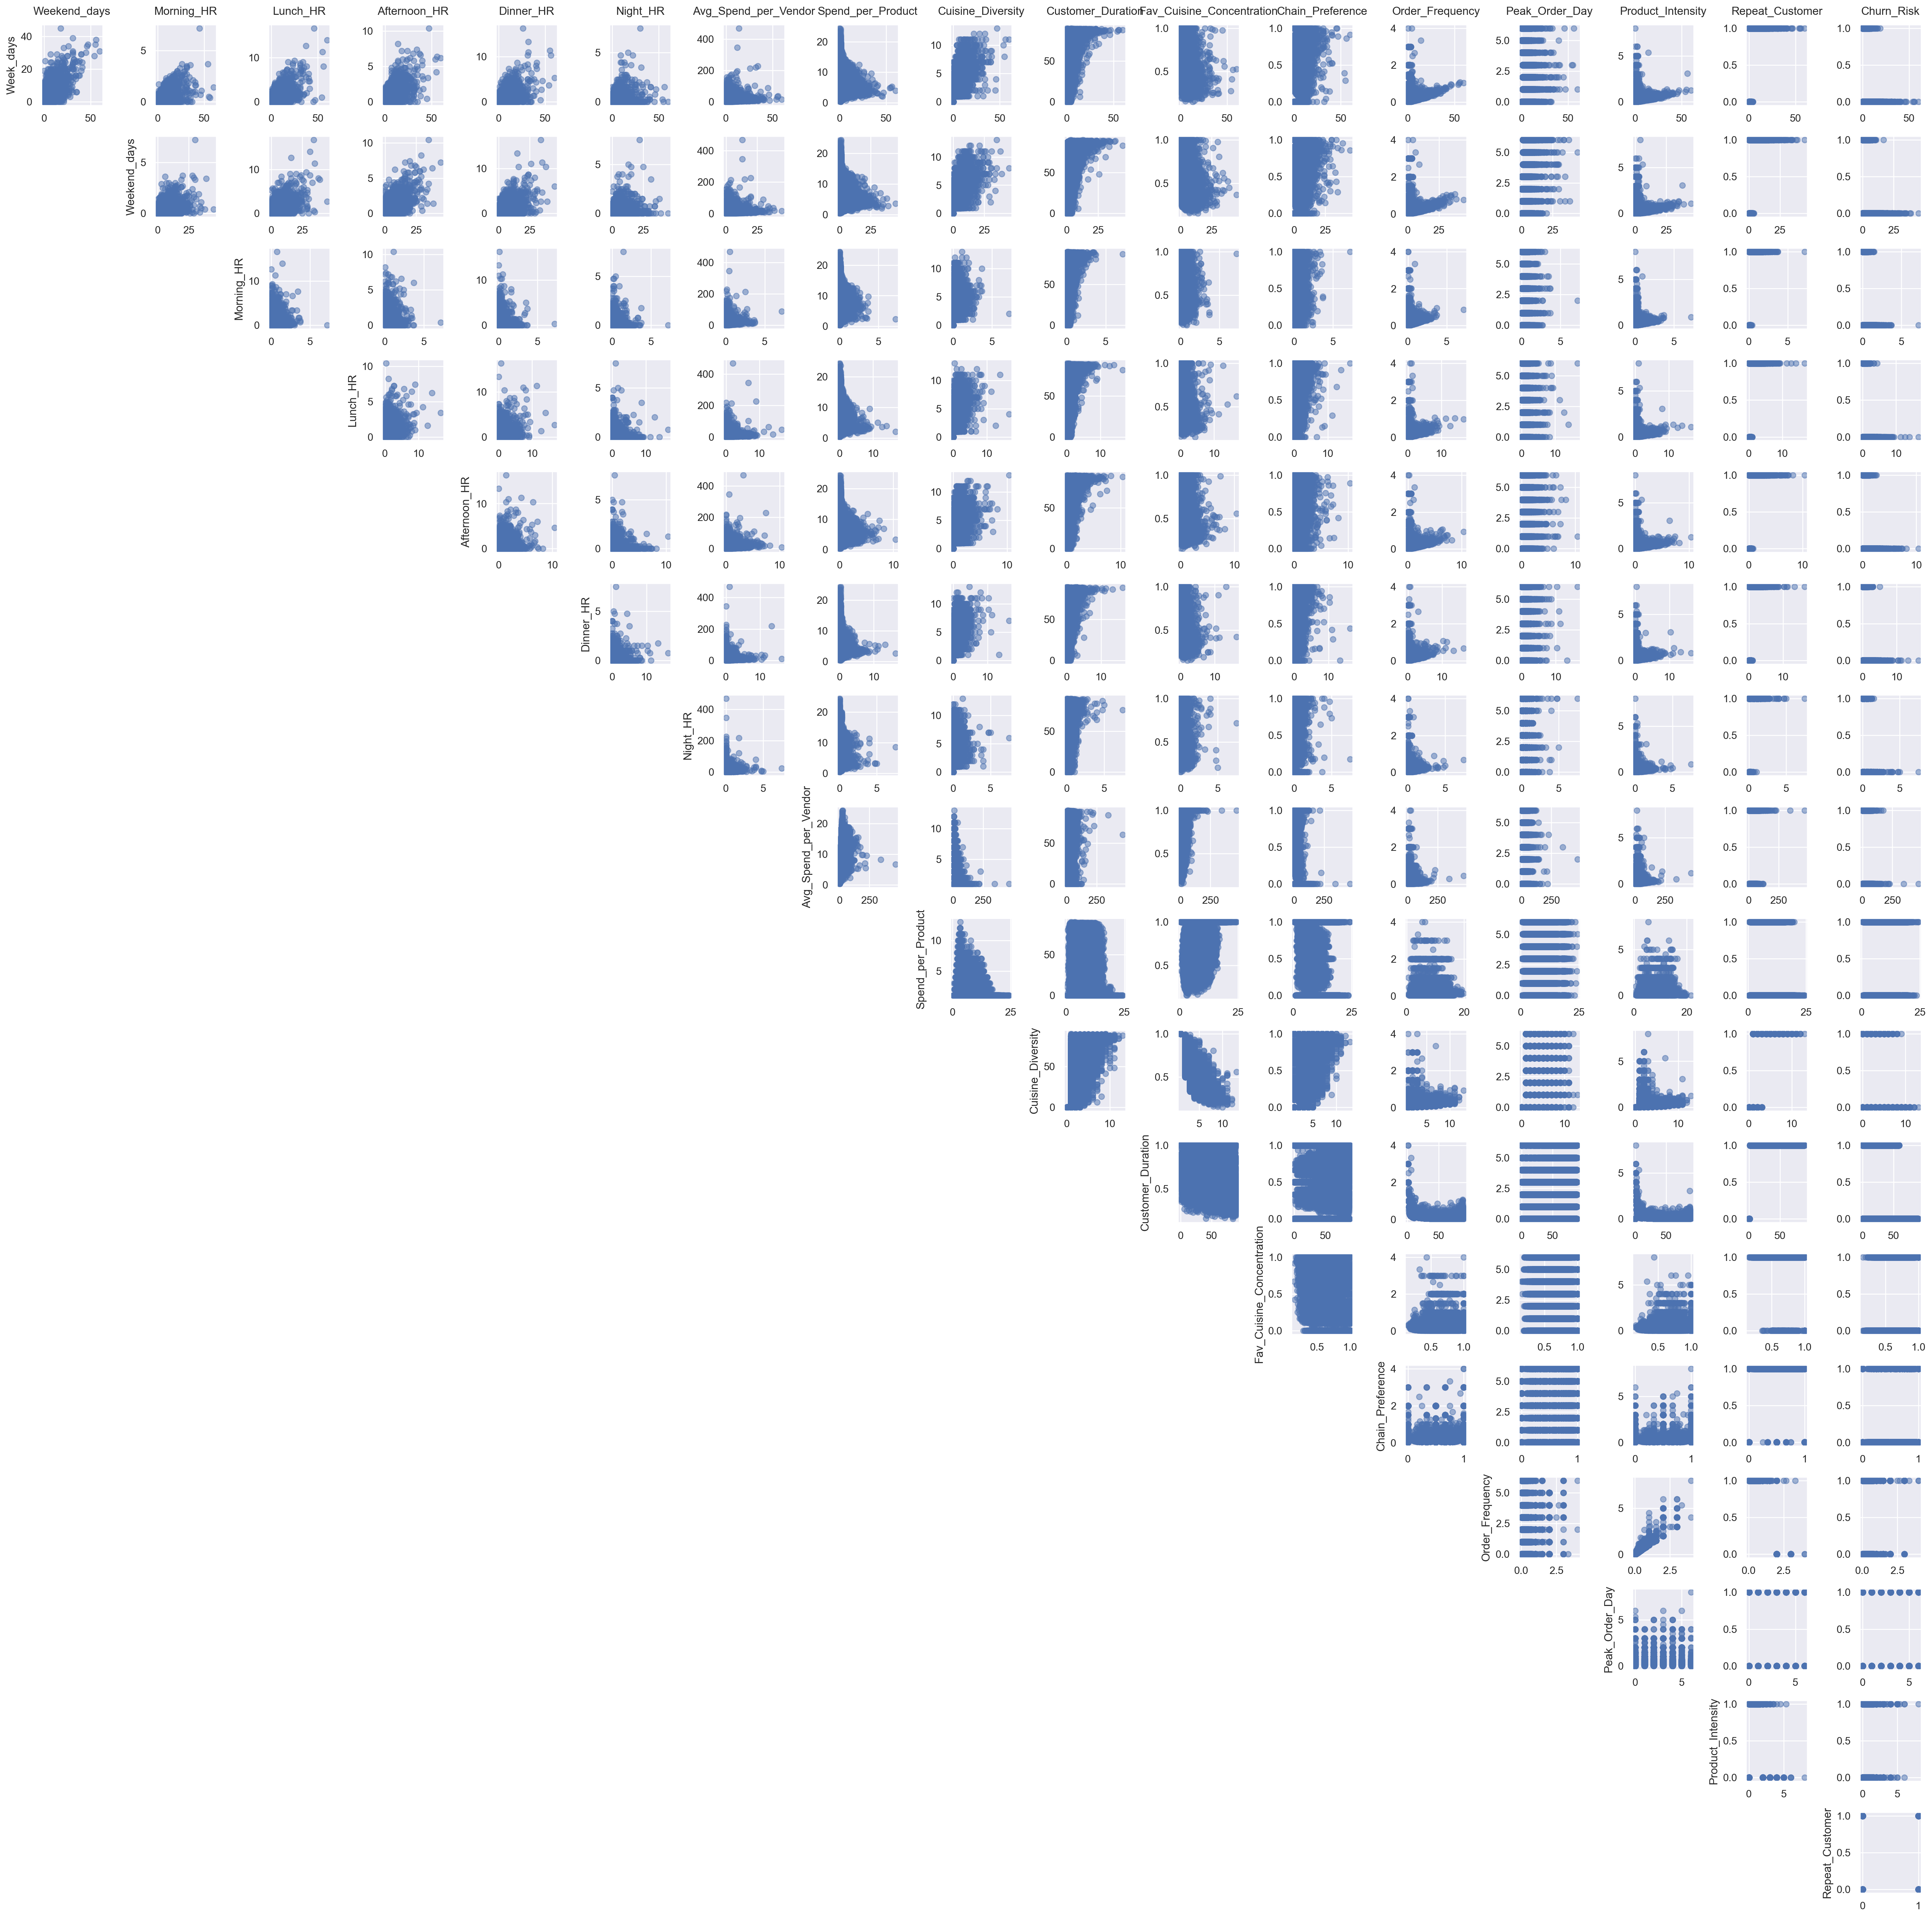

In [73]:
# Adjusting the figure size
plt.figure(figsize=(30, 30)) 

# Number of variables
n = len(variables)

# Creating the scatter plots for each pair of variables
for i in range(n):
    for j in range(i + 1, n):
        # Creating the subplot
        plt.subplot(n, n, i * n + j + 1)
        plt.scatter(df[variables[i]], df[variables[j]], alpha=0.5)
        
        # Labelling the margins
        if j == i + 1:  # Only the first graph in each line will have the title
            plt.ylabel(variables[i])
            
        if i == n - 1:  # Only the last graph in each line will have the title
            plt.xlabel(variables[j])
        
        # Title for each graph
        if i == 0:  # Only the first graph in each column
            plt.title(variables[j], y=1.05)  

plt.tight_layout()
plt.show() 

After a closer look at each graph, it is possible to distinguish:
 - A *positive* correlation between **Total Spend** and **Average Spend per Vendor**, which portraits a tendency for customers with higher expenditures buying from more vendors. 
- **Product Frequency** and **Customer Duration** also correlate positively, indicating that long-term customers consume products frequently. 
- There seems to be a high relation between **Is Chain** and **Weekdays**, suggesting there is a higher demand for chain restaurants orders during business days. 
- A similar conclusion is reached by analyzing the scatter plot between **Lunch Hour** and **Is Chain**, and **Lunch Hour** and **Weekdays**. 
- There also seems to be a relation between **Average Spend per Order** and **Spend Per Product**, and also **Average Spend Per Vendor**, meaning the more a customer spends in one order, the more they spend per product bought and, consequently, the more they spend on the vendor. 

In terms of *negative* correlations: 
- A relation between **Customer Duration** and **Weekdays**, which suggests that the longer someone has been a customer, the lower the number of orders they place during business days.

<a class="anchor" id="heatmap">
    
### 2.3.2 Heatmap

</a>

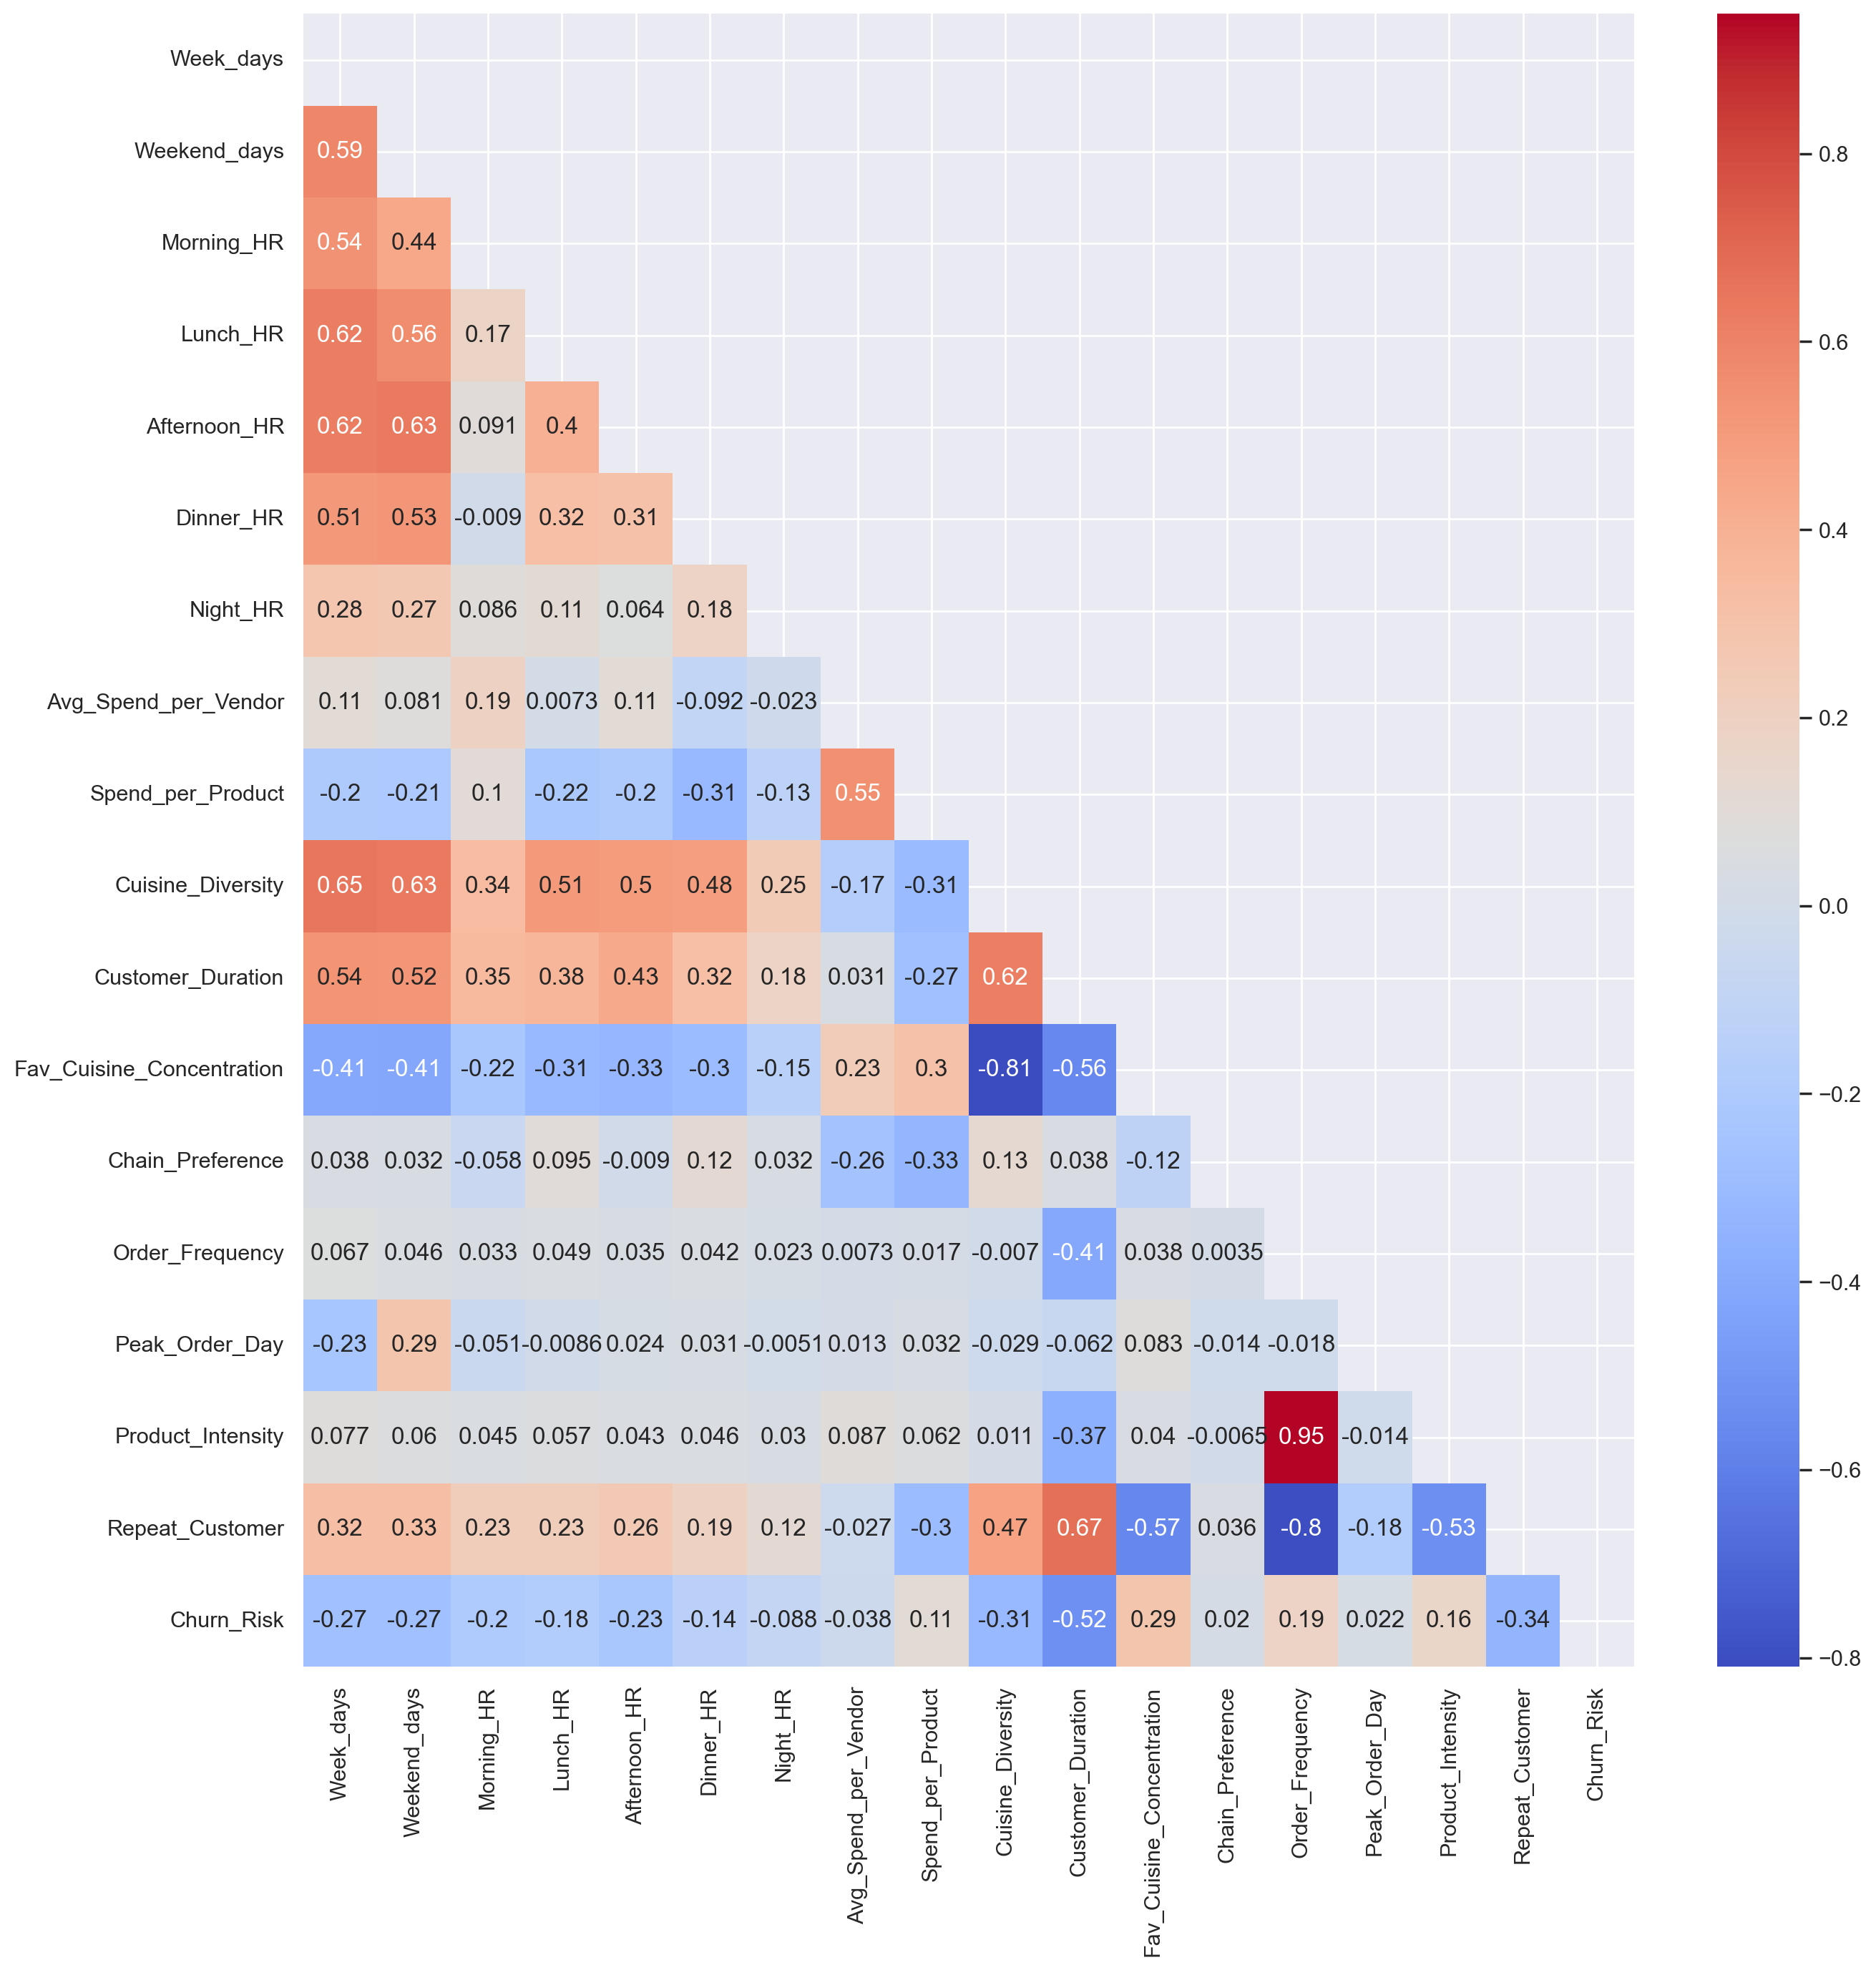

In [74]:
# Adjusting the figure size
plt.figure(figsize=(15, 15))

# Creating the heatmap
sns.heatmap(cmatrix, annot=True, cmap='coolwarm', mask=np.triu(cmatrix))
plt.show()

High positive correlations, such as:
 - Weekdays and Weekend days (0.59), which shows that customers who are active on weekdays also tend to be active on weekends. 
- Order Frequency and Product Intensity (0.95) are very strongly correlated, indicating that frequent orders are associated with higher product intensity.
 - Favorite Cuisine Concentration and Spend Per Product (0.81) also show a strong positive correlation, suggesting that higher concentration on a favorite cuisine aligns with higher spending per product. 
   
  On strong negative correlations: 
  - Favorite Cuisine Concentration and Cuisine Diversity (-0.81) indicate that as the concentration on the favorite cuisine increases, the diversity in cuisines decreases significantly. 
  - Churn Risk and Favorite Cuisine Concentration (-0.52), a higher focus on a particular cuisine (lower diversity) is associated with lower churn risk, possibly indicating loyalty. 
  - Favorite Cuisine Concentration and Chain Preference (-0.57), those with a strong preference for certain cuisines may not be as inclined toward chain restaurant orders, showing that cuisine preference diverges from chain loyalty. 
  
  Furthermore, we can find some interesting feature interactions: 
  - Churn Risk shows some notable correlations, such as Favorite Cuisine Concentration (-0.52), indicating a lower churn risk is associated with high concentration on a favorite cuisine. 
  - Order Frequency (-0.34), indicating that customers who order frequently are less likely to churn. 
  - Customer Duration has moderate to strong positive correlations with multiple variables, for instance Cuisine Diversity (0.62) and Weekdays (0.54), implying that longer-term customers may engage more in diverse cuisines and order on weekdays.

Some features have relatively weak or minimal correlations: 
- Chain Preference with most other features, suggesting that chain preference does not strongly impact other variables in this dataset. 
- Peak Order Day has low correlations with most features, indicating that the specific day with the highest orders does not significantly align with other behavioral or demographic characteristics. 
- The negative correlation of Churn Risk with Favorite Cuisine Concentration and Order Frequency suggests that customer loyalty might be tied to frequent orders and a preference for a particular cuisine type. 
- High correlations between Spend Per Product and Favorite Cuisine Concentration may indicate that customers with strong cuisine preferences tend to spend more per product, which could be used to tailor marketing strategies. 
- Strong correlations within time-based features (e.g., between Morning_HR, Lunch_HR, Afternoon_HR) show that customers have consistent order patterns across time, which can help optimize promotion timing.
